## Data Visualization

In [1]:
# Importing first set of python ML libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import time

In [3]:
# Load CICIDS2017 Choice Dataset
dataset_path = "Wednesday-workingHours.pcap_ISCX.csv"
df = pd.read_csv(dataset_path)
print(df.shape)
df.describe() 

(692703, 85)


Source Port   Destination Port       Protocol   Flow Duration  \
count  692703.000000      692703.000000  692703.000000    6.927030e+05   
mean    42583.995907        5686.869462       9.219523    2.800168e+07   
std     19535.697710       15727.423560       5.009796    4.276680e+07   
min         0.000000           0.000000       0.000000   -1.000000e+00   
25%     36235.000000          53.000000       6.000000    2.010000e+02   
50%     49822.000000          80.000000       6.000000    6.143700e+04   
75%     56892.000000         443.000000      17.000000    8.302437e+07   
max     65535.000000       65487.000000      17.000000    1.200000e+08   

        Total Fwd Packets   Total Backward Packets  \
count       692703.000000            692703.000000   
mean             9.556261                10.214079   
std            747.197814               984.204633   
min              1.000000                 0.000000   
25%              2.000000                 1.000000   
50%              2.000000                 2.000000   
75%              7.000000                 6.000000   
max         203943.000000            272353.000000   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
count                 6.927030e+05                  6.927030e+05   
mean                  5.550930e+02                  1.699644e+04   
std                   6.163663e+03                  2.241175e+06   
min                   0.000000e+00                  0.000000e+00   
25%                   1.200000e+01                  0.000000e+00   
50%                   8.200000e+01                  1.880000e+02   
75%                   3.650000e+02                  1.159500e+04   
max                   1.224076e+06                  6.270000e+08   

        Fwd Packet Length Max   Fwd Packet Length Min  ...   act_data_pkt_fwd  \
count           692703.000000           692703.000000  ...      692703.000000   
mean               233.593936               15.022183  ...           6.121279   
std                603.751856               51.068835  ...         715.155068   
min                  0.000000                0.000000  ...           0.000000   
25%                  6.000000                0.000000  ...           0.000000   
50%                 46.000000                0.000000  ...           1.000000   
75%                341.000000               32.000000  ...           2.000000   
max              24820.000000             2065.000000  ...      197124.000000   

        min_seg_size_forward   Active Mean    Active Std    Active Max  \
count          692703.000000  6.927030e+05  6.927030e+05  6.927030e+05   
mean               26.761141  9.224478e+04  4.760852e+04  1.627363e+05   
std                 6.322368  7.007049e+05  4.742081e+05  1.094616e+06   
min                -1.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%                20.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%                32.000000  0.000000e+00  0.000000e+00  0.000000e+00   
75%                32.000000  9.910000e+02  0.000000e+00  9.910000e+02   
max                60.000000  1.000000e+08  7.420000e+07  1.050000e+08   

         Active Min     Idle Mean      Idle Std      Idle Max      Idle Min  
count  6.927030e+05  6.927030e+05  6.927030e+05  6.927030e+05  6.927030e+05  
mean   6.315186e+04  2.211122e+07  4.743744e+05  2.252174e+07  2.173373e+07  
std    6.051023e+05  3.812415e+07  4.488512e+06  3.848292e+07  3.807725e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    9.880000e+02  1.590000e+07  0.000000e+00  1.650000e+07  1.000000e+07  
max    1.000000e+08  1.200000e+08  7.690000e+07  1.200000e+08  1.200000e+08  

[8 rows x 80 columns]

In [4]:
# More info about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       692703 non-null  object 
 1    Source IP                    692703 non-null  object 
 2    Source Port                  692703 non-null  int64  
 3    Destination IP               692703 non-null  object 
 4    Destination Port             692703 non-null  int64  
 5    Protocol                     692703 non-null  int64  
 6    Timestamp                    692703 non-null  object 
 7    Flow Duration                692703 non-null  int64  
 8    Total Fwd Packets            692703 non-null  int64  
 9    Total Backward Packets       692703 non-null  int64  
 10  Total Length of Fwd Packets   692703 non-null  int64  
 11   Total Length of Bwd Packets  692703 non-null  float64
 12   Fwd Packet Length Max        692703 non-nul

In [5]:
# Clean column names with custom names(replace spaces and brackets with underscore; remove leading and trailing whitespaces; convert all to lowercase)
colnames = ["flow_id","source_ip","source_port","destination_ip","destination_port","protocol","timestamp","flow_duration","total_fwd_packets","total_backward_packets",
"total_length_of_fwd_packets","total_length_of_bwd_packets","fwd_packet_length_max","fwd_packet_length_min","fwd_packet_length_mean","fwd_packet_length_std",
"bwd_packet_length_max","bwd_packet_length_min","bwd_packet_length_mean","bwd_packet_length_std","flow_bytes/s","flow_packets/s","flow_iat_mean","flow_iat_std",
"flow_iat_max","flow _iat_min","fwd_iat_total","fwd_iat_mean","fwd_iat_std","fwd_iat_max","fwd_iat_min","bwd_iat_total","bwd_iat_mean","bwd_iat_std","bwd_iat_max",
"bwd_iat_min","fwd_psh_flags","bwd_psh_flags","fwd_urg_flags","bwd_urg_flags","fwd_header_length","bwd_header_length","fwd_packets/s","bwd_packets/s","min_packet_length",
"max_packet_length","packet_length_mean","packet_length_std","packet_length_variance","fin_flag_count","syn_flag_count","rst_flag_count","psh_flag_count","ack_flag_count",
"urg_flag_count","cwe_flag_count","ece_flag_count","down/up_ratio","average_packet_size","avg_fwd_segment_size","avg_bwd_segment_size","fwd_header_length.1","fwd_avg_bytes/bulk",
"fwd_avg_packets/bulk","fwd_avg_bulk_rate","bwd_avg_bytes/bulk","bwd_avg_packets/bulk","bwd_avg_bulk_rate","subflow_fwd_packets","subflow_fwd_bytes","subflow_bwd_packets",
"subflow_bwd_bytes","init_win_bytes_forward","init_win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","active_mean","active_std","active_max","active_min",
"idle_mean","idle_std","idle_max","idle_min","label"]
dataset_path = "Wednesday-workingHours.pcap_ISCX.csv"
df = pd.read_csv(dataset_path, names=colnames, low_memory=False)
print(df.shape)
df.describe() 

(692704, 85)


flow_id   source_ip source_port destination_ip  \
count                  692704      692704      692704         692704   
unique                 226769        7690       54557           9013   
top     8.0.6.4-8.6.0.1-0-0-0  172.16.0.1         443  192.168.10.50   
freq                      246      254823       52110         257869   

       destination_port protocol       timestamp flow_duration  \
count            692704   692704          692704        692704   
unique            30095        4             510        363186   
top                  80        6  5/7/2017 10:43             3   
freq             301422   489450           18353         28970   

       total_fwd_packets total_backward_packets  ... min_seg_size_forward  \
count             692704                 692704  ...               692704   
unique               686                    860  ...                   14   
top                    2                      2  ...                   32   
freq              260416                 156304  ...               361276   

       active_mean active_std active_max active_min idle_mean idle_std  \
count       692704     692704     692704     692704    692704   692704   
unique       78865      44221      76778      53326     37602    41529   
top              0          0          0          0         0        0   
freq        470565     648164     470565     470565    463109   641870   

       idle_max idle_min   label  
count    692704   692704  692704  
unique    21987    43870       7  
top           0        0  BENIGN  
freq     463109   463109  440031  

[4 rows x 85 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692704 entries, 0 to 692703
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   flow_id                      692704 non-null  object
 1   source_ip                    692704 non-null  object
 2   source_port                  692704 non-null  object
 3   destination_ip               692704 non-null  object
 4   destination_port             692704 non-null  object
 5   protocol                     692704 non-null  object
 6   timestamp                    692704 non-null  object
 7   flow_duration                692704 non-null  object
 8   total_fwd_packets            692704 non-null  object
 9   total_backward_packets       692704 non-null  object
 10  total_length_of_fwd_packets  692704 non-null  object
 11  total_length_of_bwd_packets  692704 non-null  object
 12  fwd_packet_length_max        692704 non-null  object
 13  fwd_packet_len

In [8]:
df2 = pd.read_csv("Wednesday-workingHours.pcap_ISCX2.csv")
print(df2.shape)
df2.describe()

(692703, 85)


source_port  destination_port       protocol  flow_duration  \
count  692703.000000     692703.000000  692703.000000   6.927030e+05   
mean    42583.995907       5686.869462       9.219523   2.800168e+07   
std     19535.697710      15727.423560       5.009796   4.276680e+07   
min         0.000000          0.000000       0.000000  -1.000000e+00   
25%     36235.000000         53.000000       6.000000   2.010000e+02   
50%     49822.000000         80.000000       6.000000   6.143700e+04   
75%     56892.000000        443.000000      17.000000   8.302437e+07   
max     65535.000000      65487.000000      17.000000   1.200000e+08   

       total_fwd_packets  total_backward_packets  total_length_of_fwd_packets  \
count      692703.000000           692703.000000                 6.927030e+05   
mean            9.556261               10.214079                 5.550930e+02   
std           747.197814              984.204633                 6.163663e+03   
min             1.000000                0.000000                 0.000000e+00   
25%             2.000000                1.000000                 1.200000e+01   
50%             2.000000                2.000000                 8.200000e+01   
75%             7.000000                6.000000                 3.650000e+02   
max        203943.000000           272353.000000                 1.224076e+06   

       total_length_of_bwd_packets  fwd_packet_length_max  \
count                 6.927030e+05          692703.000000   
mean                  1.699644e+04             233.593936   
std                   2.241175e+06             603.751856   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00               6.000000   
50%                   1.880000e+02              46.000000   
75%                   1.159500e+04             341.000000   
max                   6.270000e+08           24820.000000   

       fwd_packet_length_min  ...  act_data_pkt_fwd  min_seg_size_forward  \
count          692703.000000  ...     692703.000000         692703.000000   
mean               15.022183  ...          6.121279             26.761141   
std                51.068835  ...        715.155068              6.322368   
min                 0.000000  ...          0.000000             -1.000000   
25%                 0.000000  ...          0.000000             20.000000   
50%                 0.000000  ...          1.000000             32.000000   
75%                32.000000  ...          2.000000             32.000000   
max              2065.000000  ...     197124.000000             60.000000   

        active_mean    active_std    active_max    active_min     idle_mean  \
count  6.927030e+05  6.927030e+05  6.927030e+05  6.927030e+05  6.927030e+05   
mean   9.224478e+04  4.760852e+04  1.627363e+05  6.315186e+04  2.211122e+07   
std    7.007049e+05  4.742081e+05  1.094616e+06  6.051023e+05  3.812415e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    9.910000e+02  0.000000e+00  9.910000e+02  9.880000e+02  1.590000e+07   
max    1.000000e+08  7.420000e+07  1.050000e+08  1.000000e+08  1.200000e+08   

           idle_std      idle_max      idle_min  
count  6.927030e+05  6.927030e+05  6.927030e+05  
mean   4.743744e+05  2.252174e+07  2.173373e+07  
std    4.488512e+06  3.848292e+07  3.807725e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  1.650000e+07  1.000000e+07  
max    7.690000e+07  1.200000e+08  1.200000e+08  

[8 rows x 80 columns]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   flow_id                         692703 non-null  object 
 1   source_ip                       692703 non-null  object 
 2   source_port                     692703 non-null  int64  
 3   destination_ip                  692703 non-null  object 
 4   destination_port                692703 non-null  int64  
 5   protocol                        692703 non-null  int64  
 6   timestamp                       692703 non-null  object 
 7   flow_duration                   692703 non-null  int64  
 8   total_fwd_packets               692703 non-null  int64  
 9   total_backward_packets          692703 non-null  int64  
 10  total_length_of_fwd_packets     692703 non-null  int64  
 11  total_length_of_bwd_packets     692703 non-null  float64
 12  fwd_packet_lengt

In [10]:
# Drop duplicate columns, retaining the first occurrence of each duplicate column (colums 40 & 61)
df3 = df2.loc[:, ~df2.columns.duplicated(keep='first')]
df3.info()

# Drop a single column by name, fwd_header_length.1 (colum 61)
df4 = df3.drop("fwd_header_length.1", axis=1)
df4.info()

print(df4.shape)
df4.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   flow_id                         692703 non-null  object 
 1   source_ip                       692703 non-null  object 
 2   source_port                     692703 non-null  int64  
 3   destination_ip                  692703 non-null  object 
 4   destination_port                692703 non-null  int64  
 5   protocol                        692703 non-null  int64  
 6   timestamp                       692703 non-null  object 
 7   flow_duration                   692703 non-null  int64  
 8   total_fwd_packets               692703 non-null  int64  
 9   total_backward_packets          692703 non-null  int64  
 10  total_length_of_fwd_packets     692703 non-null  int64  
 11  total_length_of_bwd_packets     692703 non-null  float64
 12  fwd_packet_lengt

source_port  destination_port       protocol  flow_duration  \
count  692703.000000     692703.000000  692703.000000   6.927030e+05   
mean    42583.995907       5686.869462       9.219523   2.800168e+07   
std     19535.697710      15727.423560       5.009796   4.276680e+07   
min         0.000000          0.000000       0.000000  -1.000000e+00   
25%     36235.000000         53.000000       6.000000   2.010000e+02   
50%     49822.000000         80.000000       6.000000   6.143700e+04   
75%     56892.000000        443.000000      17.000000   8.302437e+07   
max     65535.000000      65487.000000      17.000000   1.200000e+08   

       total_fwd_packets  total_backward_packets  total_length_of_fwd_packets  \
count      692703.000000           692703.000000                 6.927030e+05   
mean            9.556261               10.214079                 5.550930e+02   
std           747.197814              984.204633                 6.163663e+03   
min             1.000000                0.000000                 0.000000e+00   
25%             2.000000                1.000000                 1.200000e+01   
50%             2.000000                2.000000                 8.200000e+01   
75%             7.000000                6.000000                 3.650000e+02   
max        203943.000000           272353.000000                 1.224076e+06   

       total_length_of_bwd_packets  fwd_packet_length_max  \
count                 6.927030e+05          692703.000000   
mean                  1.699644e+04             233.593936   
std                   2.241175e+06             603.751856   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00               6.000000   
50%                   1.880000e+02              46.000000   
75%                   1.159500e+04             341.000000   
max                   6.270000e+08           24820.000000   

       fwd_packet_length_min  ...  act_data_pkt_fwd  min_seg_size_forward  \
count          692703.000000  ...     692703.000000         692703.000000   
mean               15.022183  ...          6.121279             26.761141   
std                51.068835  ...        715.155068              6.322368   
min                 0.000000  ...          0.000000             -1.000000   
25%                 0.000000  ...          0.000000             20.000000   
50%                 0.000000  ...          1.000000             32.000000   
75%                32.000000  ...          2.000000             32.000000   
max              2065.000000  ...     197124.000000             60.000000   

        active_mean    active_std    active_max    active_min     idle_mean  \
count  6.927030e+05  6.927030e+05  6.927030e+05  6.927030e+05  6.927030e+05   
mean   9.224478e+04  4.760852e+04  1.627363e+05  6.315186e+04  2.211122e+07   
std    7.007049e+05  4.742081e+05  1.094616e+06  6.051023e+05  3.812415e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    9.910000e+02  0.000000e+00  9.910000e+02  9.880000e+02  1.590000e+07   
max    1.000000e+08  7.420000e+07  1.050000e+08  1.000000e+08  1.200000e+08   

           idle_std      idle_max      idle_min  
count  6.927030e+05  6.927030e+05  6.927030e+05  
mean   4.743744e+05  2.252174e+07  2.173373e+07  
std    4.488512e+06  3.848292e+07  3.807725e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  1.650000e+07  1.000000e+07  
max    7.690000e+07  1.200000e+08  1.200000e+08  

[8 rows x 79 columns]

In [11]:
# Print unique label types from the "label" column of the DataFrame, df4
category_types=df4["label"].unique()
print("unique label types: ")

for category in category_types:
    print(category)

unique label types: 
BENIGN
DoS slowloris
DoS Slowhttptest
DoS Hulk
DoS GoldenEye
Heartbleed


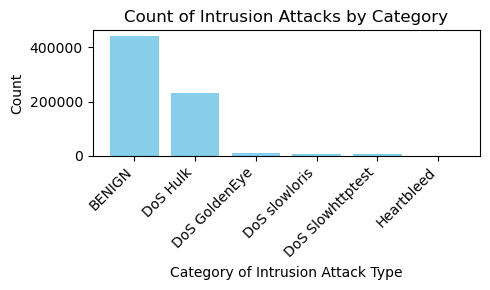

In [12]:
# Calculate count of each intrusion attack category
category_counts = df4["label"].value_counts()

# Plot bar chart
plt.figure(figsize=(5, 3))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Count of Intrusion Attacks by Category')
plt.xlabel('Category of Intrusion Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Unique label types after replacement:
['BENIGN' 'ATTACK']
label
BENIGN    440031
ATTACK    252672
Name: count, dtype: int64


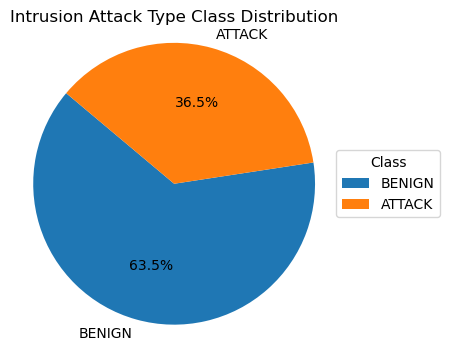

In [13]:
# Create a copy of df4 and assign it to df5
df5 = df4.copy()

# Replace other category labels except BENIGN with ATTACK
df5.loc[df5['label'] != 'BENIGN', 'label'] = 'ATTACK'

# Display unique label types after replacement
print("Unique label types after replacement:")
print(df5['label'].unique())

# Calculate class distribution
class_distribution = df5['label'].value_counts()
# Output the numerical value of the count of each unique label
print(class_distribution)

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Intrusion Attack Type Class Distribution')
plt.legend(title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Data Preparation

In [14]:
# Define label mapping dictionary for converting categorical label classes to numerical label classes for easy ML training and analysis (Label Encoding)
label_mapping = {"BENIGN": 0, "ATTACK": 1}

# Map labels using the label mapping dictionary
df5["encoded_label"] = df5["label"].map(label_mapping)

# Display unique label types after label mapping
print("Unique encoded_label types after label mapping:")
print(df5["encoded_label"].unique())

df5.info()

Unique encoded_label types after label mapping:
[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   flow_id                         692703 non-null  object 
 1   source_ip                       692703 non-null  object 
 2   source_port                     692703 non-null  int64  
 3   destination_ip                  692703 non-null  object 
 4   destination_port                692703 non-null  int64  
 5   protocol                        692703 non-null  int64  
 6   timestamp                       692703 non-null  object 
 7   flow_duration                   692703 non-null  int64  
 8   total_fwd_packets               692703 non-null  int64  
 9   total_backward_packets          692703 non-null  int64  
 10  total_length_of_fwd_packets     692703 non-null  int64  
 11  total_length_of_bwd_pack

In [15]:
# Display unique encoded_label types (0,1)
print("Unique encoded_label types:")
print(df5["encoded_label"].unique())

Unique encoded_label types:
[0 1]


In [16]:
# List the columns in df5
df5columns_list = df5.columns.tolist()
print("Columns in df5:")
print(df5columns_list)

Columns in df5:
['flow_id                       ', 'source_ip', 'source_port', 'destination_ip', 'destination_port', 'protocol', 'timestamp', 'flow_duration', 'total_fwd_packets', 'total_backward_packets', 'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'fwd_packet_length_mean', 'fwd_packet_length_std', 'bwd_packet_length_max', 'bwd_packet_length_min', 'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow _iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length', 'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s', 'min_packet_length', 'max_packet_length', 'packet_length_mean', 'packet_length_std', 'packet_length_variance', 'fin_flag_count', '

In [17]:
# The encoded_label represents the prediction class (target variable, y) while the x stands for the collection of input features for ML Training
# Dropping of flow_id, source_ip, destination_ip, timestamp, label and encoded_label categorical features owing to their lack of significance to Anomaly-based IDS

X = df5.drop(["flow_id                       ", "source_ip", "destination_ip", "timestamp", "label", "encoded_label"], axis=1)
y = df5["encoded_label"]
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_port                  692703 non-null  int64  
 1   destination_port             692703 non-null  int64  
 2   protocol                     692703 non-null  int64  
 3   flow_duration                692703 non-null  int64  
 4   total_fwd_packets            692703 non-null  int64  
 5   total_backward_packets       692703 non-null  int64  
 6   total_length_of_fwd_packets  692703 non-null  int64  
 7   total_length_of_bwd_packets  692703 non-null  float64
 8   fwd_packet_length_max        692703 non-null  int64  
 9   fwd_packet_length_min        692703 non-null  int64  
 10  fwd_packet_length_mean       692703 non-null  float64
 11  fwd_packet_length_std        692703 non-null  float64
 12  bwd_packet_length_max        692703 non-null  int64  
 13 

# Locating Missing Values and  Infinity Entries in X

In [18]:
# To locate instances of infinity and missing values in the input_feature dataframe, X
# Locate missing values in the DataFrame X
missing_values_count = X.isnull().sum()
print("Positions of missing_values:")
print(missing_values_count[missing_values_count>0])

# Locate infinity entries in the DataFrame X
infinity_entries_count = np.isinf(X).sum()
print("Position of infinity_entries:")
print(infinity_entries_count[infinity_entries_count>0])


Positions of missing_values:
flow_bytes/s    1008
dtype: int64
Position of infinity_entries:
flow_bytes/s       289
flow_packets/s    1297
dtype: int64


## Handling Missing Values and  Infinity Entries in X -> X2 -> X3

In [19]:
# Handling infinte entries; Replace infinity entries in numeric columns of X with NaN
number_columns = X.select_dtypes(include=[np.number]).columns
X_inf_replaced = X[number_columns].replace([np.inf, -np.inf], np.nan)
# Copy the DataFrame to avoid modifying the original
X2 = X_inf_replaced.copy() # Now, X2 contains the DataFrame with infinity entries replaced by NaN
# Locate infinity entries in the DataFrame X2
X2infinity_entries_count = np.isinf(X2).sum()
print("Position of X2_infinity entries:")
print(X2infinity_entries_count[X2infinity_entries_count > 0])
# Handling missing values in X2
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Create a SimpleImputer object with strategy='mean'
imputer.fit(X2)  # Fit the imputer to the dataframe, X2 (compute the mean for each feature) 
X2_missingvalue_imputed = imputer.transform(X2)  # Transform the dataframe, X2 by replacing missing values with the mean
X3 = pd.DataFrame(X2_missingvalue_imputed, columns=X2.columns)  # Convert the NumPy array back to a DataFrame; X2_missingvalue_imputed contains the DataFrame with missing values replaced by the mean of each X2 column
# Locate missing values in the DataFrame X3
missing_valuesimputed_count = X3.isnull().sum()
print("Positions of X3_missing_valuesimputed:")
print(missing_valuesimputed_count[missing_valuesimputed_count>0])

Position of X2_infinity entries:
Series([], dtype: int64)
Positions of X3_missing_valuesimputed:
Series([], dtype: int64)


## Evaluating the impact of Class Imbalance on Model Performance for NB, RF, and XGBoost using Bagged Undersampling Technique

In [20]:
# Calculate class distribution
class_distribution = df5["label"].value_counts()
# Output the numerical value of the count of each unique label
print(class_distribution)

label
BENIGN    440031
ATTACK    252672
Name: count, dtype: int64


In [21]:
X3.head() 

source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0      49459.0              80.0       6.0        38308.0                1.0   
1      49453.0             389.0       6.0          479.0               11.0   
2      46124.0              88.0       6.0         1095.0               10.0   
3      49454.0             389.0       6.0        15206.0               17.0   
4      46126.0              88.0       6.0         1092.0                9.0   

   total_backward_packets  total_length_of_fwd_packets  \
0                     1.0                          6.0   
1                     5.0                        172.0   
2                     6.0                       3150.0   
3                    12.0                       3452.0   
4                     6.0                       3150.0   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                          6.0                    6.0                    6.0   
1                        326.0                   79.0                    0.0   
2                       3150.0                 1575.0                    0.0   
3                       6660.0                 1313.0                    0.0   
4                       3152.0                 1575.0                    0.0   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...               0.0                  20.0          0.0         0.0   
1  ...               4.0                  32.0          0.0         0.0   
2  ...               3.0                  32.0          0.0         0.0   
3  ...              10.0                  32.0          0.0         0.0   
4  ...               2.0                  32.0          0.0         0.0   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0         0.0         0.0        0.0       0.0       0.0       0.0  
1         0.0         0.0        0.0       0.0       0.0       0.0  
2         0.0         0.0        0.0       0.0       0.0       0.0  
3         0.0         0.0        0.0       0.0       0.0       0.0  
4         0.0         0.0        0.0       0.0       0.0       0.0  

[5 rows x 79 columns]

In [45]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_port                  692703 non-null  float64
 1   destination_port             692703 non-null  float64
 2   protocol                     692703 non-null  float64
 3   flow_duration                692703 non-null  float64
 4   total_fwd_packets            692703 non-null  float64
 5   total_backward_packets       692703 non-null  float64
 6   total_length_of_fwd_packets  692703 non-null  float64
 7   total_length_of_bwd_packets  692703 non-null  float64
 8   fwd_packet_length_max        692703 non-null  float64
 9   fwd_packet_length_min        692703 non-null  float64
 10  fwd_packet_length_mean       692703 non-null  float64
 11  fwd_packet_length_std        692703 non-null  float64
 12  bwd_packet_length_max        692703 non-null  float64
 13 

## Z-score Normalization Technique to Rescale and Normalize the Unbalanced Input Feature DataFrame, X3

In [22]:
# using z-score normalization to rescale and normalize the unbalanced input_feature data frame X3

from sklearn.preprocessing import StandardScaler

X3_scaler = StandardScaler()  # Creating a StandardScaler object, X3_scaler

# Apply z-score normalization to the numerical columns of X3
X3_scaled = X3.copy()  # Make a copy of the original DataFrame, X3 so as to preserve the integrity of X3
numerical_cols = X3_scaled.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns of both Float64 & int64 data types
X3_scaled[numerical_cols] = X3_scaler.fit_transform(X3_scaled[numerical_cols])  # Fit and transform the data (Normalization)

# Display the normalized DataFrame
X3_scaled.head()


source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0     0.351920         -0.356503 -0.642646      -0.653857          -0.011451   
1     0.351613         -0.336856 -0.642646      -0.654742           0.001932   
2     0.181207         -0.355994 -0.642646      -0.654728           0.000594   
3     0.351664         -0.336856 -0.642646      -0.654398           0.009962   
4     0.181309         -0.355994 -0.642646      -0.654728          -0.000744   

   total_backward_packets  total_length_of_fwd_packets  \
0               -0.009362                    -0.089086   
1               -0.005298                    -0.062154   
2               -0.004282                     0.421001   
3                0.001815                     0.469998   
4               -0.004282                     0.421001   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                    -0.007581              -0.376966              -0.176667   
1                    -0.007438              -0.256056              -0.294156   
2                    -0.006178               2.221785              -0.294156   
3                    -0.004612               1.787832              -0.294156   
4                    -0.006177               2.221785              -0.294156   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...         -0.008559             -1.069401    -0.131646   -0.100396   
1  ...         -0.002966              0.828623    -0.131646   -0.100396   
2  ...         -0.004364              0.828623    -0.131646   -0.100396   
3  ...          0.005424              0.828623    -0.131646   -0.100396   
4  ...         -0.005763              0.828623    -0.131646   -0.100396   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
1    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
2    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
3    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
4    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  

[5 rows x 79 columns]

In [23]:
# Creating a copy of X3_scaled into X4
X4 = X3_scaled.copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: encoded_label, dtype: int64

## Evaluating the Performance of NB on Z-score Normalized Unbalanced Input Feature DataFrame, X4                                                (Mutual Information-Based Feature Selection Method- 12)

Selected Features:
Index(['init_win_bytes_forward', 'packet_length_mean', 'average_packet_size',
       'destination_port', 'avg_bwd_segment_size', 'bwd_packet_length_mean',
       'max_packet_length', 'subflow_bwd_bytes', 'total_length_of_bwd_packets',
       'bwd_packet_length_max', 'packet_length_std', 'packet_length_variance'],
      dtype='object')


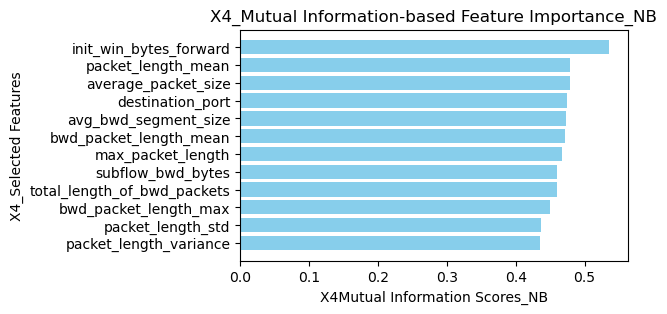

Training Time: 0.1939704418182373 seconds
Testing Time: 0.037757158279418945 seconds
Cross-validation scores: [0.93130267 0.93023801 0.93225783 0.93159015 0.93222174 0.92931644
 0.93267287 0.93027285 0.93168038 0.93417064]
Mean cross-validation score: 0.9315723589925609
Test set accuracy: 0.9321572675236933


In [24]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

X4 = X3_scaled.copy()
y.head()

# X4 is an already Z-score normalized unbalanced_input feature data frame and y contains the target variable

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X4_train, y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X4_train_selected = X4_train.iloc[:, selected_feature_indices]
X4_test_selected = X4_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X4_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X4Mutual Information Scores_NB')
plt.ylabel('X4_Selected Features')
plt.title('X4_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X4nb_model = GaussianNB()


# Train Naive Bayes model on the entire training set
X4nb_model = X4nb_model.fit(X4_train_selected, y_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()


# Make predictions on the test set
y_pred = X4nb_model.predict(X4_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Perform k-fold cross-validation
cv_scores = cross_val_score(X4nb_model, X4_train_selected, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)


## Evaluating the Performance of RF on Z-score Normalized Unbalanced Input Feature DataFrame, X4                                                 (Mutual Information-Based Feature Selection Method- 12)

In [39]:
X4.head()

source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0     0.351920         -0.356503 -0.642646      -0.653857          -0.011451   
1     0.351613         -0.336856 -0.642646      -0.654742           0.001932   
2     0.181207         -0.355994 -0.642646      -0.654728           0.000594   
3     0.351664         -0.336856 -0.642646      -0.654398           0.009962   
4     0.181309         -0.355994 -0.642646      -0.654728          -0.000744   

   total_backward_packets  total_length_of_fwd_packets  \
0               -0.009362                    -0.089086   
1               -0.005298                    -0.062154   
2               -0.004282                     0.421001   
3                0.001815                     0.469998   
4               -0.004282                     0.421001   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                    -0.007581              -0.376966              -0.176667   
1                    -0.007438              -0.256056              -0.294156   
2                    -0.006178               2.221785              -0.294156   
3                    -0.004612               1.787832              -0.294156   
4                    -0.006177               2.221785              -0.294156   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...         -0.008559             -1.069401    -0.131646   -0.100396   
1  ...         -0.002966              0.828623    -0.131646   -0.100396   
2  ...         -0.004364              0.828623    -0.131646   -0.100396   
3  ...          0.005424              0.828623    -0.131646   -0.100396   
4  ...         -0.005763              0.828623    -0.131646   -0.100396   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
1    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
2    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
3    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
4    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  

[5 rows x 79 columns]

X4rf_Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Training Time: 2788.1749427318573 seconds
Testing Time: 1.624565601348877 seconds
Test set accuracy_X4rf: 0.9936553078150151


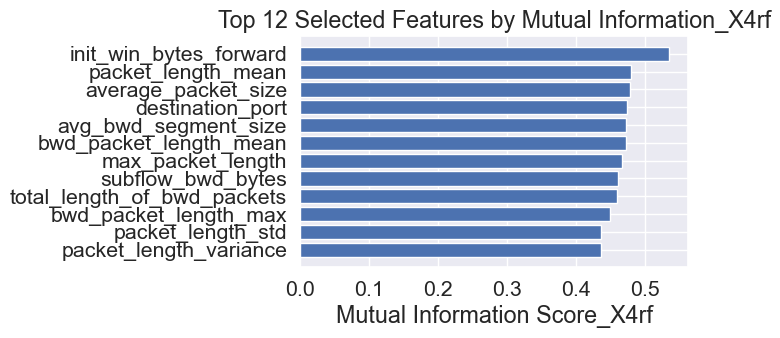

In [169]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into train and test sets
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X4_train, y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X4rf_train_selected = X4_train.iloc[:, selected_feature_indices]
X4rf_test_selected = X4_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X4rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4rf_random_search = RandomizedSearchCV(estimator=X4rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4rf_random_search = X4rf_random_search.fit(X4rf_train_selected, y_train)

# Train Random Forest model with the best hyperparameters
X4best_rf_model = RandomForestClassifier(**X4rf_random_search.best_params_)
X4best_rf_model = X4best_rf_model.fit(X4rf_train_selected, y_train)


# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Print the best hyperparameters
print("X4rf_Best hyperparameters:", X4rf_random_search.best_params_)


# Make predictions on the test set
y_pred_X4rf = X4best_rf_model.predict(X4rf_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy
X4rf_accuracy = accuracy_score(y_test, y_pred_X4rf)
print("Test set accuracy_X4rf:", X4rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X4rf_train_selected.columns)
plt.xlabel('Mutual Information Score_X4rf')
plt.title('Top 12 Selected Features by Mutual Information_X4rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of XGBoost on Z-score Normalized Unbalanced Input Feature DataFrame, X4                                           (Mutual Information-Based Feature Selection Method- 12)

In [44]:
X4.head()

source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0     0.351920         -0.356503 -0.642646      -0.653857          -0.011451   
1     0.351613         -0.336856 -0.642646      -0.654742           0.001932   
2     0.181207         -0.355994 -0.642646      -0.654728           0.000594   
3     0.351664         -0.336856 -0.642646      -0.654398           0.009962   
4     0.181309         -0.355994 -0.642646      -0.654728          -0.000744   

   total_backward_packets  total_length_of_fwd_packets  \
0               -0.009362                    -0.089086   
1               -0.005298                    -0.062154   
2               -0.004282                     0.421001   
3                0.001815                     0.469998   
4               -0.004282                     0.421001   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                    -0.007581              -0.376966              -0.176667   
1                    -0.007438              -0.256056              -0.294156   
2                    -0.006178               2.221785              -0.294156   
3                    -0.004612               1.787832              -0.294156   
4                    -0.006177               2.221785              -0.294156   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...         -0.008559             -1.069401    -0.131646   -0.100396   
1  ...         -0.002966              0.828623    -0.131646   -0.100396   
2  ...         -0.004364              0.828623    -0.131646   -0.100396   
3  ...          0.005424              0.828623    -0.131646   -0.100396   
4  ...         -0.005763              0.828623    -0.131646   -0.100396   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
1    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
2    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
3    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
4    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  

[5 rows x 79 columns]

Training Time: 110.05906796455383 seconds
Testing Time: 0.13063549995422363 seconds
Test set accuracy_X4xgb: 0.9931861326249991
X4xgb_Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


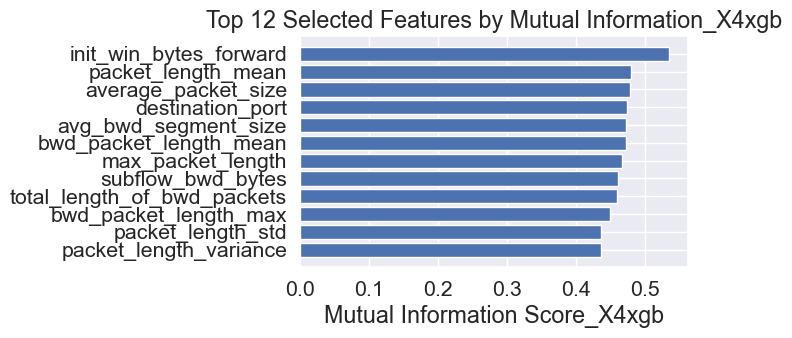

In [168]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into train and test sets
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X4_train, y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X4xgb_train_selected = X4_train.iloc[:, selected_feature_indices]
X4xgb_test_selected = X4_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize XGBoost model
X4xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4xgb_random_search = RandomizedSearchCV(estimator=X4xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4xgb_random_search = X4xgb_random_search.fit(X4xgb_train_selected, y_train)


# Train XGBoost model with the best hyperparameters
X4best_xgb_model = XGBClassifier(**X4xgb_random_search.best_params_)
X4best_xgb_model = X4best_xgb_model.fit(X4xgb_train_selected, y_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make predictions on the test set
y_pred_X4xgb = X4best_xgb_model.predict(X4xgb_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



# Calculate accuracy
X4xgb_accuracy = accuracy_score(y_test, y_pred_X4xgb)
print("Test set accuracy_X4xgb:", X4xgb_accuracy)

# Print the best hyperparameters
print("X4xgb_Best hyperparameters:", X4xgb_random_search.best_params_)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X4xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X4xgb')
plt.title('Top 12 Selected Features by Mutual Information_X4xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()



## Handling High Dimensional Class Imbalance Issue with Bagged Undersampling Technique

In [25]:
print(df5['label'].unique())
# Calculate class distribution
class_distribution = df5['label'].value_counts()
# Output the numerical value of the count of each unique label
print(class_distribution)

['BENIGN' 'ATTACK']
label
BENIGN    440031
ATTACK    252672
Name: count, dtype: int64


In [26]:
X4.head()



source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0     0.351920         -0.356503 -0.642646      -0.653857          -0.011451   
1     0.351613         -0.336856 -0.642646      -0.654742           0.001932   
2     0.181207         -0.355994 -0.642646      -0.654728           0.000594   
3     0.351664         -0.336856 -0.642646      -0.654398           0.009962   
4     0.181309         -0.355994 -0.642646      -0.654728          -0.000744   

   total_backward_packets  total_length_of_fwd_packets  \
0               -0.009362                    -0.089086   
1               -0.005298                    -0.062154   
2               -0.004282                     0.421001   
3                0.001815                     0.469998   
4               -0.004282                     0.421001   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                    -0.007581              -0.376966              -0.176667   
1                    -0.007438              -0.256056              -0.294156   
2                    -0.006178               2.221785              -0.294156   
3                    -0.004612               1.787832              -0.294156   
4                    -0.006177               2.221785              -0.294156   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...         -0.008559             -1.069401    -0.131646   -0.100396   
1  ...         -0.002966              0.828623    -0.131646   -0.100396   
2  ...         -0.004364              0.828623    -0.131646   -0.100396   
3  ...          0.005424              0.828623    -0.131646   -0.100396   
4  ...         -0.005763              0.828623    -0.131646   -0.100396   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
1    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
2    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
3    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
4    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  

[5 rows x 79 columns]

In [27]:
y.value_counts()

encoded_label
0    440031
1    252672
Name: count, dtype: int64

## Balancing the Unbalanced Z-Score Normalized X4 Dataframe

Resampled Counts of Class Distribution:
0    440031
1    440031
Name: count, dtype: int64


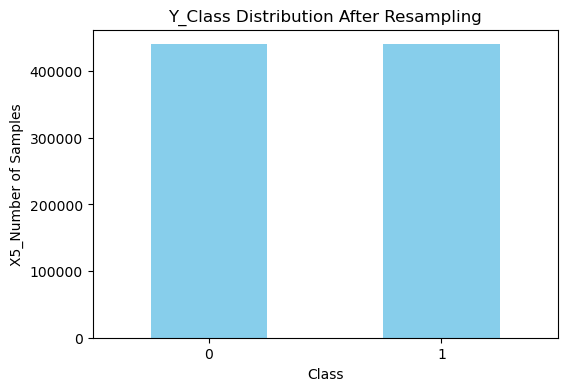

In [28]:
# Handling High Dimensional Class Imbalance Issue with Bagged Undersampling Technique

from sklearn.utils import resample, shuffle

# X4 is an already Z-score normalized unbalanced_input feature data frame and y contains the target variable

# Separate the minority and majority classes
X4_minority = X4[y == 1]  # ATTACK class
X4_majority = X4[y == 0]  # BENIGN class

# Upsample the minority class using bagged undersampling
X4_minority_resampled = pd.concat([resample(X4_minority, replace=True, n_samples=len(X4_majority), random_state=42)])

# Concatenate the resampled minority class with the majority class
X4_resampled = pd.concat([X4_majority, X4_minority_resampled])
y_resampled = pd.concat([pd.Series([0]*len(X4_majority)), pd.Series([1]*len(X4_minority_resampled))])

# Shuffle the data to avoid any ordering bias
X4_resampled_shuffled, y_resampled_shuffled = shuffle(X4_resampled, y_resampled, random_state=42)

# Now X4_resampled_shuffled and y_resampled_shuffled contain balanced classes

# Copy the resampled data into X5 and Y
X5 = X4_resampled_shuffled.copy()
Y = y_resampled_shuffled.copy()

# Print value counts of Y
print("Resampled Counts of Class Distribution:")
print(Y.value_counts())


# Generate value counts for Y
class_counts = Y.value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Y_Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('X5_Number of Samples')
plt.xticks(rotation=0)
plt.show()




In [29]:
X5.head()

source_port  destination_port  protocol  flow_duration  \
613896     0.281741         -0.356503 -0.642646      -0.652457   
133240     0.612930         -0.356503 -0.642646       1.650316   
195955     0.739775         -0.356503 -0.642646       1.344258   
20030      0.925128         -0.358220  1.553054      -0.653341   
577986     1.035592         -0.358220  1.553054      -0.654749   

        total_fwd_packets  total_backward_packets  \
613896          -0.011451               -0.009362   
133240          -0.006098               -0.004282   
195955          -0.004759               -0.004282   
20030           -0.011451               -0.009362   
577986          -0.010113               -0.008346   

        total_length_of_fwd_packets  total_length_of_bwd_packets  \
613896                    -0.090059                    -0.007584   
133240                    -0.032139                    -0.002410   
195955                    -0.037493                    -0.002410   
20030                     -0.079676                    -0.007532   
577986                    -0.078378                    -0.007523   

        fwd_packet_length_max  fwd_packet_length_min  ...  act_data_pkt_fwd  \
613896              -0.386904              -0.294156  ...         -0.008559   
133240               0.194461              -0.294156  ...         -0.007161   
195955               0.149741              -0.294156  ...         -0.007161   
20030               -0.280900               0.959056  ...         -0.008559   
577986              -0.327277               0.410776  ...         -0.007161   

        min_seg_size_forward  active_mean  active_std  active_max  active_min  \
613896              0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
133240             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   
195955              0.828623    -0.131640   -0.100396   -0.148666   -0.104359   
20030               0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
577986             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   

        idle_mean  idle_std  idle_max  idle_min  
613896  -0.579980 -0.105686 -0.585240 -0.570780  
133240   1.974833 -0.105686  1.945754  1.987180  
195955   1.657449 -0.105686  1.631329  1.669404  
20030   -0.579980 -0.105686 -0.585240 -0.570780  
577986  -0.579980 -0.105686 -0.585240 -0.570780  

[5 rows x 79 columns]

In [30]:
Y.head(20)

365286    0
339326    1
424747    1
20029     0
331248    0
327679    1
218334    0
233716    1
71552     0
135749    1
68307     1
275336    0
393705    1
109035    1
34908     0
187104    1
42197     0
3698      0
97887     1
196477    1
dtype: int64

## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5                                             (Mutual Information-Based Feature Selection Method- 12)

Selected Features:
Index(['init_win_bytes_forward', 'destination_port', 'packet_length_mean',
       'average_packet_size', 'bwd_packet_length_mean', 'avg_bwd_segment_size',
       'max_packet_length', 'total_length_of_bwd_packets', 'subflow_bwd_bytes',
       'bwd_packet_length_max', 'flow_iat_max', 'packet_length_std'],
      dtype='object')


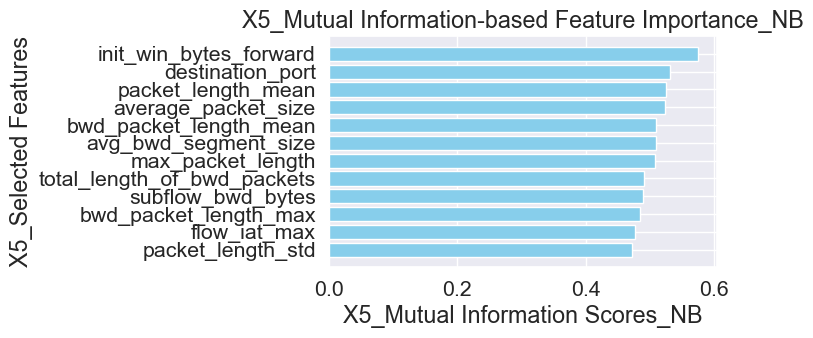

X5nb_Test set accuracy: 0.9462255628845596
Cross-validation scores: [0.94652368 0.94646687 0.94554364 0.94523116 0.94569988 0.94706342
 0.94568568 0.9461686  0.94558625 0.94503153]
Mean cross-validation score: 0.9459000710624705
Training Time: 0.23823976516723633 seconds
Testing Time: 0.06248593330383301 seconds


In [166]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X5_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_test_selected = X5_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X5_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X5_Mutual Information Scores_NB')
plt.ylabel('X5_Selected Features')
plt.title('X5_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()


# Train Naive Bayes model on the entire training set
X5nb_model = X5nb_model.fit(X5_train_selected, Y_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst


# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5                                                 (Mutual Information-Based Feature Selection Method- 12)

In [64]:
X5.head()

source_port  destination_port  protocol  flow_duration  \
613896     0.281741         -0.356503 -0.642646      -0.652457   
133240     0.612930         -0.356503 -0.642646       1.650316   
195955     0.739775         -0.356503 -0.642646       1.344258   
20030      0.925128         -0.358220  1.553054      -0.653341   
577986     1.035592         -0.358220  1.553054      -0.654749   

        total_fwd_packets  total_backward_packets  \
613896          -0.011451               -0.009362   
133240          -0.006098               -0.004282   
195955          -0.004759               -0.004282   
20030           -0.011451               -0.009362   
577986          -0.010113               -0.008346   

        total_length_of_fwd_packets  total_length_of_bwd_packets  \
613896                    -0.090059                    -0.007584   
133240                    -0.032139                    -0.002410   
195955                    -0.037493                    -0.002410   
20030                     -0.079676                    -0.007532   
577986                    -0.078378                    -0.007523   

        fwd_packet_length_max  fwd_packet_length_min  ...  act_data_pkt_fwd  \
613896              -0.386904              -0.294156  ...         -0.008559   
133240               0.194461              -0.294156  ...         -0.007161   
195955               0.149741              -0.294156  ...         -0.007161   
20030               -0.280900               0.959056  ...         -0.008559   
577986              -0.327277               0.410776  ...         -0.007161   

        min_seg_size_forward  active_mean  active_std  active_max  active_min  \
613896              0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
133240             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   
195955              0.828623    -0.131640   -0.100396   -0.148666   -0.104359   
20030               0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
577986             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   

        idle_mean  idle_std  idle_max  idle_min  
613896  -0.579980 -0.105686 -0.585240 -0.570780  
133240   1.974833 -0.105686  1.945754  1.987180  
195955   1.657449 -0.105686  1.631329  1.669404  
20030   -0.579980 -0.105686 -0.585240 -0.570780  
577986  -0.579980 -0.105686 -0.585240 -0.570780  

[5 rows x 79 columns]

In [65]:
Y.head(20)

365286    0
339326    1
424747    1
20029     0
331248    0
327679    1
218334    0
233716    1
71552     0
135749    1
68307     1
275336    0
393705    1
109035    1
34908     0
187104    1
42197     0
3698      0
97887     1
196477    1
dtype: int64

X5_Test set accuracy_rf: 0.999727292870413


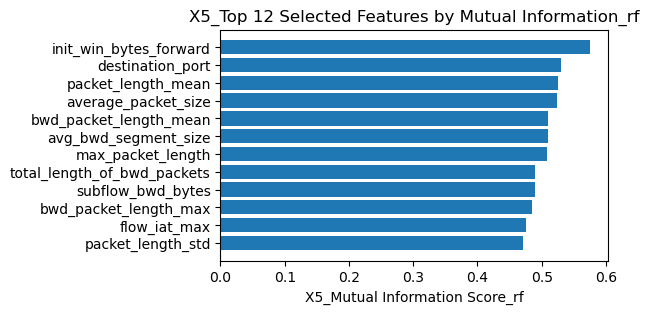

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Training Time: 3667.8282046318054 seconds
Testing Time: 2.107238531112671 seconds


In [80]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X5rf_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make predictions on the test set
X5Y_pred_rf = X5best_rf_model.predict(X5rf_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Calculate accuracy
X5rf_accuracy = accuracy_score(Y_test, X5Y_pred_rf)
print("X5_Test set accuracy_rf:", X5rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5rf_train_selected.columns)
plt.xlabel('X5_Mutual Information Score_rf')
plt.title('X5_Top 12 Selected Features by Mutual Information_rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Print the best hyperparameters
print("Best hyperparameters:", X5rf_random_search.best_params_)

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")










## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5                                         (Mutual Information-Based Feature Selection Method- 12)

In [67]:
X5.head()

source_port  destination_port  protocol  flow_duration  \
613896     0.281741         -0.356503 -0.642646      -0.652457   
133240     0.612930         -0.356503 -0.642646       1.650316   
195955     0.739775         -0.356503 -0.642646       1.344258   
20030      0.925128         -0.358220  1.553054      -0.653341   
577986     1.035592         -0.358220  1.553054      -0.654749   

        total_fwd_packets  total_backward_packets  \
613896          -0.011451               -0.009362   
133240          -0.006098               -0.004282   
195955          -0.004759               -0.004282   
20030           -0.011451               -0.009362   
577986          -0.010113               -0.008346   

        total_length_of_fwd_packets  total_length_of_bwd_packets  \
613896                    -0.090059                    -0.007584   
133240                    -0.032139                    -0.002410   
195955                    -0.037493                    -0.002410   
20030                     -0.079676                    -0.007532   
577986                    -0.078378                    -0.007523   

        fwd_packet_length_max  fwd_packet_length_min  ...  act_data_pkt_fwd  \
613896              -0.386904              -0.294156  ...         -0.008559   
133240               0.194461              -0.294156  ...         -0.007161   
195955               0.149741              -0.294156  ...         -0.007161   
20030               -0.280900               0.959056  ...         -0.008559   
577986              -0.327277               0.410776  ...         -0.007161   

        min_seg_size_forward  active_mean  active_std  active_max  active_min  \
613896              0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
133240             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   
195955              0.828623    -0.131640   -0.100396   -0.148666   -0.104359   
20030               0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
577986             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   

        idle_mean  idle_std  idle_max  idle_min  
613896  -0.579980 -0.105686 -0.585240 -0.570780  
133240   1.974833 -0.105686  1.945754  1.987180  
195955   1.657449 -0.105686  1.631329  1.669404  
20030   -0.579980 -0.105686 -0.585240 -0.570780  
577986  -0.579980 -0.105686 -0.585240 -0.570780  

[5 rows x 79 columns]

In [68]:
Y.head()

365286    0
339326    1
424747    1
20029     0
331248    0
dtype: int64

X5_Test set accuracy_xgb: 0.9989773482640487


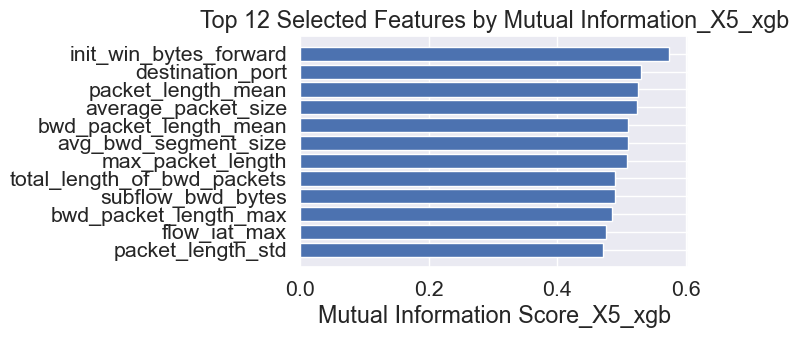

X5_xgb_Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Training Time: 141.5363211631775 seconds
Testing Time: 0.16878080368041992 seconds


In [167]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X5_xgb_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_xgb_test_selected = X5_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()


# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)


# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make predictions on the test set
X5_Y_pred_xgb = X5best_xgb_model.predict(X5_xgb_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Calculate accuracy
X5xgb_accuracy = accuracy_score(Y_test, X5_Y_pred_xgb)
print("X5_Test set accuracy_xgb:", X5xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5_xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X5_xgb')
plt.title('Top 12 Selected Features by Mutual Information_X5_xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Print the best hyperparameters
print("X5_xgb_Best hyperparameters:", X5xgb_random_search.best_params_)


# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



## Classifier Performance Comparison (Accuracy) Plot for Unbalanced and Balanced Input Feature DataFrame Scenarios

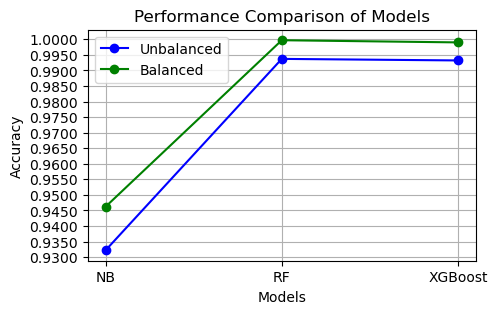

In [75]:
# Model Performance Comparison (Accuracy) Plot for Unbalanced and Balanced Input Feature DataFrame Scenarios

# Determine y-axis tick positions
y_ticks = np.arange(0.9300, 1.0001, 0.0050)

# Plotting the data
plt.figure(figsize=(5, 3))
plt.plot(models, accuracy_unbalanced, marker='o', label='Unbalanced', color='blue')
plt.plot(models, accuracy_balanced, marker='o', label='Balanced', color='green')
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.yticks(y_ticks)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))  # Format y-axis labels with four decimal points
plt.show()


# Explorative Analysis of High-Dimensional Dataset Reduction to Fewer Features (12, 10, 8, 14) without Compromising Model Accuracy (Comparison of Feature Selection Methods)

In [78]:
X5.head()

source_port  destination_port  protocol  flow_duration  \
613896     0.281741         -0.356503 -0.642646      -0.652457   
133240     0.612930         -0.356503 -0.642646       1.650316   
195955     0.739775         -0.356503 -0.642646       1.344258   
20030      0.925128         -0.358220  1.553054      -0.653341   
577986     1.035592         -0.358220  1.553054      -0.654749   

        total_fwd_packets  total_backward_packets  \
613896          -0.011451               -0.009362   
133240          -0.006098               -0.004282   
195955          -0.004759               -0.004282   
20030           -0.011451               -0.009362   
577986          -0.010113               -0.008346   

        total_length_of_fwd_packets  total_length_of_bwd_packets  \
613896                    -0.090059                    -0.007584   
133240                    -0.032139                    -0.002410   
195955                    -0.037493                    -0.002410   
20030                     -0.079676                    -0.007532   
577986                    -0.078378                    -0.007523   

        fwd_packet_length_max  fwd_packet_length_min  ...  act_data_pkt_fwd  \
613896              -0.386904              -0.294156  ...         -0.008559   
133240               0.194461              -0.294156  ...         -0.007161   
195955               0.149741              -0.294156  ...         -0.007161   
20030               -0.280900               0.959056  ...         -0.008559   
577986              -0.327277               0.410776  ...         -0.007161   

        min_seg_size_forward  active_mean  active_std  active_max  active_min  \
613896              0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
133240             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   
195955              0.828623    -0.131640   -0.100396   -0.148666   -0.104359   
20030               0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
577986             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   

        idle_mean  idle_std  idle_max  idle_min  
613896  -0.579980 -0.105686 -0.585240 -0.570780  
133240   1.974833 -0.105686  1.945754  1.987180  
195955   1.657449 -0.105686  1.631329  1.669404  
20030   -0.579980 -0.105686 -0.585240 -0.570780  
577986  -0.579980 -0.105686 -0.585240 -0.570780  

[5 rows x 79 columns]

In [79]:
Y.head()

365286    0
339326    1
424747    1
20029     0
331248    0
dtype: int64

## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 10)

Selected Features:
Index(['init_win_bytes_forward', 'destination_port', 'packet_length_mean',
       'average_packet_size', 'bwd_packet_length_mean', 'avg_bwd_segment_size',
       'max_packet_length', 'total_length_of_bwd_packets', 'subflow_bwd_bytes',
       'bwd_packet_length_max'],
      dtype='object')


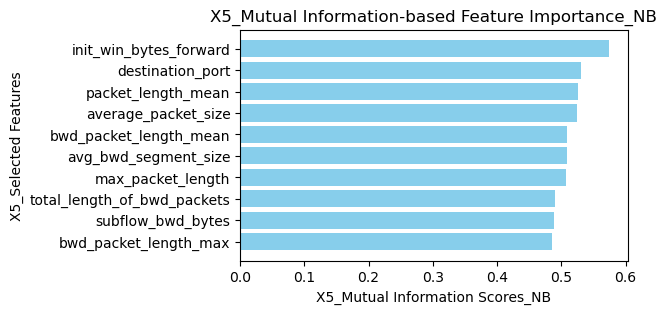

Cross-validation scores: [0.94594134 0.94596975 0.94507492 0.94489028 0.94517435 0.94676514
 0.94511753 0.94564307 0.9449755  0.94471905]
Mean cross-validation score: 0.9454270928471701
X5nb_Test set accuracy: 0.9457028742195179


In [83]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 10 features from the training and test sets
X5_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_test_selected = X5_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X5_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X5_Mutual Information Scores_NB')
plt.ylabel('X5_Selected Features')
plt.title('X5_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 8)

Selected Features:
Index(['init_win_bytes_forward', 'destination_port', 'packet_length_mean',
       'average_packet_size', 'bwd_packet_length_mean', 'avg_bwd_segment_size',
       'max_packet_length', 'total_length_of_bwd_packets'],
      dtype='object')


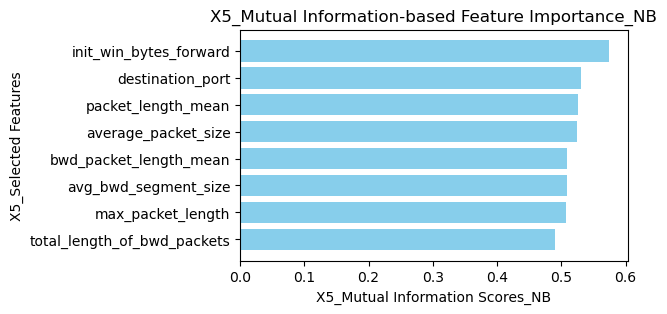

Cross-validation scores: [0.94621121 0.94623961 0.94533059 0.94517435 0.94531638 0.94694979
 0.94517435 0.94567147 0.94531638 0.94487529]
Mean cross-validation score: 0.9456259425826167
X5nb_Test set accuracy: 0.9460096697403033


In [82]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 10 features from the training and test sets
X5_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_test_selected = X5_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X5_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X5_Mutual Information Scores_NB')
plt.ylabel('X5_Selected Features')
plt.title('X5_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 14)

Selected Features:
Index(['init_win_bytes_forward', 'destination_port', 'packet_length_mean',
       'average_packet_size', 'bwd_packet_length_mean', 'avg_bwd_segment_size',
       'max_packet_length', 'total_length_of_bwd_packets', 'subflow_bwd_bytes',
       'bwd_packet_length_max', 'flow_iat_max', 'packet_length_std',
       'packet_length_variance', 'flow_iat_mean'],
      dtype='object')


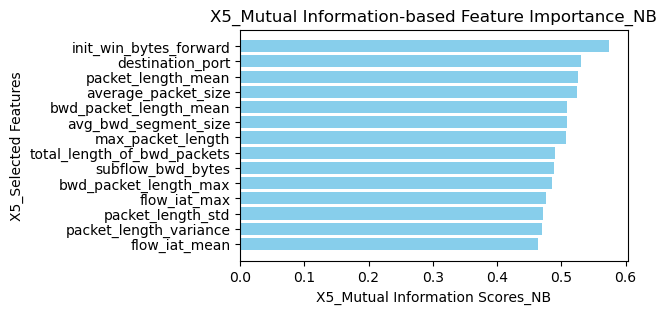

Cross-validation scores: [0.9546339  0.95457709 0.95430722 0.95248917 0.81864924 0.95523045
 0.82282508 0.9546055  0.81634827 0.82201295]
Mean cross-validation score: 0.9005678886626715
X5nb_Test set accuracy: 0.9549862794225427


In [88]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:14]

# Select the top 10 features from the training and test sets
X5_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_test_selected = X5_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X5_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X5_Mutual Information Scores_NB')
plt.ylabel('X5_Selected Features')
plt.title('X5_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 14)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
X5_Test set accuracy_rf: 0.9998636464352065


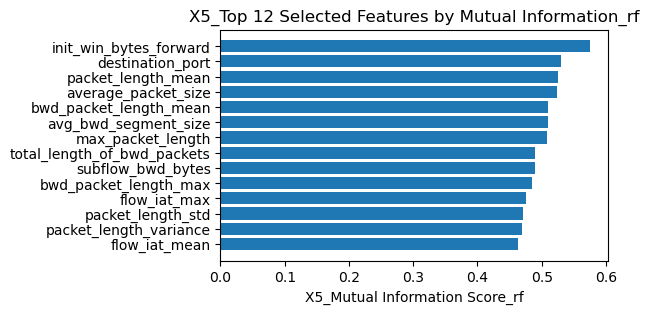

In [91]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:14]

# Select the top 12 features from the training and test sets
X5rf_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf_test_selected = X5_test.iloc[:, selected_feature_indices]

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train)

# Make predictions on the test set
X5Y_pred_rf = X5best_rf_model.predict(X5rf_test_selected)

# Calculate accuracy
X5rf_accuracy = accuracy_score(Y_test, X5Y_pred_rf)
print("X5_Test set accuracy_rf:", X5rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5rf_train_selected.columns)
plt.xlabel('X5_Mutual Information Score_rf')
plt.title('X5_Top 12 Selected Features by Mutual Information_rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 10)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
X5_Test set accuracy_rf: 0.9948696971246442


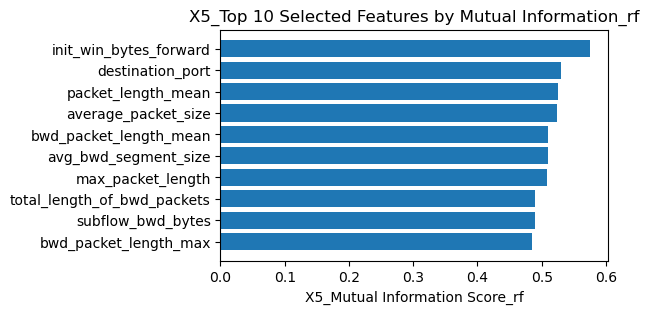

In [92]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 12 features from the training and test sets
X5rf_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf_test_selected = X5_test.iloc[:, selected_feature_indices]

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train)

# Make predictions on the test set
X5Y_pred_rf = X5best_rf_model.predict(X5rf_test_selected)

# Calculate accuracy
X5rf_accuracy = accuracy_score(Y_test, X5Y_pred_rf)
print("X5_Test set accuracy_rf:", X5rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5rf_train_selected.columns)
plt.xlabel('X5_Mutual Information Score_rf')
plt.title('X5_Top 10 Selected Features by Mutual Information_rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 8)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
X5_Test set accuracy_rf: 0.9948753785231773


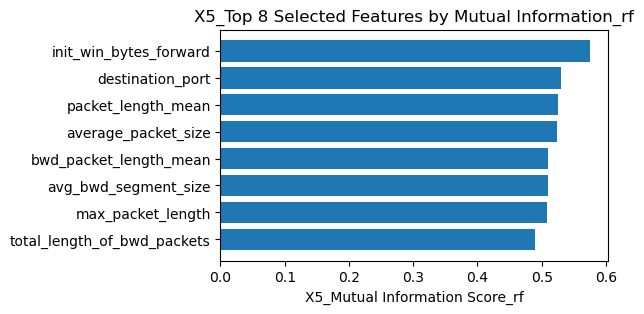

In [93]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 12 features from the training and test sets
X5rf_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf_test_selected = X5_test.iloc[:, selected_feature_indices]

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train)

# Make predictions on the test set
X5Y_pred_rf = X5best_rf_model.predict(X5rf_test_selected)

# Calculate accuracy
X5rf_accuracy = accuracy_score(Y_test, X5Y_pred_rf)
print("X5_Test set accuracy_rf:", X5rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5rf_train_selected.columns)
plt.xlabel('X5_Mutual Information Score_rf')
plt.title('X5_Top 8 Selected Features by Mutual Information_rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 14)

X5_xgb_Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
X5_Test set accuracy_xgb: 0.9995511695158881


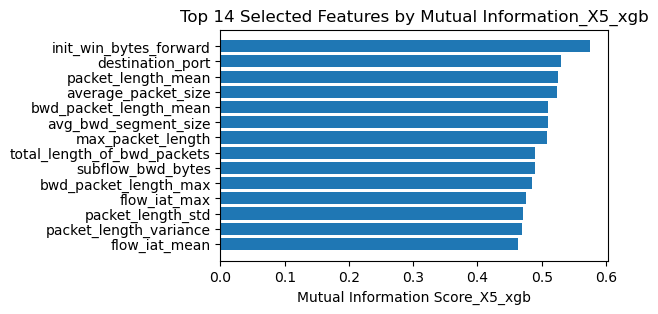

In [94]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:14]

# Select the top 12 features from the training and test sets
X5_xgb_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_xgb_test_selected = X5_test.iloc[:, selected_feature_indices]

# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

# Print the best hyperparameters
print("X5_xgb_Best hyperparameters:", X5xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Make predictions on the test set
X5_Y_pred_xgb = X5best_xgb_model.predict(X5_xgb_test_selected)

# Calculate accuracy
X5xgb_accuracy = accuracy_score(Y_test, X5_Y_pred_xgb)
print("X5_Test set accuracy_xgb:", X5xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5_xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X5_xgb')
plt.title('Top 14 Selected Features by Mutual Information_X5_xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 10)

X5_xgb_Best hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
X5_Test set accuracy_xgb: 0.9945004062199951


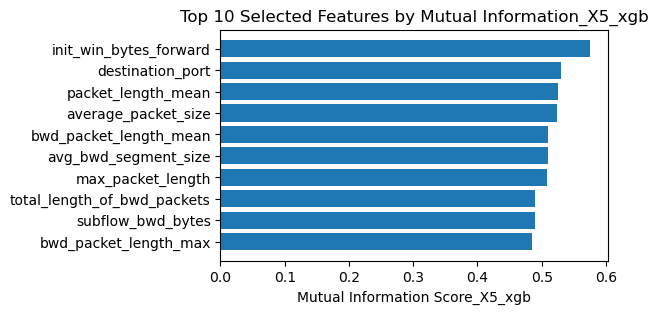

In [95]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 12 features from the training and test sets
X5_xgb_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_xgb_test_selected = X5_test.iloc[:, selected_feature_indices]

# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

# Print the best hyperparameters
print("X5_xgb_Best hyperparameters:", X5xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Make predictions on the test set
X5_Y_pred_xgb = X5best_xgb_model.predict(X5_xgb_test_selected)

# Calculate accuracy
X5xgb_accuracy = accuracy_score(Y_test, X5_Y_pred_xgb)
print("X5_Test set accuracy_xgb:", X5xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5_xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X5_xgb')
plt.title('Top 10 Selected Features by Mutual Information_X5_xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (Mutual Information-Based Feature Selection Method- 8)

X5_xgb_Best hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
X5_Test set accuracy_xgb: 0.9945004062199951


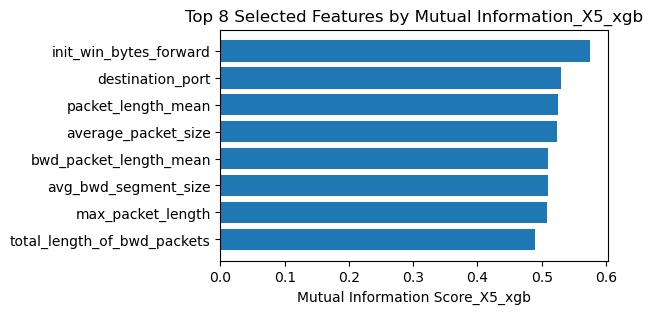

In [96]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 12 features from the training and test sets
X5_xgb_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_xgb_test_selected = X5_test.iloc[:, selected_feature_indices]

# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

# Print the best hyperparameters
print("X5_xgb_Best hyperparameters:", X5xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Make predictions on the test set
X5_Y_pred_xgb = X5best_xgb_model.predict(X5_xgb_test_selected)

# Calculate accuracy
X5xgb_accuracy = accuracy_score(Y_test, X5_Y_pred_xgb)
print("X5_Test set accuracy_xgb:", X5xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X5_xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X5_xgb')
plt.title('Top 8 Selected Features by Mutual Information_X5_xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 8)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [33 34 35 51 57 58 59 60 61 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


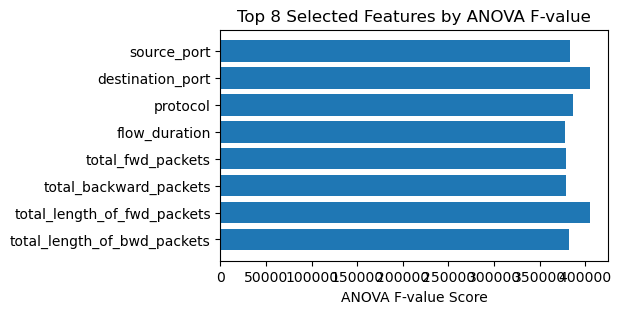

Cross-validation scores: [0.79301186 0.79194659 0.79174775 0.79099496 0.79416235 0.79332434
 0.79177615 0.79143527 0.79264257 0.79174479]
Mean cross-validation score: 0.7922786616643523
X5nb_Test set accuracy: 0.7907824990199588


In [102]:
# Implementing SelectKBest with ANOVA F-value Scoring Function feature selection method for NB classifier along with hyperparameter tuning using RandomSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use RandomSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=8)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Identify constant features
constant_features_idx = np.where(X5_train_selected.var() == 0)[0]

# Remove constant features
X5_train_selected = np.delete(X5_train_selected, constant_features_idx, axis=1)
X5_test_selected = np.delete(X5_test_selected, constant_features_idx, axis=1)

# Re-run feature selection
selector = SelectKBest(score_func=f_classif, k=8)
X5_train_selected = selector.fit_transform(X5_train_selected, Y_train)
X5_test_selected = selector.transform(X5_test_selected)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X5.columns[selected_feature_indices]

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), selected_features)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 8 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


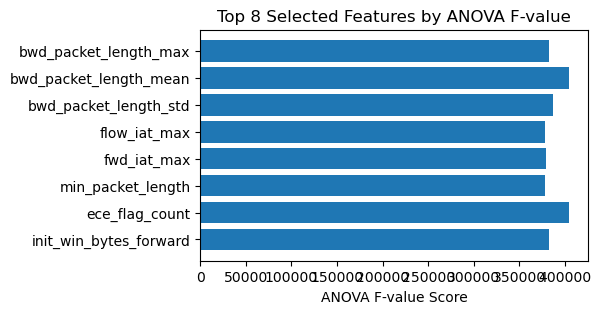

Cross-validation scores: [0.79301186 0.79194659 0.79174775 0.79099496 0.79416235 0.79332434
 0.79177615 0.79143527 0.79264257 0.79174479]
Mean cross-validation score: 0.7922786616643523
X5nb_Test set accuracy: 0.7907824990199588


In [105]:
# Implementing SelectKBest with ANOVA F-value Scoring Function feature selection method for NB classifier along with hyperparameter tuning using RandomSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use RandomSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=8)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X5.columns[selected_feature_indices]

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), selected_features)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 8 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 10)

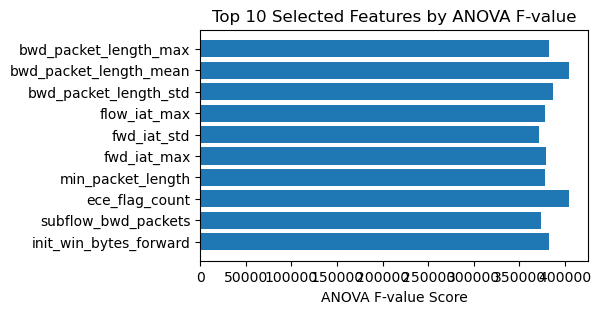

Cross-validation scores: [0.79617925 0.79480151 0.7947731  0.79446062 0.79762801 0.79630708
 0.79522761 0.79464527 0.7955827  0.79467076]
Mean cross-validation score: 0.7954275899023612
X5nb_Test set accuracy: 0.7940265775823376


In [106]:
# Implementing SelectKBest with ANOVA F-value Scoring Function feature selection method for NB classifier along with hyperparameter tuning using RandomSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use RandomSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=10)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X5.columns[selected_feature_indices]

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), selected_features)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 10 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 12)

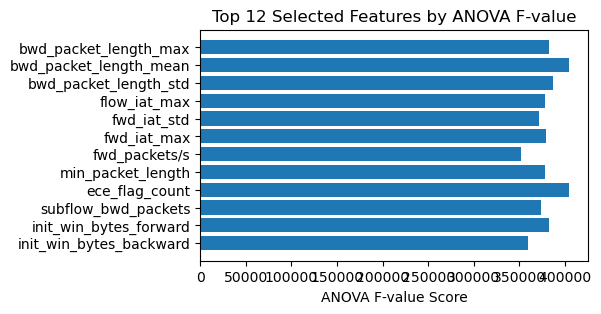

Cross-validation scores: [0.79272779 0.79169093 0.79093814 0.79092394 0.79434699 0.79261416
 0.79152049 0.7911796  0.79241531 0.79114823]
Mean cross-validation score: 0.7919505591197078
X5nb_Test set accuracy: 0.7907427292302273


In [107]:
# Implementing SelectKBest with ANOVA F-value Scoring Function feature selection method for NB classifier along with hyperparameter tuning using RandomSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use RandomSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=12)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X5.columns[selected_feature_indices]

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), selected_features)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 12 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)


## Evaluating the Performance of NB on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 14)

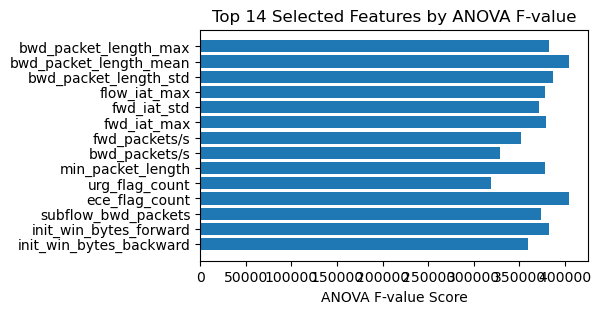

Cross-validation scores: [0.79082452 0.7899581  0.7895604  0.78938996 0.79245792 0.79133584
 0.78988708 0.78964562 0.7907819  0.78957162]
Mean cross-validation score: 0.790341296174441
X5nb_Test set accuracy: 0.7890269468732423


In [108]:
# Implementing SelectKBest with ANOVA F-value Scoring Function feature selection method for NB classifier along with hyperparameter tuning using RandomSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use RandomSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=14)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X5.columns[selected_feature_indices]

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), selected_features)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 14 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
X5nb_Y_pred = X5nb_model.predict(X5_test_selected)

# Calculate accuracy
X5nb_accuracy = accuracy_score(Y_test, X5nb_Y_pred)
print("X5nb_Test set accuracy:", X5nb_accuracy)

## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 14)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Test set accuracy_rf: 0.9677239749336697


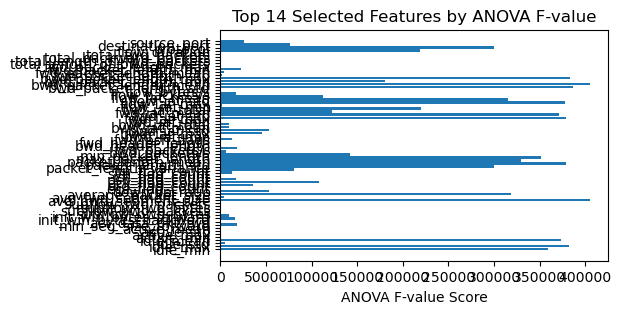

In [28]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=14)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
rf_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**rf_random_search.best_params_)
best_rf_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_rf = best_rf_model.predict(X5_test_selected)

# Calculate accuracy
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Test set accuracy_rf:", rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 14 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 12)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Test set accuracy_rf: 0.9676955679410043


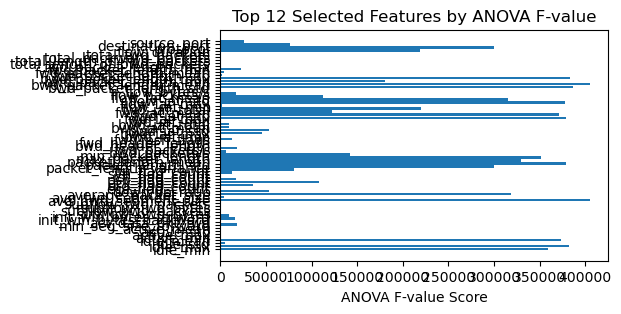

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=12)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
rf_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**rf_random_search.best_params_)
best_rf_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_rf = best_rf_model.predict(X5_test_selected)

# Calculate accuracy
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Test set accuracy_rf:", rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 12 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 10)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Test set accuracy_rf: 0.9403339526057735


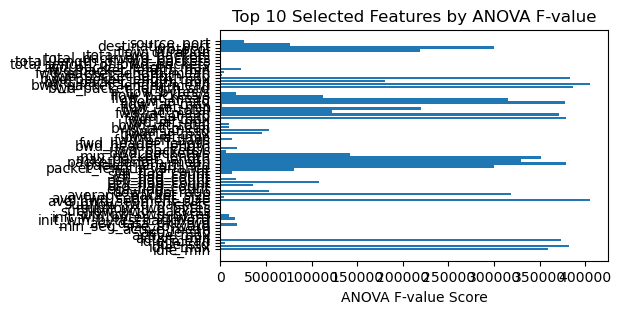

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=10)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
rf_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**rf_random_search.best_params_)
best_rf_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_rf = best_rf_model.predict(X5_test_selected)

# Calculate accuracy
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Test set accuracy_rf:", rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 10 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

## Evaluating the Performance of RF on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 8)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Test set accuracy_rf: 0.937402350962713


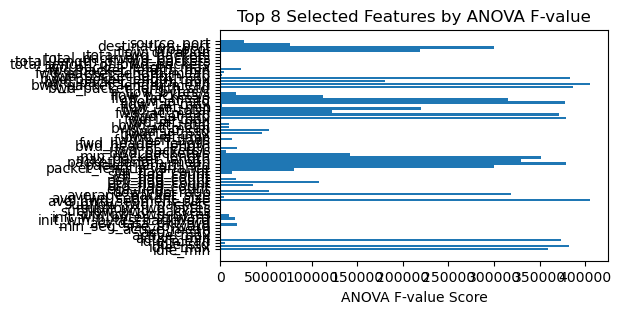

In [32]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# The warning message indicates that some features have constant values and thus zero variance (division by zero when calculating the ANOVA F-value),
#across all samples, making it uninformative for classification. This issue arises because the variance is being computed after feature selection, 
#which may lead to the selection of constant features.

#To fix this issue, This code first identifies and removes constant features before performing feature selection using SelectKBest with ANOVA F-value
#Scoring function Removing constant features before feature selection ensures that the variance is computed correctly and prevents the warning message.
#Additionally, removing constant features helps improve the quality of feature selection and model accuracy by eliminating irrelevant features.

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=8)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
rf_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**rf_random_search.best_params_)
best_rf_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_rf = best_rf_model.predict(X5_test_selected)

# Calculate accuracy
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Test set accuracy_rf:", rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 8 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show() 

## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 14)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Test set accuracy_xgb: 0.9883076818189566


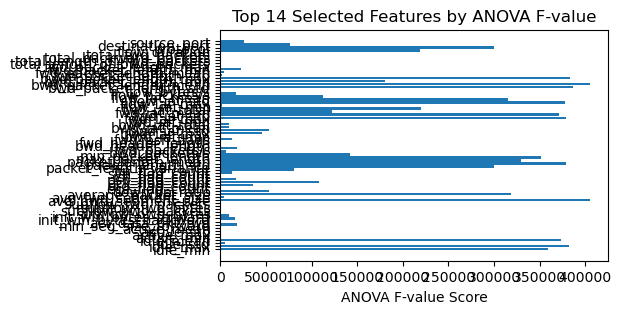

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X5 is your input features and Y is the target variable

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=14)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
xgb_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**xgb_random_search.best_params_)
best_xgb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_xgb = best_xgb_model.predict(X5_test_selected)

# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Test set accuracy_xgb:", xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 14 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 12)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Test set accuracy_xgb: 0.9876884093788527


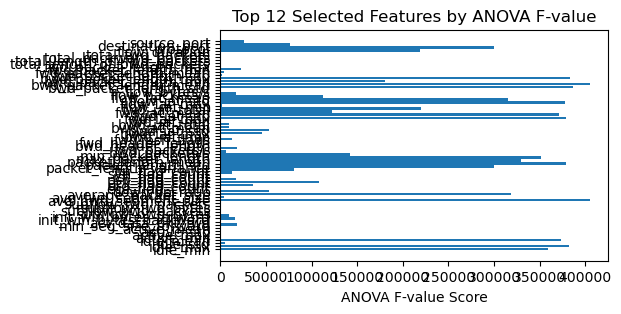

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X5 is your input features and Y is the target variable

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=12)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
xgb_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**xgb_random_search.best_params_)
best_xgb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_xgb = best_xgb_model.predict(X5_test_selected)

# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Test set accuracy_xgb:", xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 12 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 10)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Test set accuracy_xgb: 0.9711555396476397


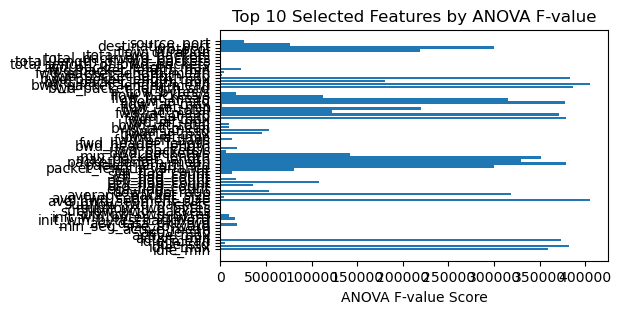

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X5 is your input features and Y is the target variable

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=10)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
xgb_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**xgb_random_search.best_params_)
best_xgb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_xgb = best_xgb_model.predict(X5_test_selected)

# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Test set accuracy_xgb:", xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 10 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Evaluating the Performance of XGBoost on Z-score Normalized and Balanced Input Feature DataFrame, X5 (SelectKBest with ANOVA F-value Scoring Function Feature Selection Method- 8)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Test set accuracy_xgb: 0.96603659956935


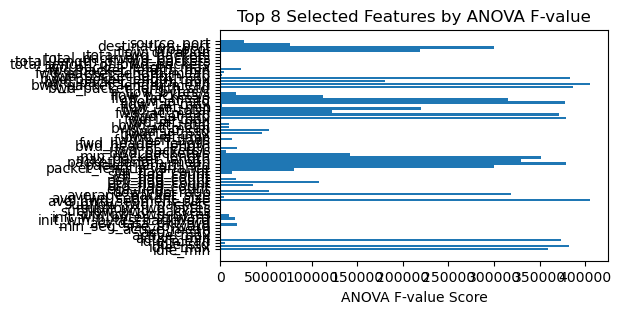

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X5 is your input features and Y is the target variable

# Identify constant features
constant_features_idx = np.where(X5_train.var() == 0)[0]

# Remove constant features
X5_train = X5_train.drop(columns=X5_train.columns[constant_features_idx])
X5_test = X5_test.drop(columns=X5_test.columns[constant_features_idx])

# Perform feature selection using SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=8)
X5_train_selected = selector.fit_transform(X5_train, Y_train)
X5_test_selected = selector.transform(X5_test)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
xgb_random_search.fit(X5_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**xgb_random_search.best_params_)
best_xgb_model.fit(X5_train_selected, Y_train)

# Make predictions on the test set
Y_pred_xgb = best_xgb_model.predict(X5_test_selected)

# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Test set accuracy_xgb:", xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selector.scores_)), selector.scores_, align='center')
plt.yticks(range(len(X5_train.columns)), X5_train.columns)
plt.xlabel('ANOVA F-value Score')
plt.title('Top 8 Selected Features by ANOVA F-value')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Performance Comparison of Random Forest with MI and SelectKBest-ANOVA Feature Selection Methods -- >> Check R Markdown Document 

# Evaluation the Performance of Classifiers with Min-Max Normalization Technique while still Balanced and with 12 Selected Features

# Min-Max Normalization Technique to Rescale and Normalize the Unbalanced Input Feature DataFrame, X3

In [47]:
X3.head()

source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0      49459.0              80.0       6.0        38308.0                1.0   
1      49453.0             389.0       6.0          479.0               11.0   
2      46124.0              88.0       6.0         1095.0               10.0   
3      49454.0             389.0       6.0        15206.0               17.0   
4      46126.0              88.0       6.0         1092.0                9.0   

   total_backward_packets  total_length_of_fwd_packets  \
0                     1.0                          6.0   
1                     5.0                        172.0   
2                     6.0                       3150.0   
3                    12.0                       3452.0   
4                     6.0                       3150.0   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                          6.0                    6.0                    6.0   
1                        326.0                   79.0                    0.0   
2                       3150.0                 1575.0                    0.0   
3                       6660.0                 1313.0                    0.0   
4                       3152.0                 1575.0                    0.0   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...               0.0                  20.0          0.0         0.0   
1  ...               4.0                  32.0          0.0         0.0   
2  ...               3.0                  32.0          0.0         0.0   
3  ...              10.0                  32.0          0.0         0.0   
4  ...               2.0                  32.0          0.0         0.0   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0         0.0         0.0        0.0       0.0       0.0       0.0  
1         0.0         0.0        0.0       0.0       0.0       0.0  
2         0.0         0.0        0.0       0.0       0.0       0.0  
3         0.0         0.0        0.0       0.0       0.0       0.0  
4         0.0         0.0        0.0       0.0       0.0       0.0  

[5 rows x 79 columns]

In [48]:
# using Min-Max normalization to rescale and normalize the unbalanced input_feature data frame X3
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# X3 is your unbalanced input feature DataFrame

# Create a MinMaxScaler object
X3_scaler2 = MinMaxScaler()

# Make a copy of the original DataFrame to preserve its integrity
X3_scaled2 = X3.copy()

# Select numerical columns of both Float64 & int64 data types
numerical_cols = X3_scaled2.select_dtypes(include=['float64', 'int64']).columns

# Apply min-max scaling to the numerical columns
X3_scaled2[numerical_cols] = X3_scaler2.fit_transform(X3_scaled2[numerical_cols])

# Display the normalized DataFrame
X3_scaled2.head()


source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0     0.754696          0.001222  0.352941       0.000319           0.000000   
1     0.754604          0.005940  0.352941       0.000004           0.000049   
2     0.703807          0.001344  0.352941       0.000009           0.000044   
3     0.754620          0.005940  0.352941       0.000127           0.000078   
4     0.703838          0.001344  0.352941       0.000009           0.000039   

   total_backward_packets  total_length_of_fwd_packets  \
0                0.000004                     0.000005   
1                0.000018                     0.000141   
2                0.000022                     0.002573   
3                0.000044                     0.002820   
4                0.000022                     0.002573   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                 9.569378e-09               0.000242               0.002906   
1                 5.199362e-07               0.003183               0.000000   
2                 5.023923e-06               0.063457               0.000000   
3                 1.062201e-05               0.052901               0.000000   
4                 5.027113e-06               0.063457               0.000000   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...          0.000000              0.344262          0.0         0.0   
1  ...          0.000020              0.540984          0.0         0.0   
2  ...          0.000015              0.540984          0.0         0.0   
3  ...          0.000051              0.540984          0.0         0.0   
4  ...          0.000010              0.540984          0.0         0.0   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0         0.0         0.0        0.0       0.0       0.0       0.0  
1         0.0         0.0        0.0       0.0       0.0       0.0  
2         0.0         0.0        0.0       0.0       0.0       0.0  
3         0.0         0.0        0.0       0.0       0.0       0.0  
4         0.0         0.0        0.0       0.0       0.0       0.0  

[5 rows x 79 columns]

## X3 --->> X6

In [50]:
# Creating a copy of X3_scaled into X4
X6 = X3_scaled2.copy()
y.head()


0    0
1    0
2    0
3    0
4    0
Name: encoded_label, dtype: int64

In [51]:
y.value_counts()

encoded_label
0    440031
1    252672
Name: count, dtype: int64

## Balancing the Unbalanced Min-Max Normalized X6 DataFrame with Bagged Undersampling Technique --->> X7

Resampled Counts of Class Distribution:
0    440031
1    440031
Name: count, dtype: int64


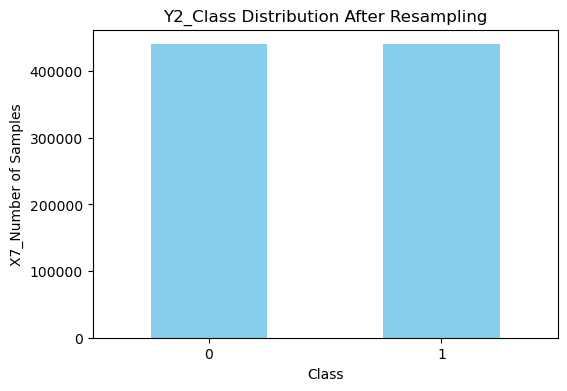

In [52]:
# Balancing the Unbalanced Min-Max Normalized X6 with Bagged Undersampling Technique

from sklearn.utils import resample, shuffle

# X6 is an already Min-Max normalized unbalanced_input feature data frame and y contains the target variable

# Separate the minority and majority classes
X6_minority = X6[y == 1]  # ATTACK class
X6_majority = X6[y == 0]  # BENIGN class

# Upsample the minority class using bagged undersampling
X6_minority_resampled = pd.concat([resample(X6_minority, replace=True, n_samples=len(X6_majority), random_state=42)])

# Concatenate the resampled minority class with the majority class
X6_resampled = pd.concat([X6_majority, X6_minority_resampled])
y2_resampled = pd.concat([pd.Series([0]*len(X6_majority)), pd.Series([1]*len(X6_minority_resampled))])

# Shuffle the data to avoid any ordering bias
X6_resampled_shuffled, y2_resampled_shuffled = shuffle(X6_resampled, y2_resampled, random_state=42)

# Now X6_resampled_shuffled and y2_resampled_shuffled contain balanced classes

# Copy the resampled data into X5 and Y
X7 = X6_resampled_shuffled.copy()
Y2 = y2_resampled_shuffled.copy()

# Print value counts of Y
print("Resampled Counts of Class Distribution:")
print(Y2.value_counts())


# Generate value counts for Y
class_counts = Y2.value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Y2_Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('X7_Number of Samples')
plt.xticks(rotation=0)
plt.show()




## Evaluating the Performance of NB on Min-Max Normalized and Balanced Input Feature DataFrame, X7 (Mutual Information-Based Feature Selection Method- 12)

In [53]:
X7.head()

source_port  destination_port  protocol  flow_duration  \
613896     0.733776          0.001222  0.352941       0.000819   
133240     0.832502          0.001222  0.352941       0.821503   
195955     0.870314          0.001222  0.352941       0.712427   
20030      0.925566          0.000809  1.000000       0.000503   
577986     0.958495          0.000809  1.000000       0.000002   

        total_fwd_packets  total_backward_packets  \
613896           0.000000                0.000004   
133240           0.000020                0.000022   
195955           0.000025                0.000022   
20030            0.000000                0.000004   
577986           0.000005                0.000007   

        total_length_of_fwd_packets  total_length_of_bwd_packets  \
613896                     0.000000                 0.000000e+00   
133240                     0.000292                 1.849282e-05   
195955                     0.000265                 1.849282e-05   
20030                      0.000052                 1.866029e-07   
577986                     0.000059                 2.169059e-07   

        fwd_packet_length_max  fwd_packet_length_min  ...  act_data_pkt_fwd  \
613896               0.000000               0.000000  ...          0.000000   
133240               0.014142               0.000000  ...          0.000005   
195955               0.013054               0.000000  ...          0.000005   
20030                0.002579               0.030993  ...          0.000000   
577986               0.001450               0.017433  ...          0.000005   

        min_seg_size_forward   active_mean  active_std    active_max  \
613896              0.540984  0.000000e+00         0.0  0.000000e+00   
133240              0.344262  0.000000e+00         0.0  0.000000e+00   
195955              0.540984  4.000000e-08         0.0  3.809524e-08   
20030               0.540984  0.000000e+00         0.0  0.000000e+00   
577986              0.344262  0.000000e+00         0.0  0.000000e+00   

          active_min  idle_mean  idle_std  idle_max  idle_min  
613896  0.000000e+00   0.000000       0.0  0.000000  0.000000  
133240  0.000000e+00   0.811667       0.0  0.811667  0.811667  
195955  4.000000e-08   0.710833       0.0  0.710833  0.710833  
20030   0.000000e+00   0.000000       0.0  0.000000  0.000000  
577986  0.000000e+00   0.000000       0.0  0.000000  0.000000  

[5 rows x 79 columns]

Selected Features:
Index(['init_win_bytes_forward', 'packet_length_mean', 'average_packet_size',
       'destination_port', 'bwd_packet_length_mean', 'max_packet_length',
       'avg_bwd_segment_size', 'total_length_of_bwd_packets',
       'subflow_bwd_bytes', 'bwd_packet_length_max', 'flow_iat_max',
       'packet_length_std'],
      dtype='object')


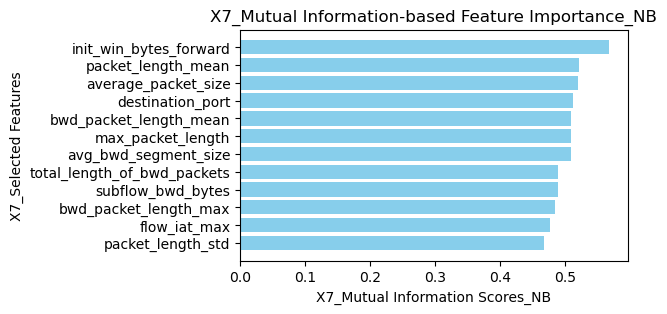

Cross-validation scores: [0.94652368 0.94646687 0.94552944 0.94523116 0.94569988 0.94707762
 0.94571408 0.94615439 0.94558625 0.94505994]
Mean cross-validation score: 0.9459043321638232
X7nb_Test set accuracy: 0.9462426070801588


In [54]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X7 is an already Min-Max normalized and Bagged-Undersampling Balanced_input feature data frame, while Y2 contains the balanced class target variable

# Split the data into train and test sets
X7_train, X7_test, Y2_train, Y2_test = train_test_split(X7, Y2, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X7_train, Y2_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X7_train_selected = X7_train.iloc[:, selected_feature_indices]
X7_test_selected = X7_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X7_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X7_Mutual Information Scores_NB')
plt.ylabel('X7_Selected Features')
plt.title('X7_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Initialize Naive Bayes model
X7nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X7nb_model, X7_train_selected, Y2_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train Naive Bayes model on the entire training set
X7nb_model.fit(X7_train_selected, Y2_train)

# Make predictions on the test set
X7nb_Y2_pred = X7nb_model.predict(X7_test_selected)

# Calculate accuracy
X7nb_accuracy = accuracy_score(Y2_test, X7nb_Y2_pred)
print("X7nb_Test set accuracy:", X7nb_accuracy)


## Evaluating the Performance of XGBoost on Min-Max Normalized and Balanced Input Feature DataFrame, X7 (Mutual Information-Based Feature Selection Method- 12)

X7_xgb_Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
X7_Test set accuracy_xgb: 0.9989830296625818


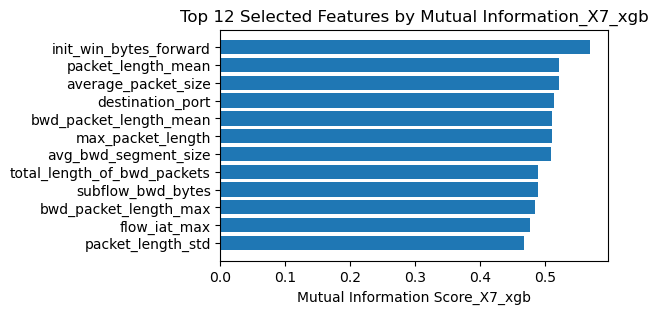

In [60]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X7_train, X7_test, Y2_train, Y2_test = train_test_split(X7, Y2, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X7_train, Y2_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X7_xgb_train_selected = X7_train.iloc[:, selected_feature_indices]
X7_xgb_test_selected = X7_test.iloc[:, selected_feature_indices]

# Initialize XGBoost model
X7xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X7xgb_random_search = RandomizedSearchCV(estimator=X7xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X7xgb_random_search.fit(X7_xgb_train_selected, Y2_train)

# Print the best hyperparameters
print("X7_xgb_Best hyperparameters:", X7xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
X7best_xgb_model = XGBClassifier(**X7xgb_random_search.best_params_)
X7best_xgb_model.fit(X7_xgb_train_selected, Y2_train)

# Make predictions on the test set
X7_Y2_pred_xgb = X7best_xgb_model.predict(X7_xgb_test_selected)

# Calculate accuracy
X7xgb_accuracy = accuracy_score(Y2_test, X7_Y2_pred_xgb)
print("X7_Test set accuracy_xgb:", X7xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X7_xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X7_xgb')
plt.title('Top 12 Selected Features by Mutual Information_X7_xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()



## Evaluating the Performance of RF on Min-Max Normalized and Balanced Input Feature DataFrame, X7 (Mutual Information-Based Feature Selection Method- 12)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
X7_Test set accuracy_rf: 0.9997102486748138


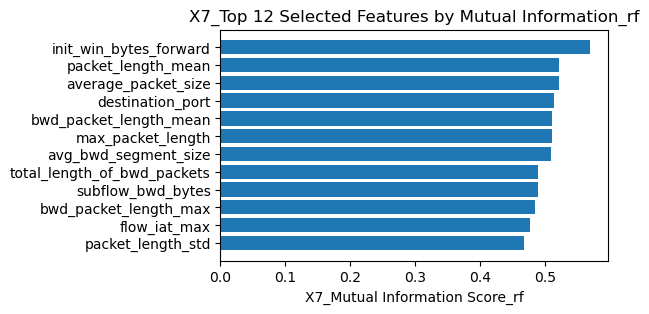

In [61]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X7_train, X7_test, Y2_train, Y2_test = train_test_split(X7, Y2, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X7_train, Y2_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X7rf_train_selected = X7_train.iloc[:, selected_feature_indices]
X7rf_test_selected = X7_test.iloc[:, selected_feature_indices]

# Initialize Random Forest model
X7rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X7rf_random_search = RandomizedSearchCV(estimator=X7rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X7rf_random_search.fit(X7rf_train_selected, Y2_train)

# Print the best hyperparameters
print("Best hyperparameters:", X7rf_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
X7best_rf_model = RandomForestClassifier(**X7rf_random_search.best_params_)
X7best_rf_model.fit(X7rf_train_selected, Y2_train)

# Make predictions on the test set
X7Y_pred_rf = X7best_rf_model.predict(X7rf_test_selected)

# Calculate accuracy
X7rf_accuracy = accuracy_score(Y2_test, X7Y_pred_rf)
print("X7_Test set accuracy_rf:", X7rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X7rf_train_selected.columns)
plt.xlabel('X7_Mutual Information Score_rf')
plt.title('X7_Top 12 Selected Features by Mutual Information_rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()


## Classifier Performance Evaluation with Un-Normalized Balanced Dataset with Bagged Undersampling Technique

In [62]:
# X3 is an un-normalized, unbalanced dataset
X3.head()

source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0      49459.0              80.0       6.0        38308.0                1.0   
1      49453.0             389.0       6.0          479.0               11.0   
2      46124.0              88.0       6.0         1095.0               10.0   
3      49454.0             389.0       6.0        15206.0               17.0   
4      46126.0              88.0       6.0         1092.0                9.0   

   total_backward_packets  total_length_of_fwd_packets  \
0                     1.0                          6.0   
1                     5.0                        172.0   
2                     6.0                       3150.0   
3                    12.0                       3452.0   
4                     6.0                       3150.0   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                          6.0                    6.0                    6.0   
1                        326.0                   79.0                    0.0   
2                       3150.0                 1575.0                    0.0   
3                       6660.0                 1313.0                    0.0   
4                       3152.0                 1575.0                    0.0   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...               0.0                  20.0          0.0         0.0   
1  ...               4.0                  32.0          0.0         0.0   
2  ...               3.0                  32.0          0.0         0.0   
3  ...              10.0                  32.0          0.0         0.0   
4  ...               2.0                  32.0          0.0         0.0   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0         0.0         0.0        0.0       0.0       0.0       0.0  
1         0.0         0.0        0.0       0.0       0.0       0.0  
2         0.0         0.0        0.0       0.0       0.0       0.0  
3         0.0         0.0        0.0       0.0       0.0       0.0  
4         0.0         0.0        0.0       0.0       0.0       0.0  

[5 rows x 79 columns]

In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: encoded_label, dtype: int64

## Balancing the Un-Normalized Dataset, X3 using Bagged Undersampling Technique


Resampled Counts of Class Distribution:
0    440031
1    440031
Name: count, dtype: int64


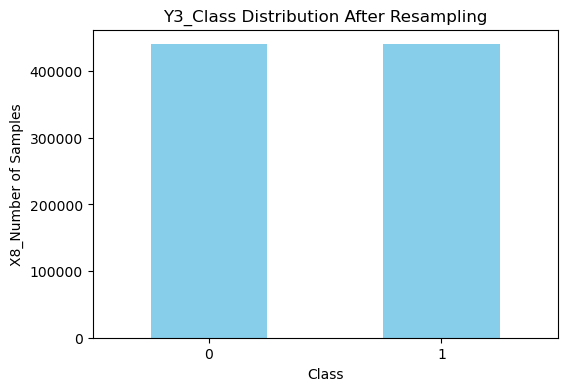

In [68]:
# Handling High Dimensional Class Imbalance Issue with Bagged Undersampling Technique

from sklearn.utils import resample, shuffle

# X3 is an un-normalized unbalanced_input feature data frame and y contains the target variable

# Separate the minority and majority classes
X3_minority = X3[y == 1]  # ATTACK class
X3_majority = X3[y == 0]  # BENIGN class

# Upsample the minority class using bagged undersampling
X3_minority_resampled = pd.concat([resample(X3_minority, replace=True, n_samples=len(X3_majority), random_state=42)])

# Concatenate the resampled minority class with the majority class
X3_resampled = pd.concat([X3_majority, X3_minority_resampled])
y_resampled = pd.concat([pd.Series([0]*len(X3_majority)), pd.Series([1]*len(X3_minority_resampled))])

# Shuffle the data to avoid any ordering bias
X3_resampled_shuffled, y_resampled_shuffled = shuffle(X3_resampled, y_resampled, random_state=42)

# Now X3_resampled_shuffled and y_resampled_shuffled contain balanced classes

# Copy the resampled data into X5 and Y
X8 = X3_resampled_shuffled.copy()
Y3 = y_resampled_shuffled.copy()

# Print value counts of Y3
print("Resampled Counts of Class Distribution:")
print(Y3.value_counts())


# Generate value counts for Y
class_counts = Y3.value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Y3_Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('X8_Number of Samples')
plt.xticks(rotation=0)
plt.show()




In [69]:
X8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880062 entries, 613896 to 365444
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_port                  880062 non-null  float64
 1   destination_port             880062 non-null  float64
 2   protocol                     880062 non-null  float64
 3   flow_duration                880062 non-null  float64
 4   total_fwd_packets            880062 non-null  float64
 5   total_backward_packets       880062 non-null  float64
 6   total_length_of_fwd_packets  880062 non-null  float64
 7   total_length_of_bwd_packets  880062 non-null  float64
 8   fwd_packet_length_max        880062 non-null  float64
 9   fwd_packet_length_min        880062 non-null  float64
 10  fwd_packet_length_mean       880062 non-null  float64
 11  fwd_packet_length_std        880062 non-null  float64
 12  bwd_packet_length_max        880062 non-null  float64
 13 

## Evaluating Classifier Performance on Un-Normalized Balanced Dataset, X8 with NB

Selected Features:
Index(['init_win_bytes_forward', 'packet_length_mean', 'average_packet_size',
       'destination_port', 'bwd_packet_length_mean', 'max_packet_length',
       'avg_bwd_segment_size', 'total_length_of_bwd_packets',
       'subflow_bwd_bytes', 'bwd_packet_length_max', 'flow_iat_max',
       'packet_length_std'],
      dtype='object')


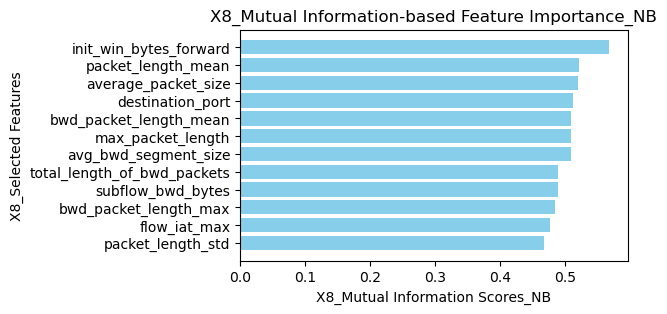

X8nb_Test set accuracy: 0.603466789384875
Cross-validation scores: [0.60355088 0.60539734 0.60218734 0.60340885 0.60312478 0.60399119
 0.6031958  0.60541155 0.60369292 0.60603091]
Mean cross-validation score: 0.6039991563538205
Training Time: 4.0334792137146 seconds
Testing Time: 0.050762176513671875 seconds


In [79]:
# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X8 is an Un-Normalized Bagged-Undersampling Balanced_input feature data frame, while Y3 contains the balanced class target variable

# Split the data into train and test sets
X8_train, X8_test, Y3_train, Y3_test = train_test_split(X8, Y3, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X8_train, Y3_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X8_train_selected = X8_train.iloc[:, selected_feature_indices]
X8_test_selected = X8_test.iloc[:, selected_feature_indices]

# Print the names of the selected features
selected_features = X8_train.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

# Visualize the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(selected_features, mi_scores[selected_feature_indices], color='skyblue')
plt.xlabel('X8_Mutual Information Scores_NB')
plt.ylabel('X8_Selected Features')
plt.title('X8_Mutual Information-based Feature Importance_NB')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X8nb_model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(X8nb_model, X8_train_selected, Y3_train, cv=10)

# Train Naive Bayes model on the entire training set
X8nb_model.fit(X8_train_selected, Y3_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()


# Make predictions on the test set
X8nb_Y3_pred = X8nb_model.predict(X8_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Calculate accuracy
X8nb_accuracy = accuracy_score(Y3_test, X8nb_Y3_pred)
print("X8nb_Test set accuracy:", X8nb_accuracy)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")






## Evaluating Classifier Performance on Un-Normalized Balanced Dataset, X8 with XGBoost

X8_xgb_Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
X8_Test set accuracy_xgb: 0.9989830296625818


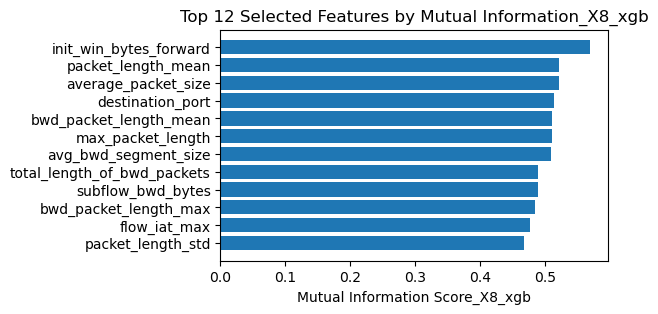

Training Time: 136.16775465011597 seconds
Testing Time: 0.17876338958740234 seconds


In [77]:
# Implementing Mutual Information-based feature selection method for XGBoost classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X8_train, X8_test, Y3_train, Y3_test = train_test_split(X8, Y3, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X8_train, Y3_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X8_xgb_train_selected = X8_train.iloc[:, selected_feature_indices]
X8_xgb_test_selected = X8_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize XGBoost model
X8xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X8xgb_random_search = RandomizedSearchCV(estimator=X8xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X8xgb_random_search.fit(X8_xgb_train_selected, Y3_train)

# Print the best hyperparameters
print("X8_xgb_Best hyperparameters:", X8xgb_random_search.best_params_)

# Train XGBoost model with the best hyperparameters
X8best_xgb_model = XGBClassifier(**X8xgb_random_search.best_params_)
X8best_xgb_model.fit(X8_xgb_train_selected, Y3_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make predictions on the test set
X8_Y3_pred_xgb = X8best_xgb_model.predict(X8_xgb_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Calculate accuracy
X8xgb_accuracy = accuracy_score(Y3_test, X8_Y3_pred_xgb)
print("X8_Test set accuracy_xgb:", X8xgb_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X8_xgb_train_selected.columns)
plt.xlabel('Mutual Information Score_X8_xgb')
plt.title('Top 12 Selected Features by Mutual Information_X8_xgb')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



## Evaluating Classifier Performance on Un-Normalized Balanced Dataset, X8 with RF

X8_Test set accuracy_rf: 0.9996988858777477


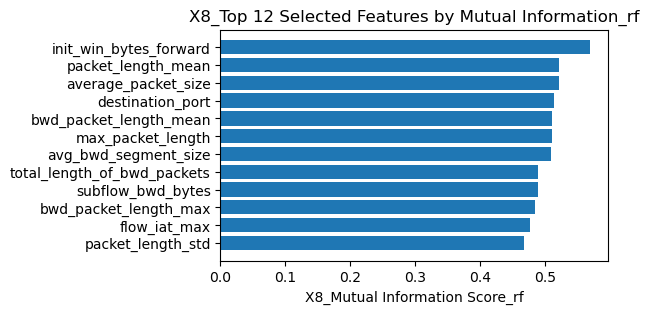

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Training Time: 3753.6113727092743 seconds
Testing Time: 2.073301315307617 seconds


In [81]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X8_train, X8_test, Y3_train, Y3_test = train_test_split(X8, Y3, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X8_train, Y3_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X8rf_train_selected = X8_train.iloc[:, selected_feature_indices]
X8rf_test_selected = X8_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X8rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X8rf_random_search = RandomizedSearchCV(estimator=X8rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X8rf_random_search.fit(X8rf_train_selected, Y3_train)


# Train Random Forest model with the best hyperparameters
X8best_rf_model = RandomForestClassifier(**X8rf_random_search.best_params_)
X8best_rf_model.fit(X8rf_train_selected, Y3_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make predictions on the test set
X8Y_pred_rf = X8best_rf_model.predict(X8rf_test_selected)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst


# Calculate accuracy
X8rf_accuracy = accuracy_score(Y3_test, X8Y_pred_rf)
print("X8_Test set accuracy_rf:", X8rf_accuracy)

# Plot the feature importance scores
plt.figure(figsize=(5, 3))
plt.barh(range(len(selected_feature_indices)), mi_scores[selected_feature_indices], align='center')
plt.yticks(range(len(selected_feature_indices)), X8rf_train_selected.columns)
plt.xlabel('X8_Mutual Information Score_rf')
plt.title('X8_Top 12 Selected Features by Mutual Information_rf')
plt.gca().invert_yaxis()  # Invert y-axis to show the most significant features at the top
plt.show()

# Print the best hyperparameters
print("Best hyperparameters:", X8rf_random_search.best_params_)

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



## Performance Comparison of Classifiers with Z-Score and Mini-Max Normalized Balanced Dataset (X5 and X7), and Un-Normalized Balanced Dataset, X8

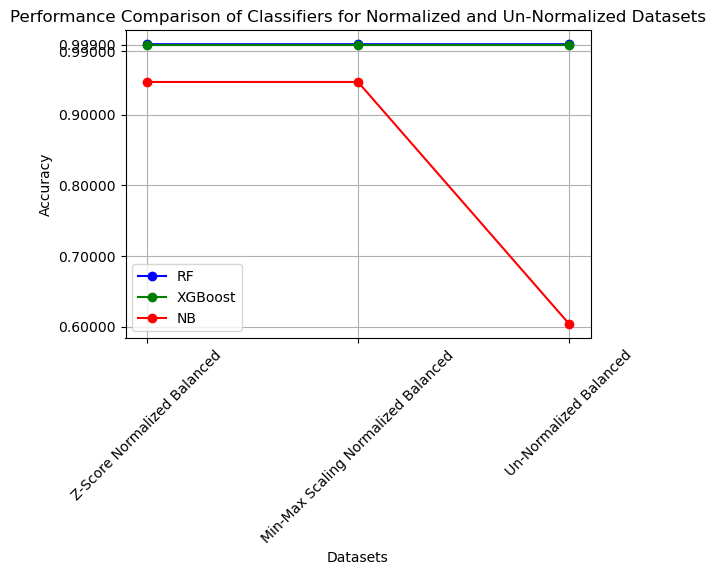

In [88]:
import matplotlib.pyplot as plt

# Performance accuracy values for RF, XGBoost, and NB for different datasets
accuracy_rf = [0.99972, 0.99971, 0.99968]
accuracy_xgboost = [0.99898, 0.99898, 0.99898]
accuracy_nb = [0.94623, 0.94624, 0.60347]

# Datasets
datasets = ['Z-Score Normalized Balanced', 'Min-Max Scaling Normalized Balanced', 'Un-Normalized Balanced']

# Determine y-axis tick positions
y_ticks = [0.6, 0.7, 0.8, 0.9, 0.99, 0.999]

# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(datasets, accuracy_rf, marker='o', label='RF', color='blue')
plt.plot(datasets, accuracy_xgboost, marker='o', label='XGBoost', color='green')
plt.plot(datasets, accuracy_nb, marker='o', label='NB', color='red')
plt.title('Performance Comparison of Classifiers for Normalized and Un-Normalized Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.yticks(y_ticks)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.5f'))  # Format y-axis labels with five decimal points
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Training and Testing Times Comparison for Normalized and Un-Normalized Balanced Dataset, X5 and X8

## Training Times Comparison for Normalized and Un-Normalized Balanced Dataset, X5 and X8

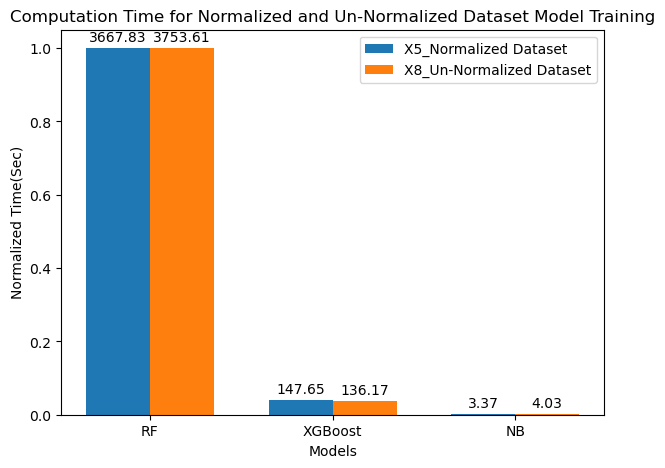

In [96]:

import numpy as np
import matplotlib.pyplot as plt

# Training times for X5 and X8 datasets (in seconds)
X5_training_times = {'RF': 3667.828, 'XGBoost': 147.653, 'NB': 3.365}
X8_training_times = {'RF': 3753.611, 'XGBoost': 136.168, 'NB': 4.034}

# Normalizing training times for compact representation
X5_max_time = max(X5_training_times.values())
X5_normalized_times = {model: time / X5_max_time for model, time in X5_training_times.items()}
X8_max_time = max(X8_training_times.values())
X8_normalized_times = {model: time / X8_max_time for model, time in X8_training_times.items()}

# Plotting the composite bar plot
models = list(X5_normalized_times.keys())
X5_times = list(X5_normalized_times.values())
X8_times = list(X8_normalized_times.values())

fig, ax = plt.subplots(figsize=(7, 5))
bar_width = 0.35
index = np.arange(len(models))

X5_bars = ax.bar(index, X5_times, bar_width, label='X5_Normalized Dataset')
X8_bars = ax.bar(index + bar_width, X8_times, bar_width, label='X8_Un-Normalized Dataset')

# Adding original un-normalized training times on top of bars
for i, rect in enumerate(X5_bars):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.01,
            f'{X5_training_times[models[i]]:.2f}', ha='center', va='bottom')

for i, rect in enumerate(X8_bars):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.01,
            f'{X8_training_times[models[i]]:.2f}', ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Normalized Time(Sec)')
ax.set_title('Computation Time for Normalized and Un-Normalized Dataset Model Training')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()




## Testing Times Comparison for Normalized and Un-Normalized Balanced Dataset, X5 and X8

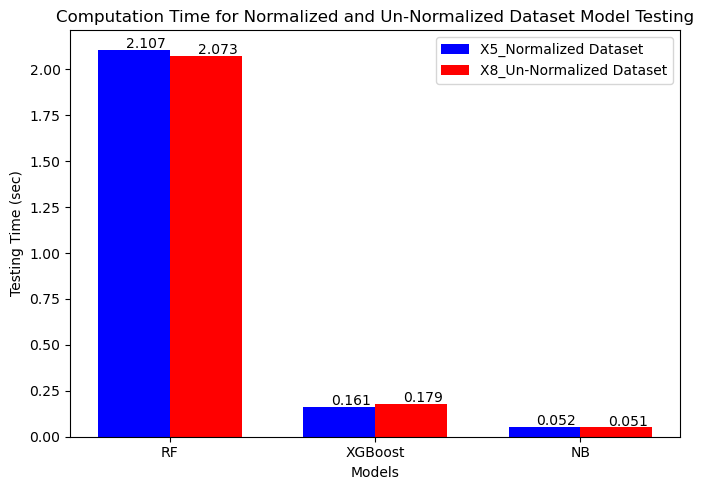

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['RF', 'XGBoost', 'NB']
X5_testing_times = [2.107, 0.161, 0.052]
X8_testing_times = [2.073, 0.179, 0.051]

# Plotting
plt.figure(figsize=(7, 5))
bar_width = 0.35
index = np.arange(len(models))

# Bar for X5 Dataset
plt.bar(index, X5_testing_times, bar_width, label='X5_Normalized Dataset', color='b')

# Bar for X8 Dataset
plt.bar(index + bar_width, X8_testing_times, bar_width, label='X8_Un-Normalized Dataset', color='r')

# Add data labels
for i in range(len(models)):
    plt.text(index[i] - 0.04, X5_testing_times[i] + 0.01, str(X5_testing_times[i]), fontsize=10, color='black')
    plt.text(index[i] + bar_width - 0.04, X8_testing_times[i] + 0.01, str(X8_testing_times[i]), fontsize=10, color='black')

# Customize plot
plt.xlabel('Models')
plt.ylabel('Testing Time (sec)')
plt.title('Computation Time for Normalized and Un-Normalized Dataset Model Testing')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


## Feature Correlation Matrix Heat Map for Normalized_Balanced X5 Feature Dataframe of the CICIDS2017 Dataset

In [98]:
X5.head()

source_port  destination_port  protocol  flow_duration  \
613896     0.281741         -0.356503 -0.642646      -0.652457   
133240     0.612930         -0.356503 -0.642646       1.650316   
195955     0.739775         -0.356503 -0.642646       1.344258   
20030      0.925128         -0.358220  1.553054      -0.653341   
577986     1.035592         -0.358220  1.553054      -0.654749   

        total_fwd_packets  total_backward_packets  \
613896          -0.011451               -0.009362   
133240          -0.006098               -0.004282   
195955          -0.004759               -0.004282   
20030           -0.011451               -0.009362   
577986          -0.010113               -0.008346   

        total_length_of_fwd_packets  total_length_of_bwd_packets  \
613896                    -0.090059                    -0.007584   
133240                    -0.032139                    -0.002410   
195955                    -0.037493                    -0.002410   
20030                     -0.079676                    -0.007532   
577986                    -0.078378                    -0.007523   

        fwd_packet_length_max  fwd_packet_length_min  ...  act_data_pkt_fwd  \
613896              -0.386904              -0.294156  ...         -0.008559   
133240               0.194461              -0.294156  ...         -0.007161   
195955               0.149741              -0.294156  ...         -0.007161   
20030               -0.280900               0.959056  ...         -0.008559   
577986              -0.327277               0.410776  ...         -0.007161   

        min_seg_size_forward  active_mean  active_std  active_max  active_min  \
613896              0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
133240             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   
195955              0.828623    -0.131640   -0.100396   -0.148666   -0.104359   
20030               0.828623    -0.131646   -0.100396   -0.148670   -0.104366   
577986             -1.069401    -0.131646   -0.100396   -0.148670   -0.104366   

        idle_mean  idle_std  idle_max  idle_min  
613896  -0.579980 -0.105686 -0.585240 -0.570780  
133240   1.974833 -0.105686  1.945754  1.987180  
195955   1.657449 -0.105686  1.631329  1.669404  
20030   -0.579980 -0.105686 -0.585240 -0.570780  
577986  -0.579980 -0.105686 -0.585240 -0.570780  

[5 rows x 79 columns]

In [99]:
Y.head(10)

365286    0
339326    1
424747    1
20029     0
331248    0
327679    1
218334    0
233716    1
71552     0
135749    1
dtype: int64

In [101]:
X5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880062 entries, 613896 to 365444
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_port                  880062 non-null  float64
 1   destination_port             880062 non-null  float64
 2   protocol                     880062 non-null  float64
 3   flow_duration                880062 non-null  float64
 4   total_fwd_packets            880062 non-null  float64
 5   total_backward_packets       880062 non-null  float64
 6   total_length_of_fwd_packets  880062 non-null  float64
 7   total_length_of_bwd_packets  880062 non-null  float64
 8   fwd_packet_length_max        880062 non-null  float64
 9   fwd_packet_length_min        880062 non-null  float64
 10  fwd_packet_length_mean       880062 non-null  float64
 11  fwd_packet_length_std        880062 non-null  float64
 12  bwd_packet_length_max        880062 non-null  float64
 13 

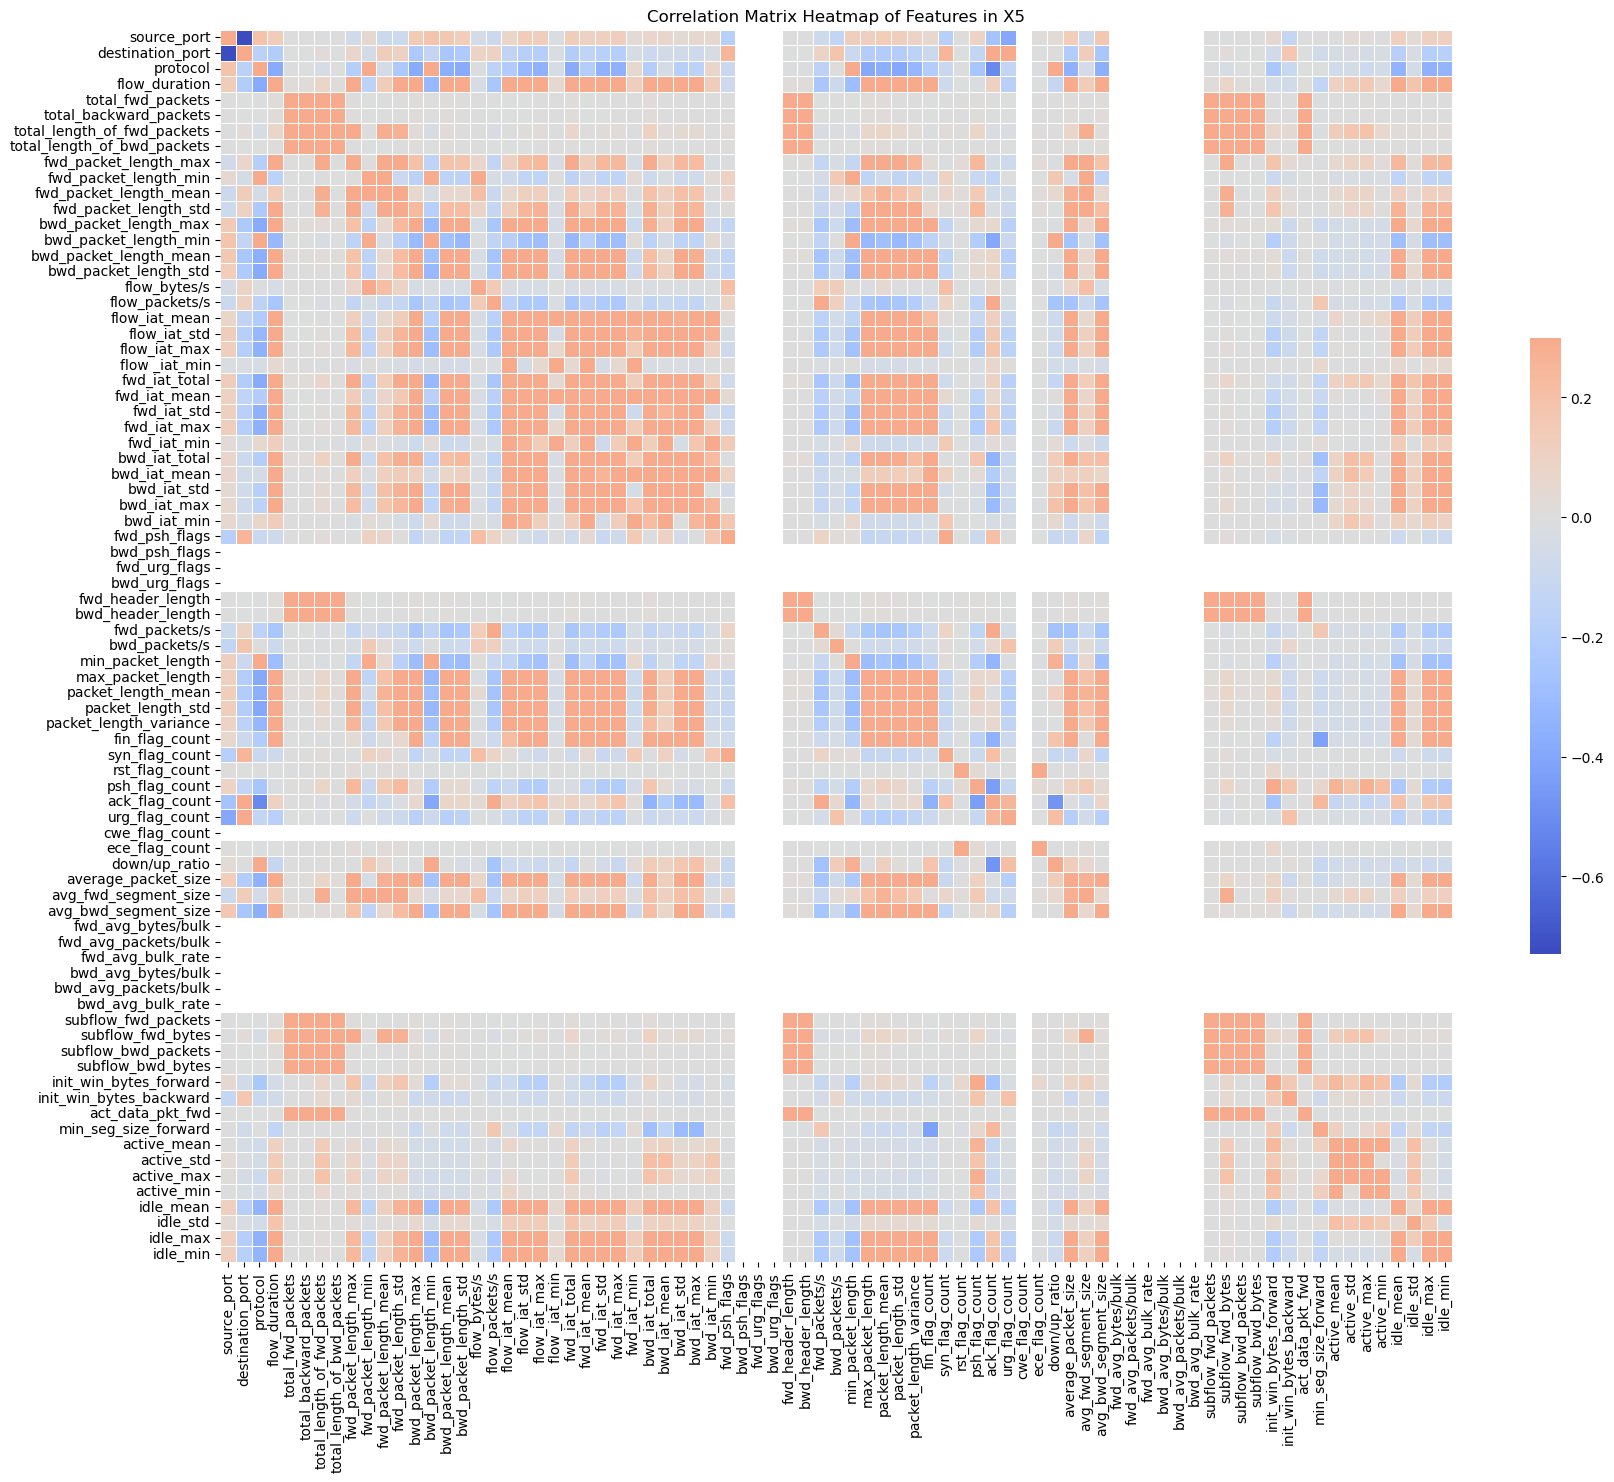

In [108]:


# Compute the correlation matrix
corr_matrix = X5.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Correlation Matrix Heatmap of Features in X5')
plt.show()


## Performance Comparison of Base Models with Full 79 Features of the Normalized_Balanced DataFrame, X5 

## NB Base Model with Full 79 Features of the Normalized_Balanced Dataframe, X5

In [110]:
#  Import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Split the dataset into features (X5) and the target variable (Y) into training and testing sets

X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Step 5: Train the Naive Bayes classifier using the full feature set
X5nb_classifier = GaussianNB()
X5nb_classifier.fit(X5_train, Y_train)

# Evaluate the model's performance
Ynb_pred = X5nb_classifier.predict(X5_test)
accuracy = accuracy_score(Y_test, Ynb_pred)
print("Accuracy:", accuracy)

# perform any additional analysis or visualization
print("\nClassification Report:")
print(classification_report(Y_test, Ynb_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Ynb_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9579235624641361

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     87997
           1       0.93      0.99      0.96     88016

    accuracy                           0.96    176013
   macro avg       0.96      0.96      0.96    176013
weighted avg       0.96      0.96      0.96    176013

Confusion Matrix:
[[81692  6305]
 [ 1101 86915]]


## XGBoost Base Model with Full 79 Features of the Normalized_Balanced Dataframe, X5

In [111]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into features (X5) and the target variable (Y) into training and testing sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X5_train, Y_train)

# Evaluate the model's performance
Yxgb_pred = xgb_classifier.predict(X5_test)
accuracy = accuracy_score(Y_test, Yxgb_pred)
print("Accuracy:", accuracy)

# Perform additional analysis
print("\nClassification Report:")
print(classification_report(Y_test, Yxgb_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Yxgb_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9998863720293387

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87997
           1       1.00      1.00      1.00     88016

    accuracy                           1.00    176013
   macro avg       1.00      1.00      1.00    176013
weighted avg       1.00      1.00      1.00    176013


Confusion Matrix:
[[87982    15]
 [    5 88011]]


## RF Base Model with Full 79 Features of the Normalized_Balanced Dataframe, X5

In [112]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Split the dataset into features (X5) and the target variable (Y) into training and testing sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest classifier using the full feature set
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X5_train, Y_train)

# Evaluate the model's performance
Yrf_pred = rf_classifier.predict(X5_test)
accuracy = accuracy_score(Y_test, Yrf_pred)
print("Accuracy:", accuracy)

# Perform any additional analysis or visualization
print("\nClassification Report:")
print(classification_report(Y_test, Yrf_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Yrf_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9997045672762808

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87997
           1       1.00      1.00      1.00     88016

    accuracy                           1.00    176013
   macro avg       1.00      1.00      1.00    176013
weighted avg       1.00      1.00      1.00    176013

Confusion Matrix:
[[87955    42]
 [   10 88006]]


## Performance Comparision of Base Models on Range of Number of Features, Full and others smaller than 16

C:\Users\USER\AppData\Local\Temp\ipykernel_19128\452669228.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.5f}'.format(x) for x in plt.gca().get_yticks()])


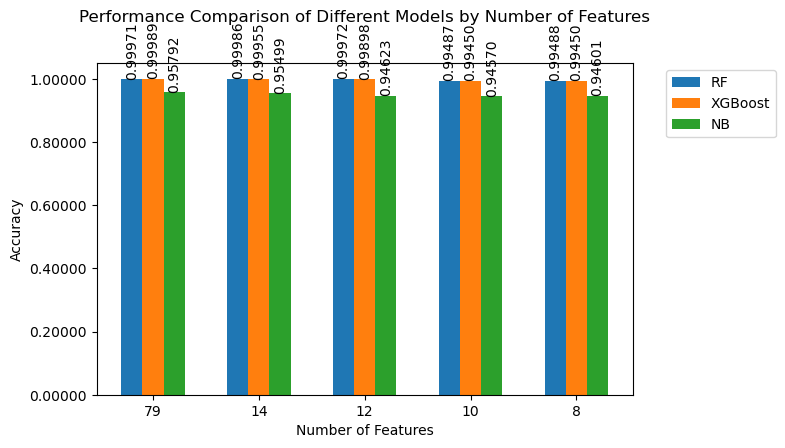

In [122]:
import matplotlib.pyplot as plt

# Data
num_features = [79, 14, 12, 10, 8]

rf_accuracy = [0.99971, 0.99986, 0.99972, 0.99487, 0.99488]
xgboost_accuracy = [0.99989, 0.99955, 0.99898, 0.9945, 0.9945]
nb_accuracy = [0.95792, 0.95499, 0.94623, 0.9457, 0.94601]

# Plotting
plt.figure(figsize=(8, 5))

bar_width = 0.2
index = [i for i in range(len(num_features))]

plt.bar([i - bar_width for i in index], rf_accuracy, width=bar_width, label='RF')
plt.bar(index, xgboost_accuracy, width=bar_width, label='XGBoost')
plt.bar([i + bar_width for i in index], nb_accuracy, width=bar_width, label='NB')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Different Models by Number of Features', loc='center', pad=30)
plt.xticks(index, num_features)

# Add accuracy values on bars
for i, acc in enumerate(rf_accuracy):
    plt.text(i - bar_width, acc, f'{acc:.5f}', ha='center', va='bottom', rotation=90)
for i, acc in enumerate(xgboost_accuracy):
    plt.text(i, acc, f'{acc:.5f}', ha='center', va='bottom', rotation=90)
for i, acc in enumerate(nb_accuracy):
    plt.text(i + bar_width, acc, f'{acc:.5f}', ha='center', va='bottom', rotation=90)

plt.gca().set_yticklabels(['{:.5f}'.format(x) for x in plt.gca().get_yticks()])

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()


# Ensemble Modelling with the Best Performed Classifiers at 12 Number of Selected Features from X5 as Base Models and Meta-Classifiers using Stacked Generalization Technique (Balanced)

# Ensemble Model of NB + RF using NB as the Base Classifier while RF is the Meta-Classifier- X5 DataFrame (Balanced)

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
import numpy as np
import time

# X5 is a Z-Score Normalized, Bagged Undersampling Technique Balanced Input Feature Dataframe

# Start the training timer
start_trt = time.time()

# Step 1: Train the Naive Bayes (NB) model on the selected features

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Step 2: Use the predictions from the NB model as additional features for training the Random Forest (RF) meta-model
X5nb_predictions = X5nb_model.predict(X5_train_selected)
X5_rf_input = np.column_stack((X5_train_selected, X5nb_predictions))

# Split the data for meta-model training
X_rf_train, X_rf_test, Y_rf_train, Y_rf_test = train_test_split(X5_rf_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize the Random Forest (RF) meta-model
rfnb_meta_model = RandomForestClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation
rfnb_random_search = RandomizedSearchCV(estimator=rfnb_meta_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization
rfnb_random_search.fit(X_rf_train, Y_rf_train)

# Use the best model from RandomizedSearchCV
best_rfnb_meta_model = rfnb_random_search.best_estimator_

# Train the Random Forest (RF) meta-model with the best hyperparameters
best_rfnb_meta_model.fit(X_rf_train, Y_rf_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the stacked model
Y_rfnb_pred = best_rfnb_meta_model.predict(X_rf_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_rf_test, Y_rfnb_pred))
print("\nClassification Report:")
print(classification_report(Y_rf_test, Y_rfnb_pred))

# Print the best hyperparameters
print("Best Hyperparameters:")
print(rfnb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction
accuracy = accuracy_score(Y_rf_test, Y_rfnb_pred)

# Print accuracy
print("Accuracy:", accuracy)


Confusion Matrix:
[[105617     60]
 [    13 105525]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

Training Time: 1955.549416065216 seconds
Testing Time: 4.46535325050354 seconds
Accuracy: 0.9996543806074379


## Ensemble Model of NB + XGBoost using NB as the Base Classifier while XGBoost is the Meta-Classifier- X5 DataFrame

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from scipy.stats import randint
import numpy as np
import time

# Start the training timer
start_trt = time.time()

# Step 1: Train the Naive Bayes (NB) model on the selected features

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

# Step 2: Use the predictions from the NB model as additional features for training the XGBoost (meta-model)
X5nb_predictions = X5nb_model.predict(X5_train_selected)
X5_xgb_input = np.column_stack((X5_train_selected, X5nb_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize the XGBoost (meta-model)
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost (meta-model) with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the stacked model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report:")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters
print("Best Hyperparameters:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction
accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)

# Print accuracy
print("Accuracy:", accuracy)


Confusion Matrix:
[[105473    204]
 [    75 105463]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Training Time: 107.56728386878967 seconds
Testing Time: 0.18105435371398926 seconds
Accuracy: 0.9986790710887011


## Ensemble Model of RF + XGBoost using RF as the Base Classifier while XGBoost is the Meta-Classifier- X5 DataFrame

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X5rf_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf_test_selected = X5_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()

start_trt3 = time.time()
# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train) # Train the Random Forest (RF) model on the selected features
# End the training timer
end_trt3 = time.time()

# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5rf_predictions = X5best_rf_model.predict(X5rf_train_selected)
X5_xgb_input = np.column_stack((X5rf_train_selected, X5rf_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb_input, Y_train, test_size=0.3, random_state=42)


# Start the training timer
start_trt2 = time.time()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt2 = time.time()

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

trt2 = end_trt2 - start_trt2

trt3 = end_trt3 - start_trt3

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst


# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training time2
print("Training Tim2:", trt2, "seconds")
print("Training Time3:", trt3, "seconds")

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)


Confusion Matrix (XGBoost Meta-Model):
[[105657     20]
 [     2 105536]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Tim2: 96.959401845932 seconds
Training Time3: 3817.5005235671997 seconds
Training Time: 3922.8063061237335 seconds
Testing Time: 0.2008051872253418 seconds
Accuracy (XGBoost Meta-Model): 0.9998958407310087


## Ensemble Model of XGBoost + RF using XGBoost as the Base Classifier while RF is the Meta-Classifier- X5 DataFrame

In [137]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import time

# X5 is a Z-Score Normalized, Bagged Undersampling Technique Balanced Input Feature Dataframe
# Assuming X5_xgb_train_selected and Y_train are already defined

# Start the training timer
start_trt = time.time()

# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

#Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Use XGBoost predictions as additional features for training RandomForest meta-model
X5xgb_predictions = X5best_xgb_model.predict(X5_xgb_train_selected)
X5_rf_input = np.column_stack((X5_xgb_train_selected, X5xgb_predictions))

# Split the data for RF meta-model training
X_rf_train, X_rf_test, Y_rf_train, Y_rf_test = train_test_split(X5_rf_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for RandomForest Model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomForest meta-model
rf_meta_model = RandomForestClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for RandomForest
rf_random_search = RandomizedSearchCV(estimator=rf_meta_model, param_distributions=param_grid_rf, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for RF
rf_random_search.fit(X_rf_train, Y_rf_train)

# Use the best model from RandomizedSearchCV for RF
best_rf_meta_model = rf_random_search.best_estimator_

# Train the rf meta-model with the best hyperparameters
best_rf_meta_model.fit(X_rf_train, Y_rf_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the rf meta-model
Y_rf_pred = best_rf_meta_model.predict(X_rf_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst


# Print confusion matrix and classification report for RandomForest meta-model
print("Confusion Matrix (RandomForest Meta-Model):")
print(confusion_matrix(Y_rf_test, Y_rf_pred))
print("\nClassification Report (RandomForest Meta-Model):")
print(classification_report(Y_rf_test, Y_rf_pred))

# Print the best hyperparameters for XGBoost 
print("Best Hyperparameters for XGBoost Base Model:")
print(X5xgb_random_search.best_params_)
print()
# Print the best hyperparameters for RandomForest meta-model
print("Best Hyperparameters for RandomForest Meta-Model:")
print(rf_random_search.best_params_)
print()

# Print the training and testing times
# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final predictions for RandomForest meta-model
rf_accuracy = accuracy_score(Y_rf_test, Y_rf_pred)
print("Accuracy (RandomForest Meta-Model):", rf_accuracy)


Confusion Matrix (RandomForest Meta-Model):
[[105616     61]
 [    15 105523]]

Classification Report (RandomForest Meta-Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters for XGBoost Base Model:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Best Hyperparameters for RandomForest Meta-Model:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

Training Time: 2358.083920240402 seconds
Testing Time: 5.008832931518555 seconds
Accuracy (RandomForest Meta-Model): 0.9996401770707573


## Ensemble Model of NB + RF as the Base Classifiers while XGBoost is the Meta-Classifier- X5 DataFrame (Balanced)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import time



# X5 is an already Z-score normalized and Bagged-Undersampling Balanced_input feature data frame, while Y contains the balanced class target variable

# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X5_train_selected = X5_train.iloc[:, selected_feature_indices]
X5_test_selected = X5_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()
start_trt3 = time.time()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()

# Train Naive Bayes model on the entire training set
X5nb_model.fit(X5_train_selected, Y_train)

end_trt3 = time.time()

start_trt4 = time.time()
# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5_train_selected, Y_train)
end_trt4 = time.time()

# Stack predictions from NB and RF models to use as additional features for XGBoost meta-model
X5nb_predictions = X5nb_model.predict(X5_train_selected)
X5rf_predictions = X5best_rf_model.predict(X5_train_selected)
XGBoost_input = np.column_stack((X5_train_selected, X5nb_predictions, X5rf_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(XGBoost_input, Y_train, test_size=0.3, random_state=42)

# Start the training timer
start_trt2 = time.time()

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt2 = time.time()

# End the training timer
end_trt = time.time()

# Start the testing timer
start_tst = time.time()

# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Calculate the training time
trt = end_trt - start_trt
trt2 = end_trt2 - start_trt2
trt3 = end_trt3 - start_trt3
trt4 = end_trt4 - start_trt4


# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time2:", trt2, "seconds")
print("Training Time3:", trt3, "seconds")
print("Training Time4:", trt4, "seconds")
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix (XGBoost Meta-Model):
[[105657     20]
 [     2 105536]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Accuracy (XGBoost Meta-Model): 0.9998958407310087
Cross-validation scores: [0.94652368 0.94646687 0.94554364 0.94523116 0.94569988 0.94706342
 0.94568568 0.9461686  0.94558625 0.94503153]
Mean cross-validation score: 0.9459000710624705
Training Time2: 88.46695709228516 seconds
Training Time3: 0.23294591903686523 seconds
Training Time4: 3737

## Ensemble Model of RF+ XGBoost as the Base Classifiers while NB is the Meta-Classifier- X5 DataFrame (Balanced)

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import time

# Assuming X5rf_train_selected, X5_xgb_train_selected, Y_train, X5_train_selected are defined

# Train the RF Model

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train)


# Train the XGBoost Model
# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Generate predictions from base models
rf_predictions = X5best_rf_model.predict(X5rf_train_selected)
xgb_predictions = X5best_xgb_model.predict(X5_xgb_train_selected)

# Combine predictions of base models and additional features
X_stacked_input = np.column_stack((X5_train_selected, rf_predictions, xgb_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X_stacked_input, Y_train, test_size=0.3, random_state=42)


# Train the Meta-Model (NB)
nb_meta_model = GaussianNB()
nb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = nb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(nb_meta_model, X_test_stacked, Y_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("X5_xgb_Best hyperparameters:", X5xgb_random_search.best_params_)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf_random_search.best_params_)

# Print the training time
print("Training Time:", trt, "seconds")

# Print the testing time
print("Testing Time:", tst, "seconds")

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



Confusion Matrix:
[[105657     20]
 [     6 105532]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Accuracy: 0.9998769026821012
X5_xgb_Best hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Training Time: 4631.756237745285 seconds
Testing Time: 0.0972900390625 seconds
Cross-validation scores: [0.99971594 0.99982956 0.99982956 0.9996023  0.99994319 0.99977274
 0.99954548 0.9996023  0.99965911 0.99982956]
Mean cross-validation score: 0.9997329732681608


## Ensemble Model of RF + NB using RF as the Base Classifier while NB is the Meta-Classifier- X5 DataFrame

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import time

# Assuming X5rf_train_selected, X5_xgb_train_selected, Y_train, X5_train_selected are defined

# Train the RF Model

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid_rf, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train)

# Generate predictions from the RF model
rf_predictions = X5best_rf_model.predict(X5rf_train_selected)

# Step 2: Use the predictions from the RF model as additional features for training the NB meta-model
X_nb_input = np.column_stack((X5rf_train_selected, rf_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X_nb_input, Y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
nb_meta_model = GaussianNB()
nb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = nb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(nb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters (RF):", X5rf_random_search.best_params_)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")


Confusion Matrix:
[[105657     20]
 [     6 105532]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Accuracy: 0.9998769026821012
Best hyperparameters (RF): {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Cross-validation scores: [0.99995266 0.99981062 0.99971594 1.         0.99985797 0.99990531
 0.99981062 0.99985796 0.99995265 0.99990531]
Mean cross-validation score: 0.9998769029061882
Training Time: 4094.0546238422394 seconds
Testing Time: 0.08462119102478027 seconds


## Ensemble Model of XGBoost + NB using XGBoost as the Base Classifier while NB is the Meta-Classifier- X5 DataFrame

In [145]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import time

# Assuming X5rf_train_selected, X5_xgb_train_selected, Y_train are defined

# Start the training timer
start_trt = time.time()

# Train the XGBoost Model
# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Generate predictions from the XGBoost model
xgb_predictions = X5best_xgb_model.predict(X5_xgb_train_selected)

# Step 2: Use the predictions from the XGBoost model as additional features for training the NB meta-model
X_nb_input = np.column_stack((X5_xgb_train_selected, xgb_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X_nb_input, Y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
xgbnb_meta_model = GaussianNB()
xgbnb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = xgbnb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgbnb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters for XGBoost
print("Best hyperparameters (XGBoost):", X5xgb_random_search.best_params_)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")


Confusion Matrix:
[[105517    160]
 [    77 105461]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Accuracy: 0.9988779206022299
Best hyperparameters (XGBoost): {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Cross-validation scores: [0.99872171 0.99910046 0.99848499 0.99919515 0.9988164  0.99900573
 0.998769   0.99895838 0.99857961 0.99914777]
Mean cross-validation score: 0.9988779209378352
Training Time: 166.8585934638977 seconds
Testing Time: 0.0984187126159668 seconds


## Confusion Matrix Heat Map for TN, TP, FP and FN

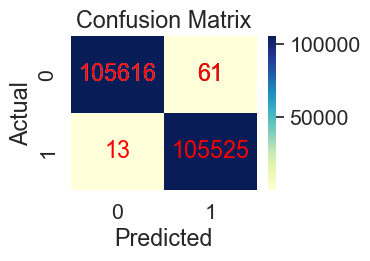

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix values
TP = 105525
TN = 105616
FP = 61
FN = 13

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Ensemble Model of NB + XGBoost as the Base Classifiers while RF as the Meta-Classifier- X5 DataFrame

In [161]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import time

# Assuming X5_train_selected, X5rf_train_selected, X5_train_selected, Y_train, Y_test are already defined

# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X5nb_model = GaussianNB()



# Train Naive Bayes model on the entire training set
X5best_nb_model = X5nb_model.fit(X5_train_selected, Y_train)


# Train the XGBoost Model
# Initialize XGBoost model
X5xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5xgb_random_search = RandomizedSearchCV(estimator=X5xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5xgb_random_search = X5xgb_random_search.fit(X5_xgb_train_selected, Y_train)

# Train XGBoost model with the best hyperparameters
X5best_xgb_model = XGBClassifier(**X5xgb_random_search.best_params_)
X5best_xgb_model = X5best_xgb_model.fit(X5_xgb_train_selected, Y_train)

# Generate predictions from base models
nb_predictions = X5best_nb_model.predict(X5_train_selected)
xgb_predictions = X5best_xgb_model.predict(X5_xgb_train_selected)

# Combine predictions of base models and additional features
X_stacked_input = np.column_stack((X5_train_selected, nb_predictions, xgb_predictions))

# Split the data for meta-model training
X_rf_train, X_rf_test, Y_rf_train, Y_rf_test = train_test_split(X_stacked_input, Y_train, test_size=0.3, random_state=42)


# Define the parameter grid for hyperparameter tuning for RandomForest Model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomForest meta-model
rf_meta_model = RandomForestClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for RandomForest
rf_random_search = RandomizedSearchCV(estimator=rf_meta_model, param_distributions=param_grid_rf, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for RF
rf_random_search = rf_random_search.fit(X_rf_train, Y_rf_train)

# Use the best model from RandomizedSearchCV for RF
best_rf_meta_model = rf_random_search.best_estimator_

# Train the rf meta-model with the best hyperparameters
best_rf_meta_model = best_rf_meta_model.fit(X_rf_train, Y_rf_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the rf meta-model
Y_rf_pred = best_rf_meta_model.predict(X_rf_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst


# Perform k-fold cross-validation
cv_scores = cross_val_score(X5nb_model, X5_train_selected, Y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print confusion matrix and classification report for RandomForest meta-model
print("Confusion Matrix (RandomForest Meta-Model):")
print(confusion_matrix(Y_rf_test, Y_rf_pred))
print("\nClassification Report (RandomForest Meta-Model):")
print(classification_report(Y_rf_test, Y_rf_pred))

# Print the best hyperparameters for XGBoost 
print("Best Hyperparameters for XGBoost Base Model:")
print(X5xgb_random_search.best_params_)
print()
# Print the best hyperparameters for RandomForest meta-model
print("Best Hyperparameters for RandomForest Meta-Model:")
print(rf_random_search.best_params_)
print()

# Print the training and testing times
# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final predictions for RandomForest meta-model
rf_accuracy = accuracy_score(Y_rf_test, Y_rf_pred)
print("Accuracy (RandomForest Meta-Model):", rf_accuracy)









Cross-validation scores: [0.94652368 0.94646687 0.94554364 0.94523116 0.94569988 0.94706342
 0.94568568 0.9461686  0.94558625 0.94503153]
Mean cross-validation score: 0.9459000710624705
Confusion Matrix (RandomForest Meta-Model):
[[105619     58]
 [    15 105523]]

Classification Report (RandomForest Meta-Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters for XGBoost Base Model:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Best Hyperparameters for RandomForest Meta-Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Training Time: 1895.447992324829 seconds
Testing Time: 2.1594889163970947 seconds
Accuracy (RandomForest Meta-Model): 0.9996543806074379

## Ensemble Modelling with the Best Performed Classifiers at 12 Number of Selected Features from X4 (Un-Balanced) as Base Models and Meta-Classifiers using Stacked Generalization Technique

## Ensemble Model of NB + RF using NB as the Base Classifier while RF is the Meta-Classifier- X4 DataFrame (Un-Balanced)

In [171]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: encoded_label, dtype: int64

In [172]:
X4.head()

source_port  destination_port  protocol  flow_duration  total_fwd_packets  \
0     0.351920         -0.356503 -0.642646      -0.653857          -0.011451   
1     0.351613         -0.336856 -0.642646      -0.654742           0.001932   
2     0.181207         -0.355994 -0.642646      -0.654728           0.000594   
3     0.351664         -0.336856 -0.642646      -0.654398           0.009962   
4     0.181309         -0.355994 -0.642646      -0.654728          -0.000744   

   total_backward_packets  total_length_of_fwd_packets  \
0               -0.009362                    -0.089086   
1               -0.005298                    -0.062154   
2               -0.004282                     0.421001   
3                0.001815                     0.469998   
4               -0.004282                     0.421001   

   total_length_of_bwd_packets  fwd_packet_length_max  fwd_packet_length_min  \
0                    -0.007581              -0.376966              -0.176667   
1                    -0.007438              -0.256056              -0.294156   
2                    -0.006178               2.221785              -0.294156   
3                    -0.004612               1.787832              -0.294156   
4                    -0.006177               2.221785              -0.294156   

   ...  act_data_pkt_fwd  min_seg_size_forward  active_mean  active_std  \
0  ...         -0.008559             -1.069401    -0.131646   -0.100396   
1  ...         -0.002966              0.828623    -0.131646   -0.100396   
2  ...         -0.004364              0.828623    -0.131646   -0.100396   
3  ...          0.005424              0.828623    -0.131646   -0.100396   
4  ...         -0.005763              0.828623    -0.131646   -0.100396   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min  
0    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
1    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
2    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
3    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  
4    -0.14867   -0.104366   -0.57998 -0.105686  -0.58524  -0.57078  

[5 rows x 79 columns]

In [173]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_port                  692703 non-null  float64
 1   destination_port             692703 non-null  float64
 2   protocol                     692703 non-null  float64
 3   flow_duration                692703 non-null  float64
 4   total_fwd_packets            692703 non-null  float64
 5   total_backward_packets       692703 non-null  float64
 6   total_length_of_fwd_packets  692703 non-null  float64
 7   total_length_of_bwd_packets  692703 non-null  float64
 8   fwd_packet_length_max        692703 non-null  float64
 9   fwd_packet_length_min        692703 non-null  float64
 10  fwd_packet_length_mean       692703 non-null  float64
 11  fwd_packet_length_std        692703 non-null  float64
 12  bwd_packet_length_max        692703 non-null  float64
 13 

In [187]:
X5rf_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704049 entries, 78877 to 172983
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   init_win_bytes_forward       704049 non-null  float64
 1   destination_port             704049 non-null  float64
 2   packet_length_mean           704049 non-null  float64
 3   average_packet_size          704049 non-null  float64
 4   bwd_packet_length_mean       704049 non-null  float64
 5   avg_bwd_segment_size         704049 non-null  float64
 6   max_packet_length            704049 non-null  float64
 7   total_length_of_bwd_packets  704049 non-null  float64
 8   subflow_bwd_bytes            704049 non-null  float64
 9   bwd_packet_length_max        704049 non-null  float64
 10  flow_iat_max                 704049 non-null  float64
 11  packet_length_std            704049 non-null  float64
dtypes: float64(12)
memory usage: 69.8 MB


## Ensemble Model of RF as the Base Classifiers while XGBoost as the Meta-Classifier- X5 DataFrame (10)

In [188]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 10 features from the training and test sets
X5rf10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf10_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search.fit(X5rf10_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf10_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
X5best_rf10_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf10_model.fit(X5rf10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5rf10_predictions = X5best_rf10_model.predict(X5rf10_train_selected)
X5_xgb10_input = np.column_stack((X5rf10_train_selected, X5rf10_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb10_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf10_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Confusion Matrix (XGBoost Meta-Model):
[[104577   1100]
 [    11 105527]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 3464.507588624954 seconds
Testing Time: 0.211106538772583 seconds
Accuracy (XGBoost Meta-Model): 0.9947399569159388


In [189]:
X5rf10_test_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176013 entries, 574692 to 547310
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   init_win_bytes_forward       176013 non-null  float64
 1   destination_port             176013 non-null  float64
 2   packet_length_mean           176013 non-null  float64
 3   average_packet_size          176013 non-null  float64
 4   bwd_packet_length_mean       176013 non-null  float64
 5   avg_bwd_segment_size         176013 non-null  float64
 6   max_packet_length            176013 non-null  float64
 7   total_length_of_bwd_packets  176013 non-null  float64
 8   subflow_bwd_bytes            176013 non-null  float64
 9   bwd_packet_length_max        176013 non-null  float64
dtypes: float64(10)
memory usage: 14.8 MB


## Ensemble Model of RF + XGBoost using RF as the Base Classifier while XGBoost is the Meta-Classifier- X4 DataFrame (Un-Balanced)

In [191]:

# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into train and test sets
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X4_train, y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X4rf_train_selected = X4_train.iloc[:, selected_feature_indices]
X4rf_test_selected = X4_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X4rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4rf_random_search = RandomizedSearchCV(estimator=X4rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4rf_random_search = X4rf_random_search.fit(X4rf_train_selected, y_train)

# Train Random Forest model with the best hyperparameters
X4best_rf_model = RandomForestClassifier(**X4rf_random_search.best_params_)
X4best_rf_model.fit(X4rf_train_selected, y_train)

# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X4rf_predictions = X4best_rf_model.predict(X4rf_train_selected)
X4_xgb_input = np.column_stack((X4rf_train_selected, X4rf_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X4_xgb_input, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X4rf_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)



Confusion Matrix (XGBoost Meta-Model):
[[104676   1073]
 [     6  60494]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105749
           1       0.98      1.00      0.99     60500

    accuracy                           0.99    166249
   macro avg       0.99      0.99      0.99    166249
weighted avg       0.99      0.99      0.99    166249

Best Hyperparameters for RF Base Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 2786.0353717803955 seconds
Testing Time: 0.16281986236572266 seconds
Accuracy (XGBoost Meta-Model): 0.9935097353969047


## With L2 Regularization 

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf_random_search = RandomizedSearchCV(estimator=X5rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf_random_search.fit(X5rf_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf_random_search.best_params_)
X5best_rf_model.fit(X5rf_train_selected, Y_train) # Train the Random Forest (RF) model on the selected features

# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5rf_predictions = X5best_rf_model.predict(X5rf_train_selected)
X5_xgb_input = np.column_stack((X5rf_train_selected, X5rf_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model with L2 regularization
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'reg_lambda': [0.1, 1.0]  # Adding reg_lambda for L2 regularization
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)



Confusion Matrix (XGBoost Meta-Model):
[[105657     20]
 [     2 105536]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105677
           1       1.00      1.00      1.00    105538

    accuracy                           1.00    211215
   macro avg       1.00      1.00      1.00    211215
weighted avg       1.00      1.00      1.00    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'reg_lambda': 0.1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 4475.334243297577 seconds
Testing Time: 0.1289196014404297 seconds
Accuracy (XGBoost Meta-Model): 0.9998958407310087


## Ensemble Model of RF + NB using RF as the Base Classifiers while NB is the Meta-Classifier- X4 DataFrame (Un-Balanced)

In [194]:
X4rf_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554162 entries, 111294 to 121958
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   init_win_bytes_forward       554162 non-null  float64
 1   packet_length_mean           554162 non-null  float64
 2   average_packet_size          554162 non-null  float64
 3   destination_port             554162 non-null  float64
 4   avg_bwd_segment_size         554162 non-null  float64
 5   bwd_packet_length_mean       554162 non-null  float64
 6   max_packet_length            554162 non-null  float64
 7   subflow_bwd_bytes            554162 non-null  float64
 8   total_length_of_bwd_packets  554162 non-null  float64
 9   bwd_packet_length_max        554162 non-null  float64
 10  packet_length_std            554162 non-null  float64
 11  packet_length_variance       554162 non-null  float64
dtypes: float64(12)
memory usage: 55.0 MB


In [195]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: encoded_label, dtype: int64

In [196]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source_port                  692703 non-null  float64
 1   destination_port             692703 non-null  float64
 2   protocol                     692703 non-null  float64
 3   flow_duration                692703 non-null  float64
 4   total_fwd_packets            692703 non-null  float64
 5   total_backward_packets       692703 non-null  float64
 6   total_length_of_fwd_packets  692703 non-null  float64
 7   total_length_of_bwd_packets  692703 non-null  float64
 8   fwd_packet_length_max        692703 non-null  float64
 9   fwd_packet_length_min        692703 non-null  float64
 10  fwd_packet_length_mean       692703 non-null  float64
 11  fwd_packet_length_std        692703 non-null  float64
 12  bwd_packet_length_max        692703 non-null  float64
 13 

In [198]:
# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X4rf_train_selected, y_train have been pre-defined.

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X4rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4rf_random_search = RandomizedSearchCV(estimator=X4rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4rf_random_search = X4rf_random_search.fit(X4rf_train_selected, y_train)

# Train Random Forest model with the best hyperparameters
X4best_rf_model = RandomForestClassifier(**X4rf_random_search.best_params_)
X4best_rf_model.fit(X4rf_train_selected, y_train)

# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X4rf_predictions = X4best_rf_model.predict(X4rf_train_selected)
X4_nb_input = np.column_stack((X4rf_train_selected, X4rf_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X4_nb_input, y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
nb_meta_model = GaussianNB()
nb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = nb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(nb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters (RF):", X4rf_random_search.best_params_)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix:
[[104676   1073]
 [    11  60489]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105749
           1       0.98      1.00      0.99     60500

    accuracy                           0.99    166249
   macro avg       0.99      0.99      0.99    166249
weighted avg       0.99      0.99      0.99    166249

Accuracy: 0.9934796600280302
Best hyperparameters (RF): {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Cross-validation scores: [0.99326316 0.99374436 0.99332331 0.99326316 0.99314286 0.99368421
 0.99470677 0.99302256 0.99332331 0.99332291]
Mean cross-validation score: 0.9934796590851528
Training Time: 3188.355499982834 seconds
Testing Time: 0.06899619102478027 seconds


## Ensemble Model of NB + RF + XGBOOST using NB+RF as the Base Classifiers while XGBoost is the Meta-Classifier- X4 DataFrame (Un-Balanced)¶

In [200]:

# Implementing Mutual Information-based feature selection method for NB classifier along with hyperparameter tuning using GridSearchCV
# Naive Bayes (NB) models do not have hyperparameters to tune, there is no need to use GridSearchCV for parameter optimization,but CV is evaluated

X4 = X3_scaled.copy()
y.head()

# X4 is an already Z-score normalized unbalanced_input feature data frame and y contains the target variable

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X4_train, y_train, random_state=42)

# Get the indices of the top 12 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:12]

# Select the top 12 features from the training and test sets
X4_train_selected = X4_train.iloc[:, selected_feature_indices]
X4_test_selected = X4_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X4nb_model = GaussianNB()


# Train Naive Bayes model on the entire training set
X4nb_model.fit(X4_train_selected, y_train)

# Make predictions on the test set
X4nb_predictions = X4nb_model.predict(X4_test_selected)


# Initialize Random Forest model
X4rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4rf_random_search = RandomizedSearchCV(estimator=X4rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4rf_random_search = X4rf_random_search.fit(X4rf_train_selected, y_train)

# Train Random Forest model with the best hyperparameters
X4best_rf_model = RandomForestClassifier(**X4rf_random_search.best_params_)
X4best_rf_model.fit(X4rf_train_selected, y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X4nb_predictions = X4nb_model.predict(X4_train_selected)
X4rf_predictions = X4best_rf_model.predict(X4rf_train_selected)
X4_xgb_input = np.column_stack((X4rf_train_selected, X4nb_predictions, X4rf_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X4_xgb_input, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X4rf_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)



Confusion Matrix (XGBoost Meta-Model):
[[104676   1073]
 [     6  60494]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105749
           1       0.98      1.00      0.99     60500

    accuracy                           0.99    166249
   macro avg       0.99      0.99      0.99    166249
weighted avg       0.99      0.99      0.99    166249

Best Hyperparameters for RF Base Model:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 3214.167712211609 seconds
Testing Time: 0.14867758750915527 seconds
Accuracy (XGBoost Meta-Model): 0.9935097353969047


## Ensemble Model of RF + XGBOOST + NB using RF + XGBOOST as the Base Classifiers while NB is the Meta-Classifier- X4 DataFrame (Un-Balanced)

In [205]:

# Implementing Mutual Information-based feature selection method for RF classifier along with hyperparameter tuning using RandomSearchCV(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X4rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4rf_random_search = RandomizedSearchCV(estimator=X4rf_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4rf_random_search = X4rf_random_search.fit(X4rf_train_selected, y_train)

# Train Random Forest model with the best hyperparameters
X4best_rf_model = RandomForestClassifier(**X4rf_random_search.best_params_)
X4best_rf_model.fit(X4rf_train_selected, y_train)


# Initialize XGBoost model
X4xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X4xgb_random_search = RandomizedSearchCV(estimator=X4xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X4xgb_random_search = X4xgb_random_search.fit(X4xgb_train_selected, y_train)


# Train XGBoost model with the best hyperparameters
X4best_xgb_model = XGBClassifier(**X4xgb_random_search.best_params_)
X4best_xgb_model.fit(X4xgb_train_selected, y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X4rf_predictions = X4best_rf_model.predict(X4rf_train_selected)
X4xgb_predictions = X4best_xgb_model.predict(X4xgb_train_selected)
X4_nb_input = np.column_stack((X4rf_train_selected, X4rf_predictions, X4xgb_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X4_nb_input, y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
nb_meta_model = GaussianNB()
nb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = nb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(nb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters (RF):", X4rf_random_search.best_params_)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix:
[[104677   1072]
 [    22  60478]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105749
           1       0.98      1.00      0.99     60500

    accuracy                           0.99    166249
   macro avg       0.99      0.99      0.99    166249
weighted avg       0.99      0.99      0.99    166249

Accuracy: 0.9934195092902814
Best hyperparameters (RF): {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Cross-validation scores: [0.99320301 0.99362406 0.99326316 0.99320301 0.99308271 0.99368421
 0.99458647 0.99296241 0.99326316 0.99332291]
Mean cross-validation score: 0.993419508709213
Training Time: 2973.9385693073273 seconds
Testing Time: 0.08319282531738281 seconds


## Correlation Matrix Heatmap of Top 20 Features in X5_Balanced Dataset

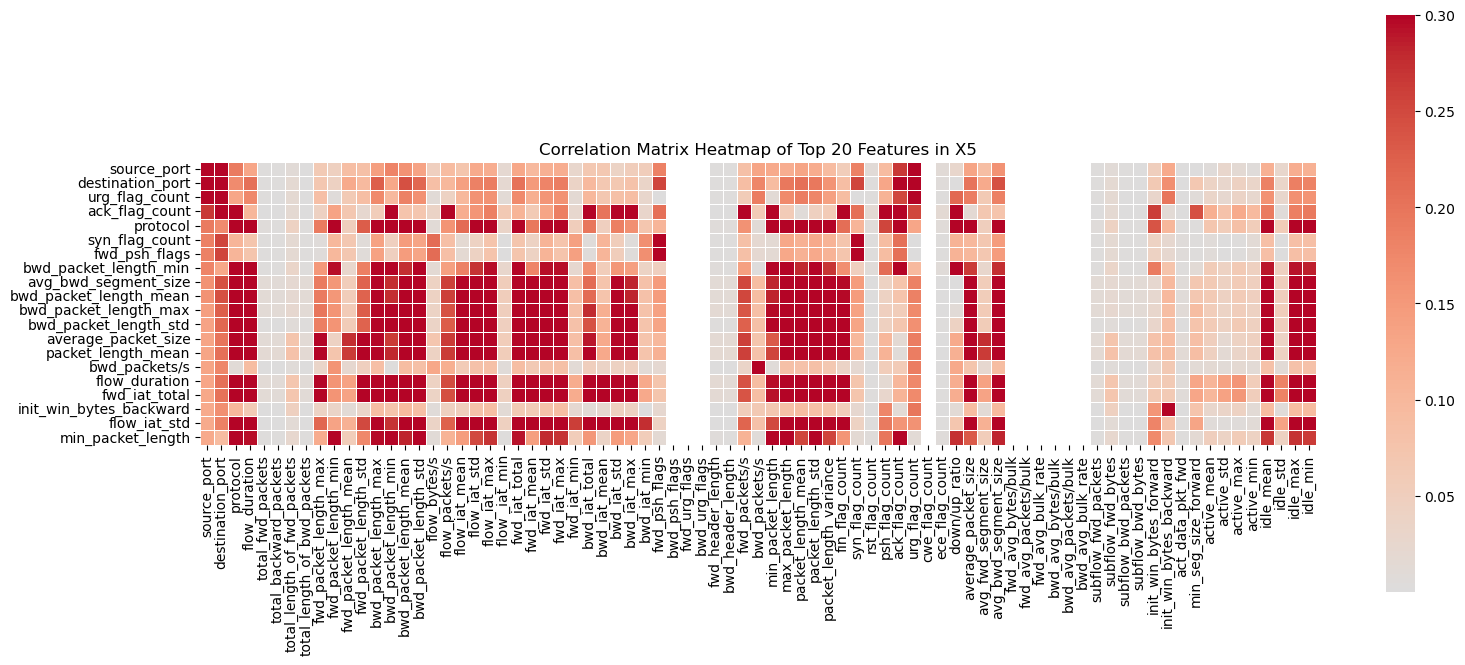

In [40]:
# Compute the correlation matrix for all features
corr_matrix = X5.corr()

# Select the top 20 features with the largest correlations with any other feature
top_corr_features = corr_matrix.abs().nlargest(20, columns=corr_matrix.columns)

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(top_corr_features, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Correlation Matrix Heatmap of Top 20 Features in X5')
plt.show()


## Ensemble Model of RF as the Base Classifiers while NB as the Meta-Classifier- X5 DataFrame (10)

In [41]:

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 10 features from the training and test sets
X5rf10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf10_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search.fit(X5rf10_train_selected, Y_train)


# Train Random Forest model with the best hyperparameters
X5best_rf10_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf10_model.fit(X5rf10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5rf10_predictions = X5best_rf10_model.predict(X5rf10_train_selected)
X5_nb10_input = np.column_stack((X5rf10_train_selected, X5rf10_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X5_nb10_input, Y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
xgbnb_meta_model = GaussianNB()
xgbnb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = xgbnb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgbnb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf10_random_search.best_params_)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix:
[[104577   1100]
 [    16 105522]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Accuracy: 0.9947162843548043
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Cross-validation scores: [0.99493419 0.99536029 0.99398731 0.99507622 0.99446075 0.99540741
 0.99403437 0.99455518 0.99493395 0.99441314]
Mean cross-validation score: 0.994716283231063
Training Time: 3315.962934732437 seconds
Testing Time: 0.08060979843139648 seconds


## Ensemble Model of RF + XGBoost as the Base Classifiers while NB as the Meta-Classifier- X5 DataFrame (10)

In [44]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 10 features from the training and test sets
X5rf10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf10_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search.fit(X5rf10_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf10_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf10_model.fit(X5rf10_train_selected, Y_train)


# Initialize XGBoost model
X10xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X10xgb_random_search = RandomizedSearchCV(estimator=X10xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X10xgb_random_search = X10xgb_random_search.fit(X5rf10_train_selected, Y_train)


# Train XGBoost model with the best hyperparameters
X10best_xgb_model = XGBClassifier(**X10xgb_random_search.best_params_)
X10best_xgb_model.fit(X5rf10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X10rf_predictions = X5best_rf10_model.predict(X5rf10_train_selected)
X10xgb_predictions = X10best_xgb_model.predict(X5rf10_train_selected)
X10_nb_input = np.column_stack((X5rf10_train_selected, X10rf_predictions, X10xgb_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X10_nb_input, Y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
nb_meta_model = GaussianNB()
nb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = nb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(nb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters (RF):", X5rf10_random_search.best_params_)
print("Best hyperparameters (XGB):", X10xgb_random_search.best_params_)


# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix:
[[104577   1100]
 [    23 105515]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Accuracy: 0.9946831427692162
Best hyperparameters (RF): {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Best hyperparameters (XGB): {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Cross-validation scores: [0.99488685 0.99536029 0.99398731 0.99507622 0.99446075 0.99531272
 0.99393968 0.99450784 0.99488661 0.99441314]
Mean cross-validation score: 0.9946831410850662
Training Time: 3129.6494011878967 seconds
Testing Time: 0.0690145492553711 seconds


## Ensemble Model of NB + RF as the Base Classifiers while XGBOOST as the Meta-Classifier- X5 DataFrame (10)

In [48]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:10]

# Select the top 10 features from the training and test sets
X5nb10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5nb10_test_selected = X5_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X5nb10_model = GaussianNB()


# Train Naive Bayes model on the entire training set
X5nb10_model.fit(X5nb10_train_selected, Y_train)

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search = X5rf10_random_search.fit(X5nb10_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf_model.fit(X5nb10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5nb10_predictions = X5nb10_model.predict(X5nb10_train_selected)
X5rf10_predictions = X5best_rf_model.predict(X5nb10_train_selected)
X5_xgb_input = np.column_stack((X5nb10_train_selected, X5nb10_predictions, X5rf10_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf10_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)


Confusion Matrix (XGBoost Meta-Model):
[[104577   1100]
 [    12 105526]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 3067.407455444336 seconds
Testing Time: 0.20067977905273438 seconds
Accuracy (XGBoost Meta-Model): 0.9947352224037118


## Ensemble Model of RF as the Base Classifiers while XGBOOST as the Meta-Classifier- X5 DataFrame (8)

In [49]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 8 features from the training and test sets
X5rf10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf10_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search.fit(X5rf10_train_selected, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf10_random_search.best_params_)

# Train Random Forest model with the best hyperparameters
X5best_rf10_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf10_model.fit(X5rf10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5rf10_predictions = X5best_rf10_model.predict(X5rf10_train_selected)
X5_xgb10_input = np.column_stack((X5rf10_train_selected, X5rf10_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb10_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf10_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)


Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Confusion Matrix (XGBoost Meta-Model):
[[104577   1100]
 [    12 105526]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 2451.558854818344 seconds
Testing Time: 0.20070099830627441 seconds
Accuracy (XGBoost Meta-Model): 0.9947352224037118


## Ensemble Model of RF as the Base Classifiers while NB as the Meta-Classifier- X5 DataFrame (8)

In [50]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 10 features from the training and test sets
X5rf10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf10_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search.fit(X5rf10_train_selected, Y_train)


# Train Random Forest model with the best hyperparameters
X5best_rf10_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf10_model.fit(X5rf10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5rf10_predictions = X5best_rf10_model.predict(X5rf10_train_selected)
X5_nb10_input = np.column_stack((X5rf10_train_selected, X5rf10_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X5_nb10_input, Y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
xgbnb_meta_model = GaussianNB()
xgbnb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = xgbnb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgbnb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best hyperparameters:", X5rf10_random_search.best_params_)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix:
[[104577   1100]
 [    16 105522]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Accuracy: 0.9947162843548043
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Cross-validation scores: [0.99493419 0.99536029 0.99398731 0.99507622 0.99446075 0.99540741
 0.99403437 0.99455518 0.99493395 0.99441314]
Mean cross-validation score: 0.994716283231063
Training Time: 2345.040627002716 seconds
Testing Time: 0.06871604919433594 seconds


## Ensemble Model of RF + XGBoost as the Base Classifiers while NB as the Meta-Classifier- X5 DataFrame (8)

In [52]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 10 features from the training and test sets
X5rf10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5rf10_test_selected = X5_test.iloc[:, selected_feature_indices]

# Start the training timer
start_trt = time.time()

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search.fit(X5rf10_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf10_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf10_model.fit(X5rf10_train_selected, Y_train)


# Initialize XGBoost model
X10xgb_model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X10xgb_random_search = RandomizedSearchCV(estimator=X10xgb_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X10xgb_random_search = X10xgb_random_search.fit(X5rf10_train_selected, Y_train)


# Train XGBoost model with the best hyperparameters
X10best_xgb_model = XGBClassifier(**X10xgb_random_search.best_params_)
X10best_xgb_model.fit(X5rf10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X10rf_predictions = X5best_rf10_model.predict(X5rf10_train_selected)
X10xgb_predictions = X10best_xgb_model.predict(X5rf10_train_selected)
X10_nb_input = np.column_stack((X5rf10_train_selected, X10rf_predictions, X10xgb_predictions))

# Split the data for meta-model training
X_nb_train, X_nb_test, Y_nb_train, Y_nb_test = train_test_split(X10_nb_input, Y_train, test_size=0.3, random_state=42)

# Train the Meta-Model (NB)
nb_meta_model = GaussianNB()
nb_meta_model.fit(X_nb_train, Y_nb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Make final predictions using the meta-model (NB)
final_predictions = nb_meta_model.predict(X_nb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Perform k-fold cross-validation
cv_scores = cross_val_score(nb_meta_model, X_nb_test, Y_nb_test, cv=10)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_nb_test, final_predictions))
print("\nClassification Report:")
print(classification_report(Y_nb_test, final_predictions))

# Calculate accuracy
accuracy = accuracy_score(Y_nb_test, final_predictions)
print("Accuracy:", accuracy)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters (RF):", X5rf10_random_search.best_params_)
print("Best hyperparameters (XGB):", X10xgb_random_search.best_params_)


# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")



Confusion Matrix:
[[104577   1100]
 [    22 105516]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Accuracy: 0.994687877281443
Best hyperparameters (RF): {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Best hyperparameters (XGB): {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Cross-validation scores: [0.99488685 0.99536029 0.99398731 0.99507622 0.99446075 0.99531272
 0.99398703 0.99450784 0.99488661 0.99441314]
Mean cross-validation score: 0.9946878757093737
Training Time: 2831.767956972122 seconds
Testing Time: 0.0825042724609375 seconds


## Ensemble Model of NB + RF as the Base Classifiers while XGBOOST as the Meta-Classifier- X5 DataFrame (8)

In [70]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import time


# Split the data into train and test sets
X5_train, X5_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.2, random_state=42)

# Perform feature selection using Mutual Information-based technique
mi_scores = mutual_info_classif(X5_train, Y_train, random_state=42)

# Get the indices of the top 10 features based on mutual information scores
selected_feature_indices = (-mi_scores).argsort()[:8]

# Select the top 10 features from the training and test sets
X5nb10_train_selected = X5_train.iloc[:, selected_feature_indices]
X5nb10_test_selected = X5_test.iloc[:, selected_feature_indices]


# Start the training timer
start_trt = time.time()

# Initialize Naive Bayes model
X5nb10_model = GaussianNB()


# Train Naive Bayes model on the entire training set
X5nb10_model.fit(X5nb10_train_selected, Y_train)

# Initialize Random Forest model
X5rf10_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
X5rf10_random_search = RandomizedSearchCV(estimator=X5rf10_model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)

# Fit RandomizedSearchCV to the training data
X5rf10_random_search = X5rf10_random_search.fit(X5nb10_train_selected, Y_train)

# Train Random Forest model with the best hyperparameters
X5best_rf_model = RandomForestClassifier(**X5rf10_random_search.best_params_)
X5best_rf_model.fit(X5nb10_train_selected, Y_train)


# Step 2: Use the predictions from the RF model as additional features for training the XGBoost meta-model
X5nb10_predictions = X5nb10_model.predict(X5nb10_train_selected)
X5rf10_predictions = X5best_rf_model.predict(X5nb10_train_selected)
X5_xgb_input = np.column_stack((X5nb10_train_selected, X5nb10_predictions, X5rf10_predictions))

# Split the data for meta-model training
X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(X5_xgb_input, Y_train, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning for XGBoost Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Initialize XGBoost meta-model
xgb_meta_model = XGBClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_model, param_distributions=param_grid_xgb, n_iter=5, cv=5, random_state=42)

# Perform hyperparameter optimization for XGBoost
xgb_random_search.fit(X_xgb_train, Y_xgb_train)

# Use the best model from RandomizedSearchCV for XGBoost
best_xgb_meta_model = xgb_random_search.best_estimator_

# Train the XGBoost meta-model with the best hyperparameters
best_xgb_meta_model.fit(X_xgb_train, Y_xgb_train)

# End the training timer
end_trt = time.time()

# Calculate the training time
trt = end_trt - start_trt

# Start the testing timer
start_tst = time.time()

# Step 3: Evaluate the performance of the stacked model
# Make predictions using the XGBoost meta-model
Y_xgb_pred = best_xgb_meta_model.predict(X_xgb_test)

# End the testing timer
end_tst = time.time()

# Calculate the testing time
tst = end_tst - start_tst

# Print confusion matrix and classification report for XGBoost meta-model
print("Confusion Matrix (XGBoost Meta-Model):")
print(confusion_matrix(Y_xgb_test, Y_xgb_pred))
print("\nClassification Report (XGBoost Meta-Model):")
print(classification_report(Y_xgb_test, Y_xgb_pred))

# Print the best hyperparameters for Random Forest and XGBoost
print("Best Hyperparameters for RF Base Model:")
print(X5rf10_random_search.best_params_)
print("\nBest Hyperparameters for XGBoost Meta-Model:")
print(xgb_random_search.best_params_)
print()

# Print the training and testing times
print("Training Time:", trt, "seconds")
print("Testing Time:", tst, "seconds")

# Calculate accuracy of the final prediction for XGBoost meta-model
xgb_accuracy = accuracy_score(Y_xgb_test, Y_xgb_pred)
print("Accuracy (XGBoost Meta-Model):", xgb_accuracy)


Confusion Matrix (XGBoost Meta-Model):
[[104577   1100]
 [    12 105526]]

Classification Report (XGBoost Meta-Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    105677
           1       0.99      1.00      0.99    105538

    accuracy                           0.99    211215
   macro avg       0.99      0.99      0.99    211215
weighted avg       0.99      0.99      0.99    211215

Best Hyperparameters for RF Base Model:
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

Best Hyperparameters for XGBoost Meta-Model:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

Training Time: 2440.061070919037 seconds
Testing Time: 0.19069361686706543 seconds
Accuracy (XGBoost Meta-Model): 0.9947352224037118


## Barplot for Paper comparison

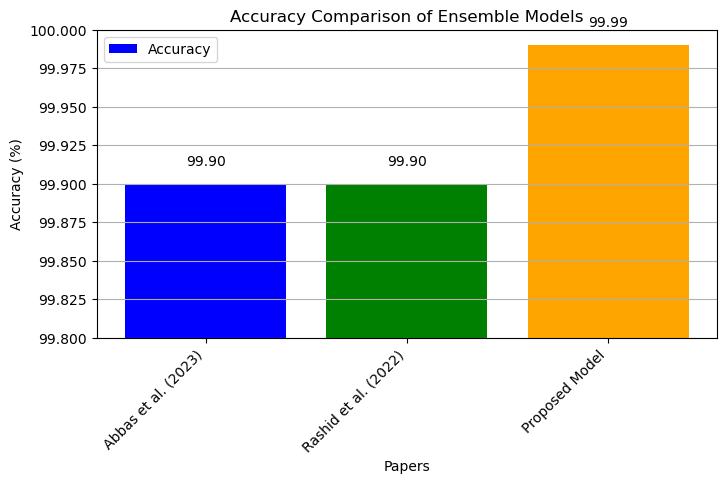

In [7]:
import matplotlib.pyplot as plt

# Names of the papers
papers = ['Abbas et al. (2023)', 'Rashid et al. (2022)', 'Proposed Model']

# Accuracy values
accuracy = [99.90, 99.90, 99.99]

# Labels for each paper
labels = {
    'Abbas et al. (2023)': 'RF, MLP, SVM, Bagging & Voting',
    'Rashid et al. (2022)': 'DT, RF, XGBoost, Stacking & Meta-learning',
    'Proposed Model': 'NB, RF, XGBoost, Stacking & Meta-learning'
}

# Plotting the data
plt.figure(figsize=(8, 4))
plt.bar(papers, accuracy, color=['blue', 'green', 'orange'])

# Adding labels
for i, paper in enumerate(papers):
    plt.text(i, accuracy[i] + 0.01, f'{accuracy[i]:.2f}', ha='center', va='bottom')

# Adding legend
plt.legend(['Accuracy'])
plt.xlabel('Papers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Ensemble Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(99.8, 100)
plt.grid(axis='y')

# Show the plot
plt.show()


## Confusion matrix for proposed model

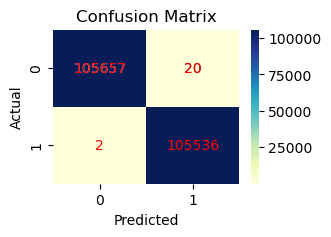

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix values
TP = 105536
TN = 105657
FP = 20
FN = 2

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## ROC-Curve for Proposed Model

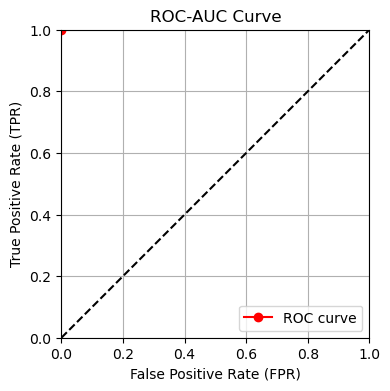

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix values
TP = 105536
TN = 105657
FP = 20
FN = 2

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Plot the ROC-AUC curve
plt.figure(figsize=(4, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, marker='o', color='r', label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Accuracy comparison for balanced and unbalanced Dataset

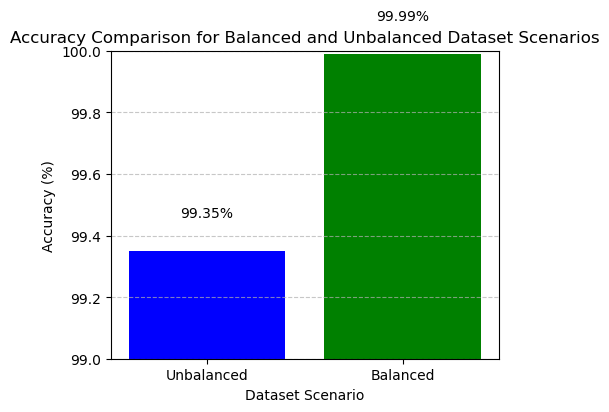

In [13]:
import matplotlib.pyplot as plt

# Define the accuracy values
accuracy_unbalanced = 99.35
accuracy_balanced = 99.99

# Define the labels for the x-axis
labels = ['Unbalanced', 'Balanced']

# Define the accuracy values for plotting
accuracy_values = [accuracy_unbalanced, accuracy_balanced]

# Plot the bar chart
plt.figure(figsize=(5, 4))
bars = plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.xlabel('Dataset Scenario')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison for Balanced and Unbalanced Dataset Scenarios')
plt.ylim(99, 100)  # Adjust y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}%', ha='center', va='bottom')

plt.show()


## Plot of proposed model across 12, 10, 8 features

C:\Users\USER\AppData\Local\Temp\ipykernel_11816\2972497115.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])


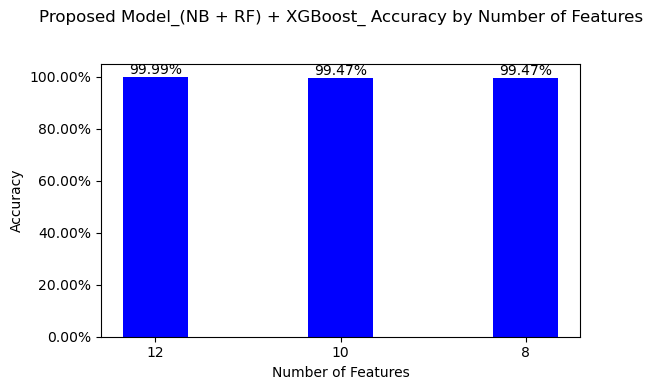

In [63]:
import matplotlib.pyplot as plt

# Data
num_features = [12, 10, 8]
proposed_model_accuracy = [99.99, 99.47, 99.47]

# Plotting
plt.figure(figsize=(6, 4))

bar_width = 0.35
index = [i for i in range(len(num_features))]

bars = plt.bar(index, proposed_model_accuracy, width=bar_width, label='Proposed Model', color='blue')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Proposed Model_(NB + RF) + XGBoost_ Accuracy by Number of Features', loc='center', pad=30)
plt.xticks(index, num_features)

# Add accuracy values on bars
for bar, acc in zip(bars, proposed_model_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, acc, f'{acc:.2f}%', ha='center', va='bottom', rotation=0)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11816\3805004249.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])


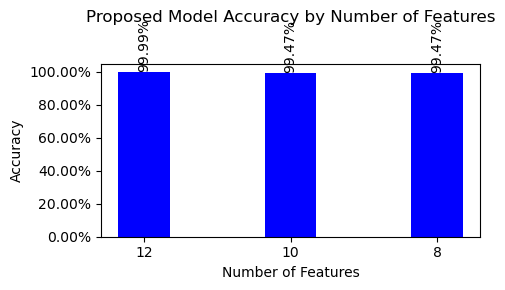

In [15]:
import matplotlib.pyplot as plt

# Data
num_features = [12, 10, 8]
proposed_model_accuracy = [99.99, 99.47, 99.47]

# Plotting
plt.figure(figsize=(5, 3))

bar_width = 0.35
index = [i for i in range(len(num_features))]

plt.bar(index, proposed_model_accuracy, width=bar_width, label='Proposed Model', color='blue')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Proposed Model Accuracy by Number of Features', loc='center', pad=30)
plt.xticks(index, num_features)

# Add accuracy values on bars
for i, acc in enumerate(proposed_model_accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom', rotation=90)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.tight_layout()
plt.show()


## Performance Accuracy Plot for All 9 Ensembles

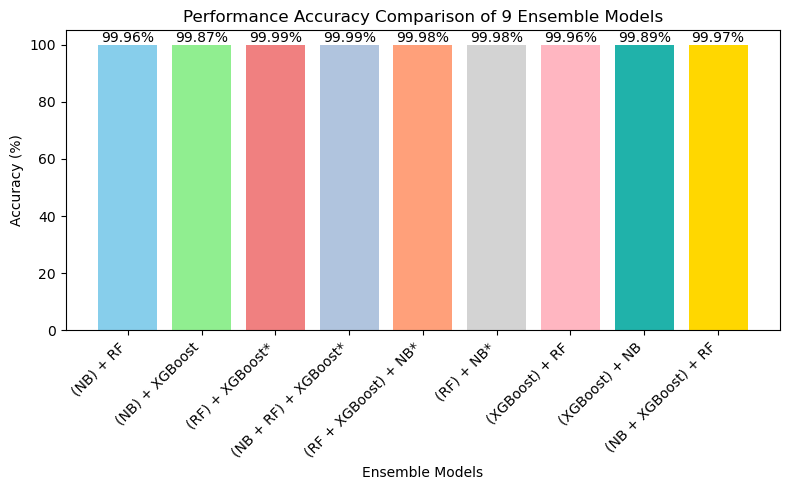

In [21]:
import matplotlib.pyplot as plt

# Data
models = ['(NB) + RF', '(NB) + XGBoost', '(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*', '(XGBoost) + RF', '(XGBoost) + NB', '(NB + XGBoost) + RF']
accuracy = [99.96, 99.87, 99.99, 99.99, 99.98, 99.98, 99.96, 99.89, 99.97]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsteelblue', 'lightsalmon', 'lightgrey', 'lightpink', 'lightseagreen', 'gold']  # Changed the last color to 'gold'

# Plotting
plt.figure(figsize=(8, 5))

plt.bar(models, accuracy, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Accuracy (%)')
plt.title('Performance Accuracy Comparison of 9 Ensemble Models')

# Add accuracy values on bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Training Times of the Best 4 Performing Ensemble Models

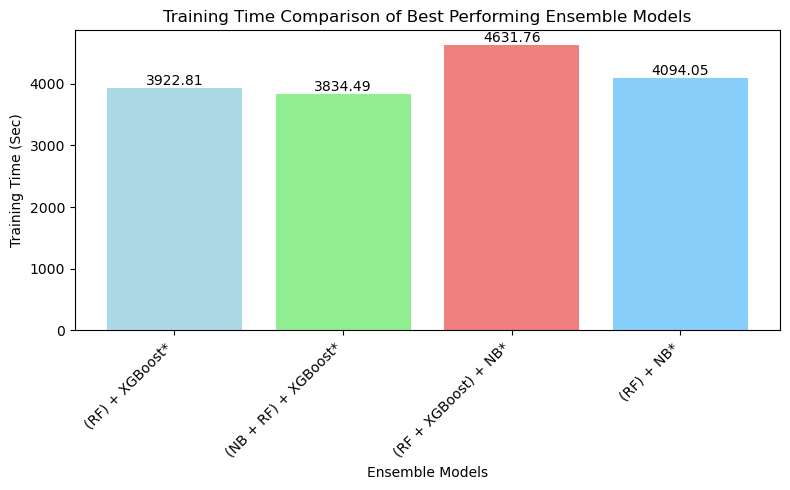

In [25]:
import matplotlib.pyplot as plt

# Data
models = ['(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*']
training_time = [3922.806, 3834.487, 4631.756, 4094.055]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Plotting
plt.figure(figsize=(8, 5))

plt.bar(models, training_time, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Training Time (Sec)')
plt.title('Training Time Comparison of Best Performing Ensemble Models')

# Add training time values on bars
for i, time in enumerate(training_time):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Testing Time Comparison for the Best Perfoming Models

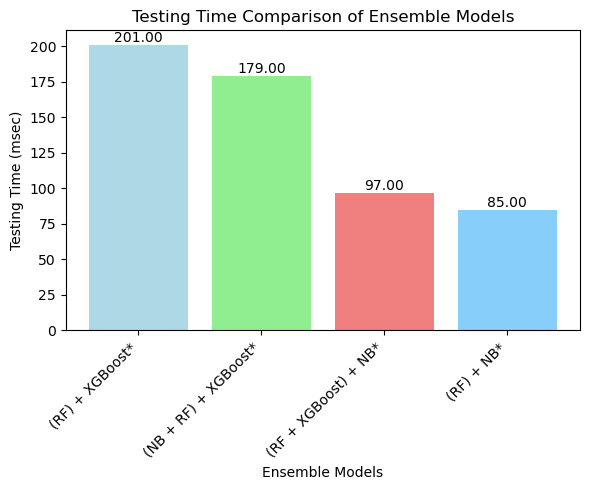

In [55]:
import matplotlib.pyplot as plt

# Data
models = ['(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*']
training_time_sec = [0.201, 0.179, 0.097, 0.085]
training_time_msec = [time * 1000 for time in training_time_sec]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Plotting
plt.figure(figsize=(6, 5))

plt.bar(models, training_time_msec, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Testing Time (msec)')
plt.title('Testing Time Comparison of Ensemble Models')

# Add training time values on bars
for i, time in enumerate(training_time_msec):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Time Serialization for the 2 Best Performing Ensemble Models

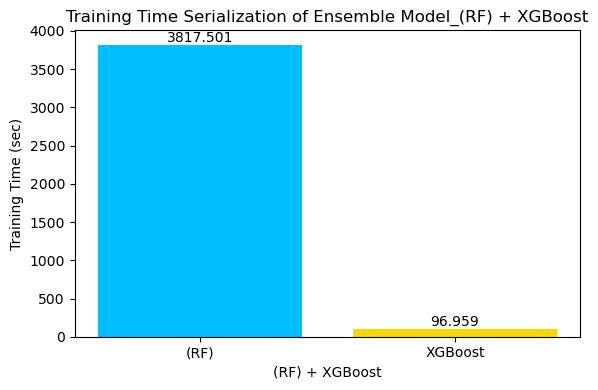

In [45]:
import matplotlib.pyplot as plt

# Data
ensemble_models = ['(RF)', 'XGBoost']
training_times = [3817.501, 96.959]
colors = ['deepskyblue', 'gold']

# Plotting
plt.figure(figsize=(6, 4))

bars = plt.bar(ensemble_models, training_times, color=colors)

# Add labels and title
plt.xlabel('(RF) + XGBoost')
plt.ylabel('Training Time (sec)')
plt.title('Training Time Serialization of Ensemble Model_(RF) + XGBoost')

# Add time values on bars
for bar, time in zip(bars, training_times):
    plt.text(bar.get_x() + bar.get_width() / 2, time, f'{time:.3f}', ha='center', va='bottom', rotation=0, color='black')

# Show plot
plt.tight_layout()
plt.show()


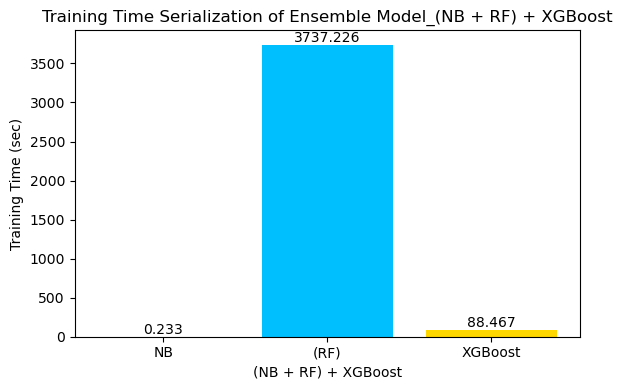

In [46]:
import matplotlib.pyplot as plt

# Data
ensemble_models = ['NB', '(RF)', 'XGBoost']
training_times = [0.233, 3737.226, 88.467]
colors = ['firebrick', 'deepskyblue', 'gold']

# Plotting
plt.figure(figsize=(6, 4))

bars = plt.bar(ensemble_models, training_times, color=colors)

# Add labels and title
plt.xlabel('(NB + RF) + XGBoost')
plt.ylabel('Training Time (sec)')
plt.title('Training Time Serialization of Ensemble Model_(NB + RF) + XGBoost')

# Add time values on bars
for bar, time in zip(bars, training_times):
    plt.text(bar.get_x() + bar.get_width() / 2, time, f'{time:.3f}', ha='center', va='bottom', rotation=0, color='black')

# Show plot
plt.tight_layout()
plt.show()


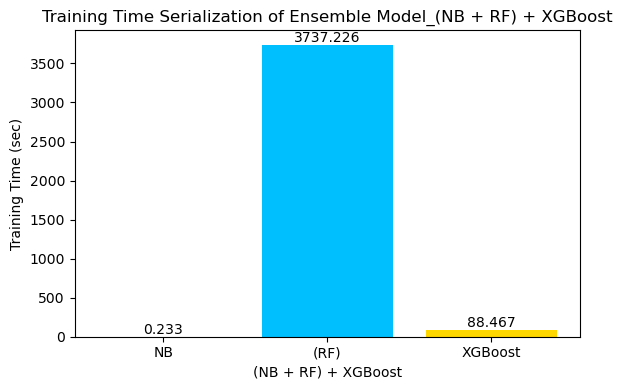

In [47]:
import matplotlib.pyplot as plt

# Data
ensemble_models = ['NB', '(RF)', 'XGBoost']
training_times = [0.233, 3737.226, 88.467]
colors = ['firebrick', 'deepskyblue', 'gold']

# Plotting
plt.figure(figsize=(6, 4))

bars = plt.bar(ensemble_models, training_times, color=colors)

# Add labels and title
plt.xlabel('(NB + RF) + XGBoost')
plt.ylabel('Training Time (sec)')
plt.title('Training Time Serialization of Ensemble Model_(NB + RF) + XGBoost')

# Add time values on bars
for bar, time in zip(bars, training_times):
    plt.text(bar.get_x() + bar.get_width() / 2, time, f'{time:.3f}', ha='center', va='bottom', rotation=0, color='black')

# Show plot
plt.tight_layout()
plt.show()


## Confusion Mtrix for RF + XGBoost + NB & RF +NB

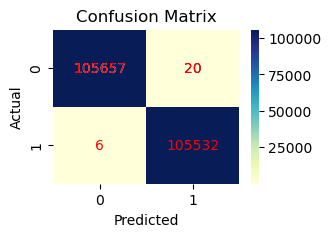

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix values
TP = 105532
TN = 105657
FP = 20
FN = 6

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Effect of Using a Different Train_TEst Split Suset in training the Meta-Model for Increased Generalization using NB + RF Ensemble for a Test

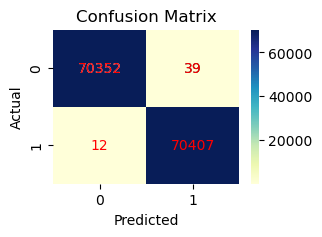

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For 80/20 Split
# Define the confusion matrix values
TP = 70407
TN = 70352
FP = 39
FN = 12

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


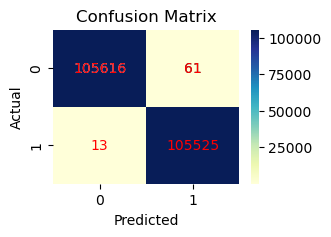

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For 70/30 Split
# Define the confusion matrix values
TP = 105525
TN = 105616
FP = 61
FN = 13

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## RF + XGBoost_Accuracy over 12, 10, 8 Number of Features

C:\Users\USER\AppData\Local\Temp\ipykernel_11816\2496005778.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])


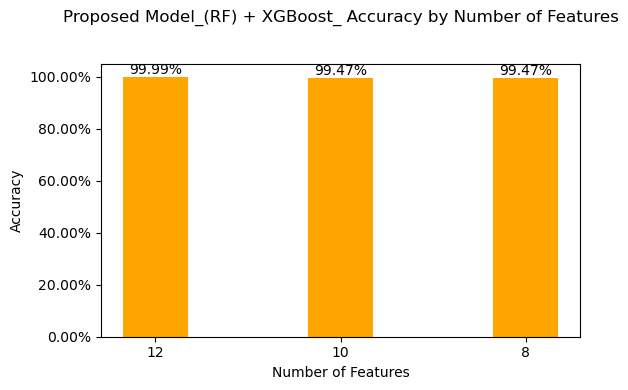

In [66]:
import matplotlib.pyplot as plt

# Data
num_features = [12, 10, 8]
RFXGBoost_model_accuracy = [99.99, 99.47, 99.47]

# Plotting
plt.figure(figsize=(6, 4))

bar_width = 0.35
index = [i for i in range(len(num_features))]

bars = plt.bar(index, proposed_model_accuracy, width=bar_width, label='Proposed Model', color='orange')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Proposed Model_(RF) + XGBoost_ Accuracy by Number of Features', loc='center', pad=30)
plt.xticks(index, num_features)

# Add accuracy values on bars
for bar, acc in zip(bars, proposed_model_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, acc, f'{acc:.2f}%', ha='center', va='bottom', rotation=0)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.tight_layout()
plt.show()


## Performance Accuracy of RF + XGBoost + NB over 12, 10, 8


C:\Users\USER\AppData\Local\Temp\ipykernel_11816\974289884.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])


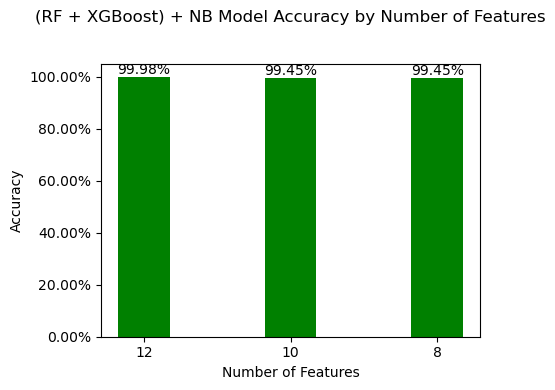

In [72]:
import matplotlib.pyplot as plt

# Data
num_features = [12, 10, 8]
RFXGBoostNB_model_accuracy = [99.98, 99.45, 99.45]

# Plotting
plt.figure(figsize=(5, 4))

bar_width = 0.35
index = [i for i in range(len(num_features))]

bars = plt.bar(index, RFXGBoostNB_model_accuracy, width=bar_width, label='RF + XGBoost + NB', color='green')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('(RF + XGBoost) + NB Model Accuracy by Number of Features', loc='center', pad=30)
plt.xticks(index, num_features)

# Add accuracy values on bars
for bar, acc in zip(bars, RFXGBoostNB_model_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, acc, f'{acc:.2f}%', ha='center', va='bottom', rotation=0)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.tight_layout()
plt.show()


## Performance Accuracy of RF + NB over 12, 10, 8

C:\Users\USER\AppData\Local\Temp\ipykernel_11816\4055334509.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])


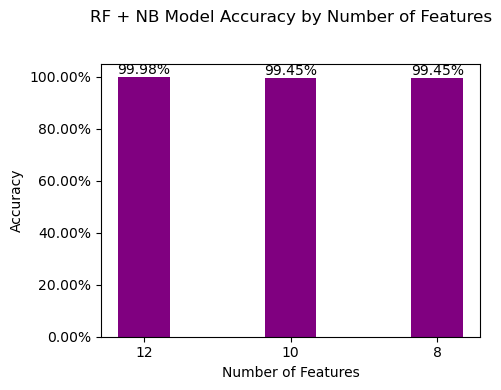

In [76]:
import matplotlib.pyplot as plt

# Data
num_features = [12, 10, 8]
RFNB_model_accuracy = [99.98, 99.46, 99.46]

# Plotting
plt.figure(figsize=(5, 4))

bar_width = 0.35
index = [i for i in range(len(num_features))]

bars = plt.bar(index, RFNB_model_accuracy, width=bar_width, label='RF + NB', color='purple')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('RF + NB Model Accuracy by Number of Features', loc='center', pad=30)
plt.xticks(index, num_features)

# Add accuracy values on bars
for bar, acc in zip(bars, RFXGBoostNB_model_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, acc, f'{acc:.2f}%', ha='center', va='bottom', rotation=0)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.tight_layout()
plt.show()


## Training Times of the 4 Best Performing at 10 Features

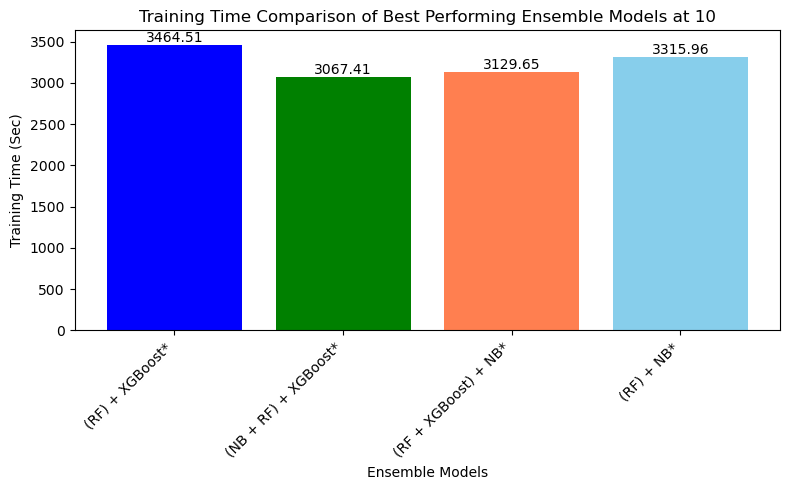

In [77]:
import matplotlib.pyplot as plt

# Data
models = ['(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*']
training_time = [3464.508, 3067.408, 3129.649, 3315.963]
colors = ['blue', 'green', 'coral', 'skyblue']

# Plotting
plt.figure(figsize=(8, 5))

plt.bar(models, training_time, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Training Time (Sec)')
plt.title('Training Time Comparison of Best Performing Ensemble Models at 10')

# Add training time values on bars
for i, time in enumerate(training_time):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Training Time of 4 Best Performing Ensembles at 8 Features

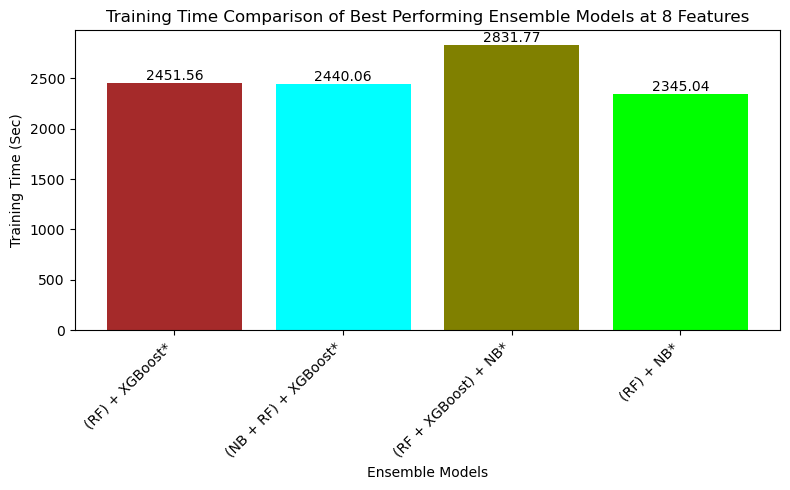

In [79]:
import matplotlib.pyplot as plt

# Data
models = ['(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*']
training_time = [2451.559, 2440.061, 2831.768, 2345.041]
colors = ['brown', 'cyan', 'olive', 'lime']

# Plotting
plt.figure(figsize=(8, 5))

plt.bar(models, training_time, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Training Time (Sec)')
plt.title('Training Time Comparison of Best Performing Ensemble Models at 8 Features')

# Add training time values on bars
for i, time in enumerate(training_time):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Testing Time comparison of 4 Best performing Ensembles at 10 number of features

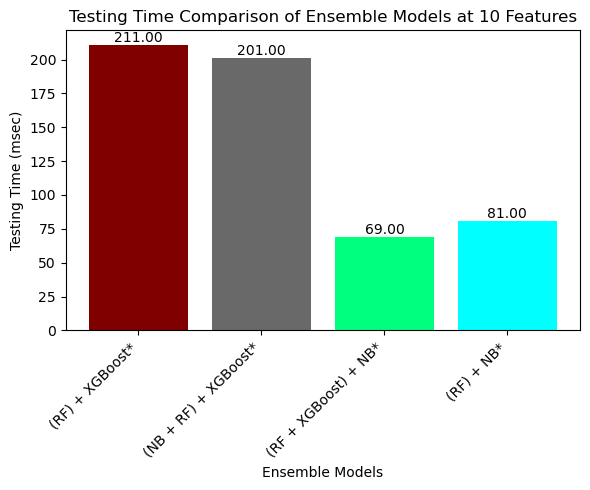

In [81]:
import matplotlib.pyplot as plt

# Data
models = ['(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*']
training_time_sec = [0.211, 0.201, 0.069, 0.081]
training_time_msec = [time * 1000 for time in training_time_sec]
colors = ['maroon', 'dimgrey', 'springgreen', 'aqua']

# Plotting
plt.figure(figsize=(6, 5))

plt.bar(models, training_time_msec, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Testing Time (msec)')
plt.title('Testing Time Comparison of Ensemble Models at 10 Features')

# Add training time values on bars
for i, time in enumerate(training_time_msec):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Testing time of Best Ensembles at 8 features

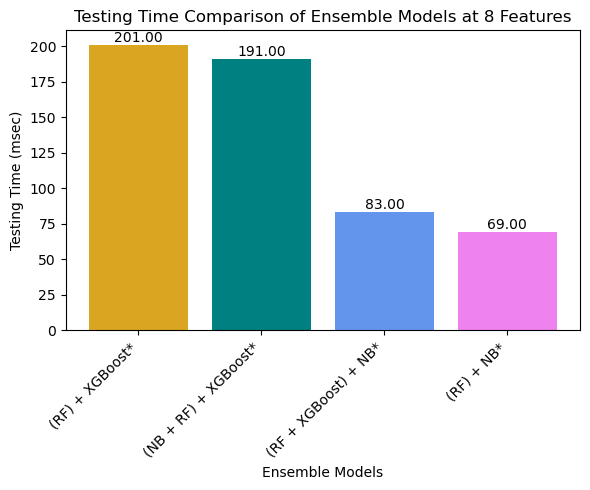

In [82]:
import matplotlib.pyplot as plt

# Data
models = ['(RF) + XGBoost*', '(NB + RF) + XGBoost*', '(RF + XGBoost) + NB*', '(RF) + NB*']
training_time_sec = [0.201, 0.191, 0.083, 0.069]
training_time_msec = [time * 1000 for time in training_time_sec]
colors = ['goldenrod', 'teal', 'cornflowerblue', 'violet']

# Plotting
plt.figure(figsize=(6, 5))

plt.bar(models, training_time_msec, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Testing Time (msec)')
plt.title('Testing Time Comparison of Ensemble Models at 8 Features')

# Add training time values on bars
for i, time in enumerate(training_time_msec):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


## Training Times Comparison of the w Esembles at, 12, 10 and 8 features

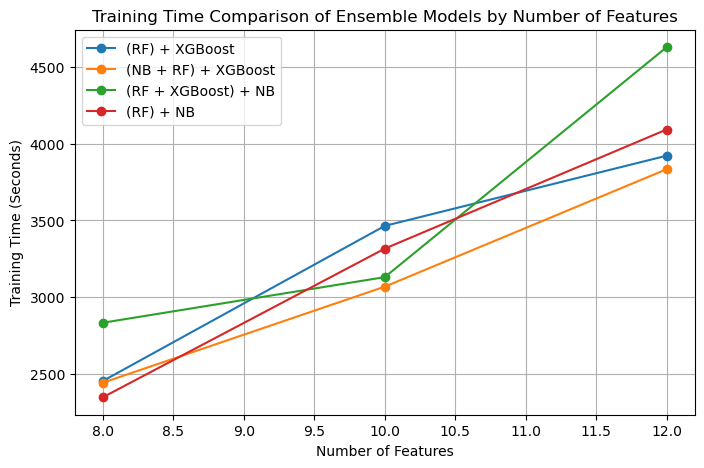

In [84]:
import matplotlib.pyplot as plt

# Data
ensemble_models = ['(RF) + XGBoost', '(NB + RF) + XGBoost', '(RF + XGBoost) + NB', '(RF) + NB']
num_features = [12, 10, 8]

# Training times in seconds
trt_rf_xgboost = [3922.806, 3464.508, 2451.559]
trt_nb_rf_xgboost = [3834.487, 3067.408, 2440.061]
trt_rf_xgboost_nb = [4631.756, 3129.649, 2831.768]
trt_rf_nb = [4094.055, 3315.963, 2345.041]

# Plotting
plt.figure(figsize=(8, 5))

plt.plot(num_features, trt_rf_xgboost, marker='o', label='(RF) + XGBoost')
plt.plot(num_features, trt_nb_rf_xgboost, marker='o', label='(NB + RF) + XGBoost')
plt.plot(num_features, trt_rf_xgboost_nb, marker='o', label='(RF + XGBoost) + NB')
plt.plot(num_features, trt_rf_nb, marker='o', label='(RF) + NB')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Training Time (Seconds)')
plt.title('Training Time Comparison of Ensemble Models by Number of Features')
plt.legend()
plt.grid(True)

plt.show()


## Testing Time Comparison Curve for the Ensembles at 12, 10. 8 features

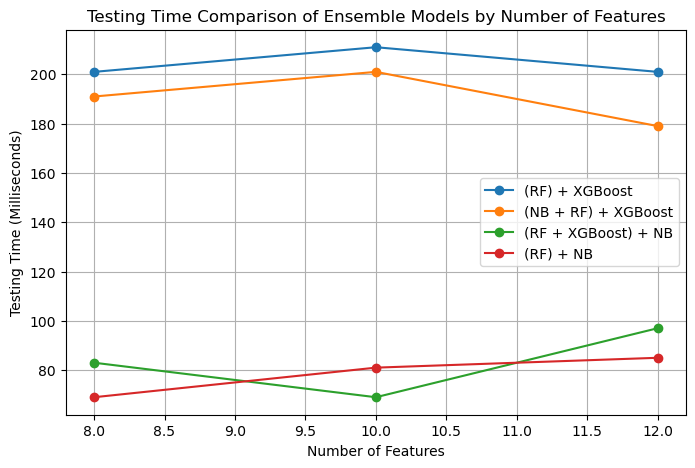

In [86]:
import matplotlib.pyplot as plt

# Data
ensemble_models = ['(RF) + XGBoost', '(NB + RF) + XGBoost', '(RF + XGBoost) + NB', '(RF) + NB']
num_features = [12, 10, 8]

# Testing times in seconds
tst_rf_xgboost = [0.201, 0.211, 0.201]
tst_nb_rf_xgboost = [0.179, 0.201, 0.191]
tst_rf_xgboost_nb = [0.097, 0.069, 0.083]
tst_rf_nb = [0.085, 0.081, 0.069]

# Convert testing times to milliseconds
tst_rf_xgboost_ms = [time * 1000 for time in tst_rf_xgboost]
tst_nb_rf_xgboost_ms = [time * 1000 for time in tst_nb_rf_xgboost]
tst_rf_xgboost_nb_ms = [time * 1000 for time in tst_rf_xgboost_nb]
tst_rf_nb_ms = [time * 1000 for time in tst_rf_nb]

# Plotting
plt.figure(figsize=(8, 5))

plt.plot(num_features, tst_rf_xgboost_ms, marker='o', label='(RF) + XGBoost')
plt.plot(num_features, tst_nb_rf_xgboost_ms, marker='o', label='(NB + RF) + XGBoost')
plt.plot(num_features, tst_rf_xgboost_nb_ms, marker='o', label='(RF + XGBoost) + NB')
plt.plot(num_features, tst_rf_nb_ms, marker='o', label='(RF) + NB')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Testing Time (Milliseconds)')
plt.title('Testing Time Comparison of Ensemble Models by Number of Features')
plt.legend()
plt.grid(True)

plt.show()


## ROC-AUC Curve for the Proposed Ensemble Model at 12, 10 and 8 Features

## At 12 for (NB + RF) + XGBoost and (RF) + XGBoost_ ROC Curve

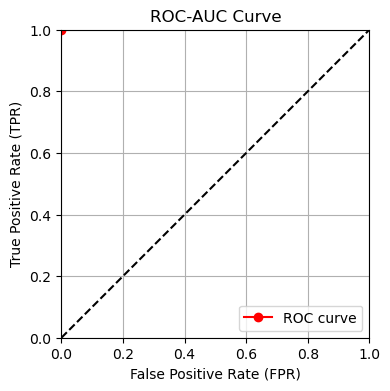

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix values
TP = 105536
TN = 105657
FP = 20
FN = 2

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Plot the ROC-AUC curve
plt.figure(figsize=(4, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, marker='o', color='r', label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## (NB + RF) + XGBoost ROC Curve Same at 10 and 8; Same for (RF) + XGBoost at 8 features

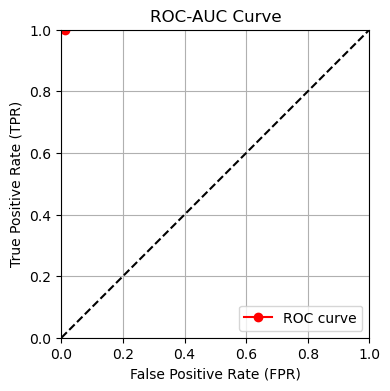

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix values
TP = 105526
TN = 104577	
FP = 1100
FN = 12

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Plot the ROC-AUC curve
plt.figure(figsize=(4, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, marker='o', color='r', label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## RF + XGBoost ROC Curve Same at 10

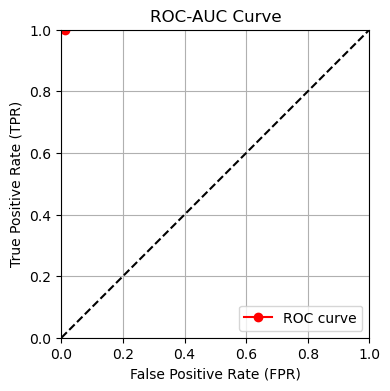

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix values
TP = 105527
TN = 104577
FP = 1100
FN = 11

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Plot the ROC-AUC curve
plt.figure(figsize=(4, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, marker='o', color='r', label='ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Confusion Matrix at 10 and 8 for  (NB + RF) + XGBoost and for (RF) + XGBoost at 8 

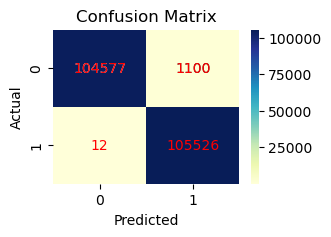

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For 70/30 Split
# Define the confusion matrix values
TP = 105526    			

TN = 104577
FP = 1100
FN = 12

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Confusion Matrix for (RF) + XGBoost at 10

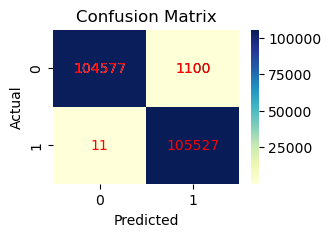

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For 70/30 Split
# Define the confusion matrix values
TP = 105527    				
TN = 104577
FP = 1100
FN = 11

# Create confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['0', '1']

# Plot confusion matrix heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

# Add count values for FP and FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Performance Comparison Barplot with Published Models in Literature and Recommendation at 12 Features

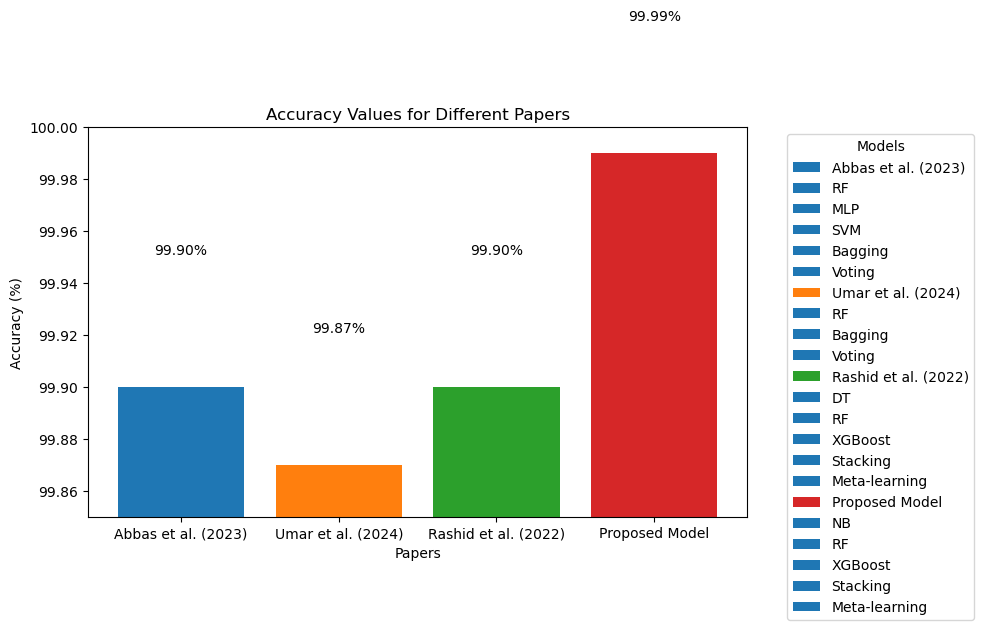

In [99]:
import matplotlib.pyplot as plt

# Data
papers = ['Abbas et al. (2023)', 'Umar et al. (2024)', 'Rashid et al. (2022)', 'Proposed Model']
accuracy_values = [99.90, 99.87, 99.90, 99.99]

# Define the models used in each paper
models = {
    'Abbas et al. (2023)': ['RF', 'MLP', 'SVM', 'Bagging', 'Voting'],
    'Umar et al. (2024)': ['RF', 'Bagging', 'Voting'],
    'Rashid et al. (2022)': ['DT', 'RF', 'XGBoost', 'Stacking', 'Meta-learning'],
    'Proposed Model': ['NB', 'RF', 'XGBoost', 'Stacking', 'Meta-learning']
}

# Plotting
plt.figure(figsize=(10, 6))

for i, paper in enumerate(papers):
    plt.bar(paper, accuracy_values[i], label=paper)
    # Add legend for models
    for j, model in enumerate(models[paper]):
        plt.bar([], [], color='white', label=model)  # Dummy bar for legend
        
    # Add accuracy values on bars
    plt.text(paper, accuracy_values[i] + 0.05, f'{accuracy_values[i]:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Papers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Values for Different Papers')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(99.85, 100)  # Adjust y-axis limits to better visualize differences

# Show plot
plt.tight_layout()
plt.show()


## At 8 Features

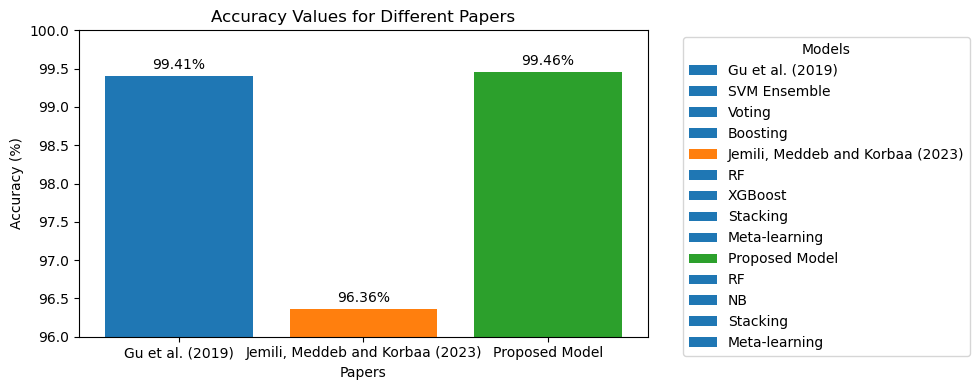

In [103]:
import matplotlib.pyplot as plt

# Data
papers = ['Gu et al. (2019)', 'Jemili, Meddeb and Korbaa (2023)', 'Proposed Model']
accuracy_values = [99.41, 96.36, 99.46]

# Define the models used in each paper
models = {
    'Gu et al. (2019)': ['SVM Ensemble', 'Voting', 'Boosting'],
    'Jemili, Meddeb and Korbaa (2023)': ['RF', 'XGBoost', 'Stacking', 'Meta-learning'],
    'Proposed Model': ['RF', 'NB', 'Stacking', 'Meta-learning']
}

# Plotting
plt.figure(figsize=(10, 4))

for i, paper in enumerate(papers):
    plt.bar(paper, accuracy_values[i], label=paper)
    # Add legend for models
    for j, model in enumerate(models[paper]):
        plt.bar([], [], color='white', label=model)  # Dummy bar for legend
        
    # Add accuracy values on bars
    plt.text(paper, accuracy_values[i] + 0.05, f'{accuracy_values[i]:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Papers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Values for Different Papers')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(96, 100)  # Adjust y-axis limits to better visualize differences

# Show plot
plt.tight_layout()
plt.show()


## Balanced and Unbalanced Dataset Coditions _All Best Performing Ensemble Models 

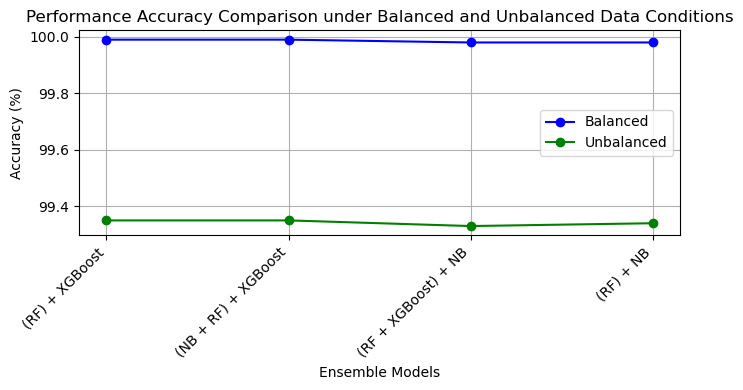

In [105]:
import matplotlib.pyplot as plt

# Data
ensemble_models = ['(RF) + XGBoost', '(NB + RF) + XGBoost', '(RF + XGBoost) + NB', '(RF) + NB']
accuracy_balanced = [0.9999, 0.9999, 0.9998, 0.9998]
accuracy_unbalanced = [0.9935, 0.9935, 0.9933, 0.9934]

# Convert accuracy to percentage
accuracy_balanced_percent = [acc * 100 for acc in accuracy_balanced]
accuracy_unbalanced_percent = [acc * 100 for acc in accuracy_unbalanced]

# Plotting
plt.figure(figsize=(7, 4))

plt.plot(ensemble_models, accuracy_balanced_percent, marker='o', label='Balanced', color='blue')
plt.plot(ensemble_models, accuracy_unbalanced_percent, marker='o', label='Unbalanced', color='green')

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Accuracy (%)')
plt.title('Performance Accuracy Comparison under Balanced and Unbalanced Data Conditions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()
